In [493]:
import os
os.chdir('D:/IST/5 ano/2 semestre/Tese/raspberry-grasping/python/raspberry-robot-plots-folder')

In [494]:
import numpy as np
import matplotlib.pyplot as plt
from read_file import *

In [495]:
def get_reference(filename):
    harvest_ref = []
    rows = []
    # reading csv file
    with open(filename, 'r') as csvfile:
        # creating a csv reader object
        csvreader = csv.reader(csvfile)

        # extracting each data row one by one
        for row in csvreader:
            rows.append(row)

    harvest_ref = [float(x) for x in rows[0]]
    return np.array(harvest_ref)

In [496]:
def read_Fd_error(find_vector, rows):
    prev_pull = 0 
    vector = []
    for i, row in enumerate(rows):
        if len(row) > 0:
            compare_str = row[0][0:len(find_vector)]
            if compare_str == find_vector:
                pull = float(row[0][len(find_vector)::])
                vector.append(pull)
                
    return vector

## Plot Colours

In [497]:
low_colour = '#f0d002'
low_error_colour = '#8a7701'
medium_colour = '#eb8602'
medium_error_colour = '#7a4601'
high_colour = '#e30291'
high_error_colour = '#94015f'
robot_field = '#74C4C0'
robot_lab = 'C0'

alpha = 10; 15 iterations 

In [498]:
find_error = 'Pulling force relative error = '
find_dif = 'Pulling difference = '
find_fd = 'Fd = '
find_compression = 'Compression Loadcell = ['
find_pressure = 'Raspberry Reading = ['
find_pull_grip = 'Pulling Gripper = ['
find_pull = 'Pulling Force = ['
find_time = 'Time vector = ['
fail = 'PICKING FAILED'
iterations = 15

In [499]:
directory = 'D:/IST/5 ano/2 semestre/Tese/raspberry-grasping/python/raspberry-robot-plots-folder/raspberry-robot-plots-data/20220717_H_M_L_Force/data'

In [500]:
force_lvl = ['H', 'L', 'M']
plant = ['S', 'TPU']

In [501]:
folder = os.listdir(directory)[0]
directory+'/'+folder
folder2 = os.listdir(directory+'/'+folder)[0]
os.listdir(directory+'/'+folder+'/'+folder2)[1][-4::]

'.txt'

In [502]:
for i,folder in enumerate(os.listdir(directory)):
    for j,folder2 in enumerate(os.listdir(directory+'/'+folder)):
        for folder3 in os.listdir(directory+'/'+folder+'/'+folder2):
            if folder3[-4::] == '.txt':
                filename = directory+'/'+folder+'/'+folder2+'/'+folder3
                rows = read_csv_file(filename)
                fail_index = find_fails(fail, find_fd, rows)
                error = read_Fd_error(find_error, rows)
                Fd = read_Fd_error(find_fd, rows)
                time_vec = read_pressure_pulling_force(find_time, fail_index, rows)
                pulling_gripper = read_pressure_pulling_force(find_pull_grip, fail_index, rows)
                raspberry_reading = read_pressure_pulling_force(find_pressure, fail_index, rows)
                pulling_force = read_pressure_pulling_force(find_pull, fail_index, rows)
                compression_loadcell = read_pressure_pulling_force(find_compression , fail_index, rows)

                fail_matrix = np.zeros((iterations,5))
                for k in fail_index:
                    iter = int(rows[k-1][0][12:14])
                    trial = int(rows[k-1][0][22::])
                    fail_matrix[iter-1, trial] = 1

                suffix = '_'+force_lvl[i]+'_'+plant[j]
                locals()['fails'+suffix] = fail_index
                locals()['fail_matrix'+suffix] = fail_matrix
                locals()['error'+suffix] = error
                locals()['time'+suffix]  = time_vec
                locals()['pulling_gripper'+suffix] = pulling_gripper
                locals()['raspberry'+suffix] = raspberry_reading 
                locals()['pulling_force'+suffix] = pulling_force
                locals()['comp'+suffix] = compression_loadcell
                locals()['Fd'+suffix] = Fd

            else:
                for file in os.listdir(directory+'/'+folder+'/'+folder2+'/'+folder3):
                    if file[-4::] == '.csv':
                        ref_p = directory+'/'+folder+'/'+folder2+'/'+folder3+'/'+file
                        ref_pressure = get_reference(ref_p)
                        ref_max = max(ref_pressure)
                        suffix = '_'+force_lvl[i]+'_'+plant[j]
                        locals()['ref_pressure'+suffix] = ref_pressure
                        locals()['ref_max'+suffix] = ref_max


In [503]:
Fds = [[Fd_H_S, Fd_H_TPU], [Fd_M_S, Fd_M_TPU], [Fd_L_S, Fd_L_TPU]]#, [Fd_VH_S, Fd_VH_TPU]]
forces = [[[],[]],[[],[]],[[],[]]]#,[[],[]]]
for i in range(3):
    for j in range(2):
        for k in range(0,iterations*5,5):
            forces[i][j].append(Fds[i][j][k])

C:\Users\Catarina.LAPTOP-GAR6C5UR\AppData\Local\Temp\ipykernel_6384\3700039497.py:66: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  axs[i][j].grid(b=True, color='#666666', linestyle='-', alpha = 0.3)


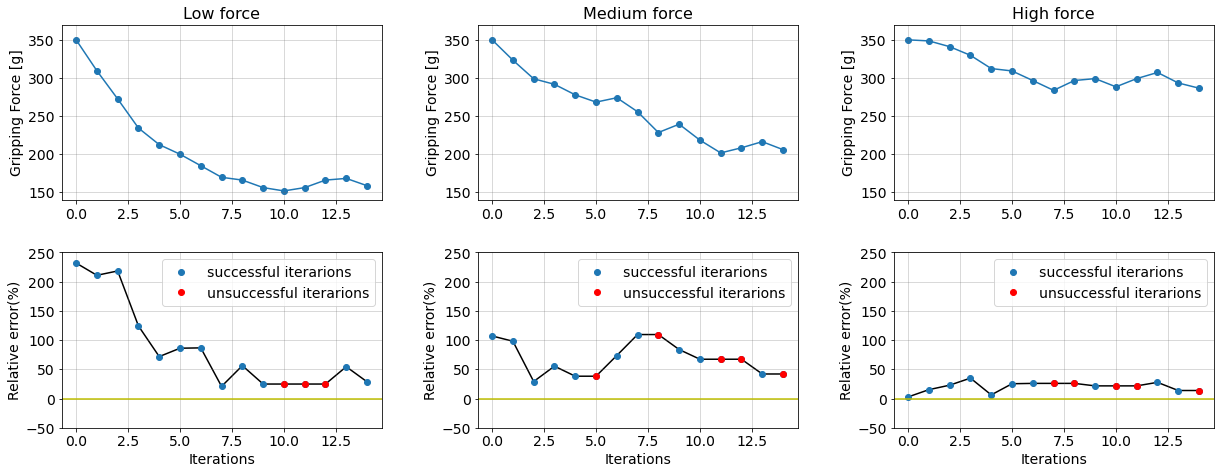

In [504]:
Fds = [[Fd_L_TPU], [Fd_M_TPU], [Fd_H_TPU]]#, [Fd_VH_S, Fd_VH_TPU]]
forces = [[[],[]],[[],[]],[[],[]]]#,[[],[]]]
for i in range(3):
    for j in range(1):
        for k in range(0,iterations*5,5):
            forces[i][j].append(Fds[i][j][k])

titles = [['Low force'],
          ['Medium force'],
          ['High force']]

errors = [[error_L_TPU],
          [error_M_TPU],
          [error_H_TPU]]#,
          #[error_VH_S, error_VH_TPU]]

fail_matrixes = [[fail_matrix_L_TPU],
                 [fail_matrix_M_TPU],
                 [fail_matrix_H_TPU]]

fontsize_leg = 14
font_title = 16


fig, axs = plt.subplots(2, 3)
# plt.rcParams["figure.autolayout"] = True
fig.set_size_inches(20,7)
for i in range(2):
    for j in range(3):
        if i == 1:
            plot_dif0 = []
            x_dif = []
            star = []
            star_plot = []
            for k in range(len(errors[j][0])):
                if not any(fail_matrixes[j][0][k]):
                    plot_dif0.append(-errors[j][0][k]*100)
                    x_dif.append(k)
                    previous = -errors[j][0][k]*100
                else:
                    # plot_dif0.append(-errors[i][j][k]*100)
                    # x_dif.append(k)
                    # star.append(k)
                    # star_plot.append(-errors[i][j][k]*100)
                    plot_dif0.append(previous)
                    x_dif.append(k)
                    star.append(k)
                    star_plot.append(previous)
            # plt.axhline(y = 0, color = 'y')
            axs[i][j].plot(x_dif, plot_dif0,'k', zorder=1)
            axs[i][j].scatter(x_dif, plot_dif0,label='successful iterarions', zorder=2)
            axs[i][j].plot(star, star_plot,'ro', label='unsuccessful iterarions', zorder=3)
            axs[i][j].axhline(y = 0, color = 'y')#, label = '0 relative error')
            axs[i][j].legend(loc="upper right", fontsize=fontsize_leg)
            axs[i][j].set_xlabel("Iterations",fontsize=fontsize_leg)
            axs[i][j].set_ylabel("Relative error(%)", fontsize=fontsize_leg)
            axs[i][j].set_ylim([-50, 250])
        if i == 0:
            axs[i][j].scatter(range(iterations),forces[j][i])
            axs[i][j].plot(range(iterations), forces[j][i], label = 'Gripping force')
            # axs[i][j].legend(loc="upper center")
            axs[i][j].set_ylabel("Gripping Force [g]", fontsize=fontsize_leg)
            axs[i][j].set_ylim([140,370])
            axs[i][j].set_title(titles[j][0],fontsize=font_title)
        axs[i][j].tick_params(axis='both', labelsize=fontsize_leg)
        axs[i][j].grid(b=True, color='#666666', linestyle='-', alpha = 0.3)

plt.subplots_adjust(left=0.1,
                            bottom=0.1, 
                            right=0.9, 
                            top=0.9, 
                            wspace=0.3, 
                            hspace=0.3)


C:\Users\Catarina.LAPTOP-GAR6C5UR\AppData\Local\Temp\ipykernel_6384\662909922.py:70: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  axs[i][j].grid(b=True, color='#666666', linestyle='-', alpha = 0.3)


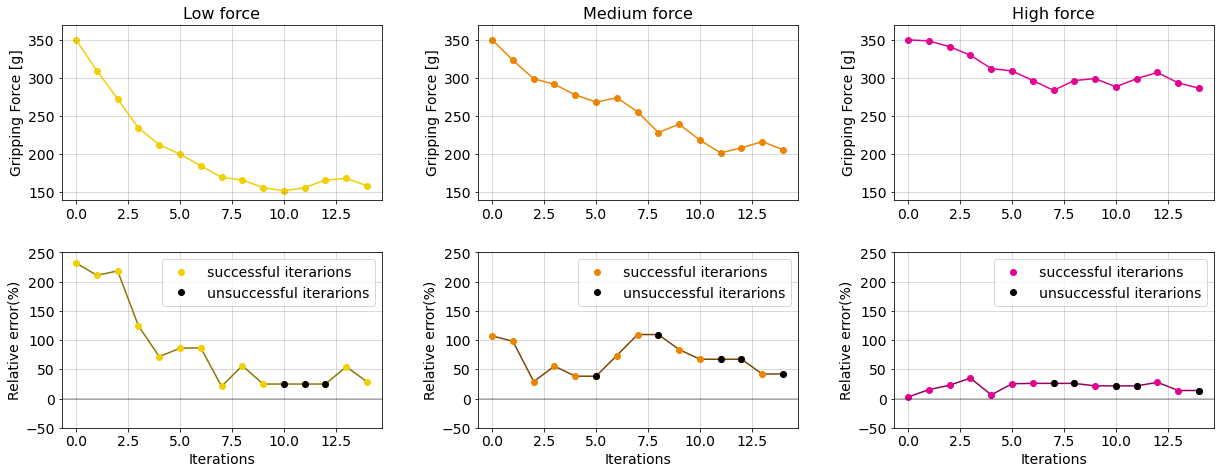

In [807]:
Fds = [[Fd_L_TPU], [Fd_M_TPU], [Fd_H_TPU]]#, [Fd_VH_S, Fd_VH_TPU]]
forces = [[[],[]],[[],[]],[[],[]]]#,[[],[]]]
for i in range(3):
    for j in range(1):
        for k in range(0,iterations*5,5):
            forces[i][j].append(Fds[i][j][k])

titles = [['Low force'],
          ['Medium force'],
          ['High force']]

errors = [[error_L_TPU],
          [error_M_TPU],
          [error_H_TPU]]#,
          #[error_VH_S, error_VH_TPU]]

fail_matrixes = [[fail_matrix_L_TPU],
                 [fail_matrix_M_TPU],
                 [fail_matrix_H_TPU]]

colours = [[low_colour, low_error_colour],
           [medium_colour, medium_error_colour],
           [high_colour, high_error_colour]]

fontsize_leg = 14
font_title = 16


fig, axs = plt.subplots(2, 3)
# plt.rcParams["figure.autolayout"] = True
fig.set_size_inches(20,7)
for i in range(2):
    for j in range(3):
        if i == 1:
            plot_dif0 = []
            x_dif = []
            star = []
            star_plot = []
            for k in range(len(errors[j][0])):
                if not any(fail_matrixes[j][0][k]):
                    plot_dif0.append(-errors[j][0][k]*100)
                    x_dif.append(k)
                    previous = -errors[j][0][k]*100
                else:
                    # plot_dif0.append(-errors[i][j][k]*100)
                    # x_dif.append(k)
                    # star.append(k)
                    # star_plot.append(-errors[i][j][k]*100)
                    plot_dif0.append(previous)
                    x_dif.append(k)
                    star.append(k)
                    star_plot.append(previous)
            # plt.axhline(y = 0, color = 'y')
            axs[i][j].plot(x_dif, plot_dif0, color=colours[j][1], zorder=1)
            axs[i][j].scatter(x_dif, plot_dif0, color=colours[j][0], label='successful iterarions', zorder=2)
            axs[i][j].plot(star, star_plot, 'ko', label='unsuccessful iterarions', zorder=3)
            axs[i][j].axhline(y = 0, color = 'k', alpha=0.3)#, label = '0 relative error')
            axs[i][j].legend(loc="upper right", fontsize=fontsize_leg)
            axs[i][j].set_xlabel("Iterations",fontsize=fontsize_leg)
            axs[i][j].set_ylabel("Relative error(%)", fontsize=fontsize_leg)
            axs[i][j].set_ylim([-50, 250])
        if i == 0:
            axs[i][j].scatter(range(iterations),forces[j][i], color=colours[j][0])
            axs[i][j].plot(range(iterations), forces[j][i], color=colours[j][0],label = 'Gripping force')
            # axs[i][j].legend(loc="upper center")
            axs[i][j].set_ylabel("Gripping Force [g]", fontsize=fontsize_leg)
            axs[i][j].set_ylim([140,370])
            axs[i][j].set_title(titles[j][0],fontsize=font_title)
        axs[i][j].tick_params(axis='both', labelsize=fontsize_leg)
        axs[i][j].grid(b=True, color='#666666', linestyle='-', alpha = 0.3)

plt.subplots_adjust(left=0.1,
                            bottom=0.1, 
                            right=0.9, 
                            top=0.9, 
                            wspace=0.3, 
                            hspace=0.3)
plt.savefig("training_error.pdf", format="pdf")

### Low raspberry

In [773]:
size = (3,2.5)

In [774]:
time = [ 0.61726 ,  0.648234,  0.679934,  0.711178,  0.742096,  0.788331,
        0.819884,  0.850773,  0.882725,  0.912837,  0.94368 ,  0.974048,
        1.005372,  1.037129,  1.068284,  1.099393,  1.13097 ,  1.162009,
        1.192436,  1.223576,  1.270297,  1.302162,  1.347637,  1.378496,
        1.409595,  1.441026,  1.471573,  1.502156,  1.534193,  1.565409,
        1.59673 ,  1.627199,  1.658054,  1.689128,  1.721004,  1.750924,
        1.782829,  1.813206,  1.845175,  1.876108,  1.906534,  1.938699,
        1.970056,  2.001325,  2.033831,  2.063937,  2.094404,  2.124553,
        2.155405,  2.18641 ,  2.217467,  2.248903,  2.280978,  2.326939,
        2.358891,  2.389776,  2.41987 ,  2.450944,  2.482142,  2.512751,
        2.544392,  2.575692,  2.606773,  2.63783 ,  2.669424,  2.70014 ,
        2.731184,  2.762515,  2.808889,  2.839765,  2.870482,  2.901341,
        2.93311 ,  2.964509,  2.996081,  3.025953,  3.057163,  3.088493,
        3.119819,  3.151316,  3.182469,  3.212519,  3.243195,  3.274527,
        3.305856,  3.336445,  3.367041,  3.398309,  3.430289,  3.461252,
        3.508345,  3.539161,  3.569499,  3.600762,  3.631274,  3.663095,
        3.693535,  3.724318,  3.756225,  3.787298,  3.818091,  3.84772 ,
        3.895251,  3.926491,  3.958489,  3.989888,  4.020245,  4.052215,
        4.099136,  4.129734,  4.160281,  4.190703,  4.221526,  4.252913,
        4.284737,  4.315562,  4.362803,  4.393821,  4.425022,  4.456667,
        4.488475,  4.518998,  4.549651,  4.580569,  4.611337,  4.642094,
        4.672802,  4.70363 ,  4.733741,  4.764649,  4.795909,  4.827076,
        4.85853 ,  4.889568,  4.920553,  4.951451,  4.98304 ,  5.014369,
        5.045039,  5.075991,  5.107494,  5.138865,  5.170458,  5.202138,
        5.233148,  5.264423,  5.295555,  5.327472,  5.358765,  5.389297,
        5.421281,  5.451822,  5.483492,  5.514807,  5.545766,  5.577801,
        5.608243,  5.639222,  5.669588,  5.700584,  5.731174,  5.762724,
        5.793641,  5.824319,  5.856416,  5.887165,  5.918846,  5.950014,
        5.980092,  6.011306,  6.042395,  6.073296,  6.104526,  6.135597,
        6.166533,  6.19719 ,  6.228045,  6.259429,  6.290372,  6.320924,
        6.351707,  6.382762,  6.414181,  6.444846,  6.47597 ,  6.507552,
        6.538564,  6.569899,  6.600916,  6.632088,  6.663296,  6.694032,
        6.725651,  6.758091,  6.789811,  6.820761,  6.851677,  6.883588,
        6.913479,  6.945394,  6.975314,  7.005265,  7.03715 ,  7.06707 ,
        7.099023,  7.130932,  7.161843,  7.192736,  7.222412,  7.253916,
        7.285568,  7.315616,  7.346327,  7.378041,  7.408592,  7.439259,
        7.470731,  7.501076,  7.532528,  7.562937,  7.594794,  7.624918,
        7.656197,  7.687701,  7.718786,  7.750228,  7.781813,  7.813861,
        7.844887,  7.876413,  7.907225,  7.937953,  7.969607,  8.000376,
        8.031195,  8.06193 ,  8.093288,  8.123983,  8.1555  ,  8.187414,
        8.218333,  8.249249,  8.281157,  8.312073,  8.342992,  8.37492 ,
        8.404827,  8.436734,  8.466668,  8.498582,  8.530492,  8.560411,
        8.592326,  8.624105,  8.654648,  8.686025,  8.715934,  8.746488,
        8.778759,  8.810513,  8.840464,  8.872182,  8.903859,  8.934563,
        8.9661  ,  8.996581,  9.027415,  9.057557,  9.088571,  9.119294,
        9.150487,  9.181261,  9.213175,  9.244128,  9.274536,  9.305985,
        9.337944,  9.368814,  9.400387,  9.430993,  9.461705,  9.493245,
        9.524908,  9.556804,  9.587291,  9.618721,  9.649845,  9.680823,
        9.712793,  9.743137,  9.774431,  9.805788,  9.837142,  9.868421,
        9.899834,  9.930775,  9.961422,  9.993313, 10.02467 , 10.05529 ]

In [775]:
human_refL = np.array([ 0.15798925,  0.16060125,  0.16237   ,  0.17114625,  0.1882425 ,
        0.1943255 ,  0.183999  ,  0.16675125,  0.14870425,  0.1494895 ,
        0.15071   ,  0.12236725,  0.0939125 ,  0.1089375 ,  0.15427775,
        0.16449475,  0.14488725,  0.14713975,  0.14622225,  0.143471  ,
        0.158748  ,  0.1689965 ,  0.159535  ,  0.12730675,  0.08728425,
        0.09135675,  0.1125945 ,  0.12731325,  0.1509335 ,  0.1790705 ,
        0.18613075,  0.17628975,  0.1909695 ,  0.21828725,  0.2125945 ,
        0.18962325,  0.17595025,  0.172378  ,  0.18490625,  0.194534  ,
        0.1896085 ,  0.17256825,  0.135481  ,  0.11769325,  0.13658775,
        0.14354675,  0.1368305 ,  0.1477975 ,  0.157109  ,  0.1558745 ,
        0.15778875,  0.16662675,  0.17371025,  0.162377  ,  0.15826275,
        0.1824525 ,  0.21572275,  0.226822  ,  0.22491175,  0.222219  ,
        0.19556425,  0.1605015 ,  0.145369  ,  0.162284  ,  0.20171425,
        0.21122075,  0.18335225,  0.1632915 ,  0.1705655 ,  0.1904015 ,
        0.200918  ,  0.17862775,  0.13583125,  0.13214925,  0.17190325,
        0.19049075,  0.16844775,  0.1637275 ,  0.18558725,  0.19029025,
        0.1901845 ,  0.1995965 ,  0.210439  ,  0.20241675,  0.18264625,
        0.17395   ,  0.16495175,  0.1691315 ,  0.16057125,  0.1559195 ,
        0.187575  ,  0.20641325,  0.1910725 ,  0.168323  ,  0.15051425,
        0.16005475,  0.18489875,  0.19073375,  0.19063375,  0.19966975,
        0.1942115 ,  0.171108  ,  0.13985825,  0.10411   ,  0.10693025,
        0.13513075,  0.14692075,  0.15396875,  0.175943  ,  0.202714  ,
        0.2047325 ,  0.1867095 ,  0.18491625,  0.18053175,  0.164762  ,
        0.1761685 ,  0.194768  ,  0.1855805 ,  0.1755115 ,  0.18703775,
        0.2021605 ,  0.191963  ,  0.17785   ,  0.17268575,  0.1488215 ,
        0.12923475,  0.144112  ,  0.167197  ,  0.17312975,  0.1757185 ,
        0.18074275,  0.1712565 ,  0.15534475,  0.16432975,  0.20646925,
        0.2745825 ,  0.3278185 ,  0.35157275,  0.359778  ,  0.34185125,
        0.324524  ,  0.32965675,  0.35723425,  0.39173375,  0.40394625,
        0.393544  ,  0.38524975,  0.3936685 ,  0.40575275,  0.403642  ,
        0.39735825,  0.40655325,  0.42045   ,  0.42469675,  0.41531525,
        0.4172115 ,  0.4398585 ,  0.458023  ,  0.4863835 ,  0.51697675,
        0.549181  ,  0.6007455 ,  0.64481375,  0.70505475,  0.824961  ,
        0.9716615 ,  1.094301  ,  1.1788155 ,  1.23895875,  1.30668775,
        1.40254825,  1.51504875,  1.640764  ,  1.74820925,  1.7500755 ,
        1.51105925,  0.86447325, -0.061725  , -0.7069755 , -0.92255   ,
       -1.0280255 , -1.15445475, -1.277184  , -1.37429975, -1.41962325,
       -1.4180735 , -1.40712825, -1.4112665 , -1.42606725, -1.41954425,
       -1.3926725 , -1.3741785 , -1.36823225, -1.3606195 , -1.36251625,
       -1.3777495 , -1.378528  , -1.3677835 , -1.36654125, -1.37237125,
       -1.3664295 , -1.350535  , -1.3508605 , -1.370586  , -1.39175125,
       -1.400943  , -1.38727325, -1.36812225, -1.36206975, -1.3698035 ,
       -1.37651025, -1.36644025, -1.3626235 , -1.37316075, -1.3746035 ,
       -1.3716035 , -1.37011225, -1.37026025, -1.36866525, -1.36454025,
       -1.3627375 , -1.3765315 , -1.39006975, -1.3898655 , -1.39008025,
       -1.39277275, -1.3887475 , -1.384256  , -1.3853875 , -1.39343675,
       -1.39647525, -1.38346   , -1.3731715 , -1.3700115 , -1.3676685 ,
       -1.35769475, -1.34794275, -1.3485075 , -1.35970575, -1.3761815 ,
       -1.372586  , -1.359277  , -1.368119  , -1.389962  , -1.397022  ,
       -1.38839825, -1.375393  , -1.360616  , -1.35522775, -1.36161575,
       -1.36103775, -1.352767  , -1.346472  , -1.3455895 , -1.34625075,
       -1.35007075, -1.34905025, -1.3430185 , -1.349175  , -1.367769  ,
       -1.3795355 , -1.37953175, -1.367655  , -1.347718  , -1.335727  ,
       -1.3342695 , -1.33885825, -1.34412225, -1.346143  , -1.3502855 ,
       -1.3516355 , -1.35364975, -1.36149475, -1.360927  , -1.35152475,
       -1.3416585 , -1.3402045 , -1.342776  , -1.338741  , -1.33403775,
       -1.332799  , -1.3326915 , -1.332688  , -1.332688  , -1.332688  ,
       -1.332688  , -1.332688  , -1.332688  , -1.3326915 , -1.332799  ,
       -1.33404125, -1.33884825, -1.3440115 , -1.3447865 , -1.34401175,
       -1.3388515 , -1.334152  , -1.33415225, -1.33885175, -1.34401475])

In [776]:
pre_opt_rasp_robotL1 = [-0.0027787522102471485, -0.0015830157798291111, -0.001583015775736385, -0.001583015775736385, -0.001583015775736385, -0.001583015775736385, -0.001583015775736385, -0.001583015775736385, -0.001583015775736385, -0.001583015775736385, -0.001583015775736385, -0.001583015775736385, -0.001583015775736385, -0.001583015775736385, -0.001583015775736385, -0.001583015775736385, -0.001583015775736385, -0.001583015775736385, -0.001583015775736385, -0.001583015775736385, -0.001583015775736385, -0.001583015775736385, -0.001583015775736385, -0.001583015775736385, -0.001583015775736385, -0.001583015775736385, -0.001583015769369922, -0.0015819695910295195, 0.0016418189021578655, 0.22286509216280592, 0.9873836722049418, 2.1352708227778976, 3.8219353857525675, 5.220388297852196, 5.9980423203764985, 6.387098920797143, 6.9461440460172525, 6.9973951766480695, 6.943213921987649, 6.805142702734656, 6.679721335274962, 6.908511934338094, 4.870438060985407, 0.41057792596041054, 0.15426858759258266, -0.19259314458736299, -1.7204279168533958]
timeL1 = [1.4184534549713135, 1.6108007431030273, 1.7875738143920898, 1.9629974365234375, 2.1551451683044434, 2.3307011127471924, 2.5073304176330566, 2.6831471920013428, 2.8590810298919678, 3.0345253944396973, 3.1944196224212646, 3.3705532550811768, 3.5467302799224854, 3.722571849822998, 3.898799180984497, 4.05870246887207, 4.234414577484131, 4.410848379135132, 4.5868189334869385, 4.7623937129974365, 4.938860654830933, 5.114953517913818, 5.2904205322265625, 5.467044353485107, 5.642561435699463, 5.81908917427063, 5.994780778884888, 6.170596599578857, 6.346346616744995, 6.5066187381744385, 7.194209814071655, 7.370376110076904, 7.530298233032227, 7.706336259841919, 7.850250005722046, 8.539214849472046, 8.693027019500732, 8.858792304992676, 9.03494644165039, 9.210610389709473, 9.386098146438599, 9.56239104270935, 9.738098621368408, 9.914755821228027, 10.090181112289429, 10.26621699333191, 10.458790302276611]

pre_opt_rasp_robotL2 = [-0.12248423166943212, 0.5958444705187276, 0.2927005516015697, -0.39095000287386483, -1.0979129015862554, -1.4056238432664259, -1.4151325021831553, -1.4151472287243223, -1.4151472293400502, -1.4151472293400502, -1.4151472293400502, -1.4151472293400502, -1.4151472293400502, -1.4151472293391407, -1.4151470806681345, -1.414704044498876, -1.3909501568881524, -1.3909501568881524, -1.4147040444989898, -1.4151470806681345, -1.4151472293391407, -1.4151472293400502, -1.4151472293400502, -1.4151472293400502, -1.4151472293400502, -1.4151472287261413, -1.4151328001300953, -1.4065228519940547, -1.14947518834299, -0.3477068928357312, 0.8347189550185021, 2.5589792825917357, 3.8624594798263843, 4.53611087602053, 4.879847238852562, 5.480987509735883, 5.532668741956968, 5.4561299176112925, 5.4162624610937655, 5.492923220574539, 5.574026956118587, 5.5834951421398955, 5.508128646114869, 5.208526772082109, 2.8631052837878315, -1.0632222846571722, -1.4203671854000959, -1.8468254106148834]
timeL2 = [5.439523458480835, 5.615488290786743, 5.791376113891602, 5.967359304428101, 6.143460512161255, 6.319057464599609, 6.495037078857422, 6.655421257019043, 6.831157445907593, 7.006869554519653, 7.183432340621948, 7.359026193618774, 7.534891605377197, 7.711388826370239, 7.886869430541992, 8.063136577606201, 8.238894701004028, 8.415382862091064, 8.590792894363403, 8.766742467880249, 8.943148136138916, 9.118966579437256, 9.295494794845581, 9.471025943756104, 9.647129774093628, 9.823081731796265, 9.983204364776611, 10.159166097640991, 10.335123777389526, 10.495738506317139, 10.671261072158813, 10.846792697906494, 11.023064136505127, 11.183370590209961, 11.855592489242554, 12.54250979423523, 12.719335079193115, 12.89476203918457, 13.062451839447021, 13.231094360351562, 13.391231775283813, 13.550847053527832, 13.726712942123413, 13.90250015258789, 14.078614711761475, 14.255171298980713, 14.430698871612549, 14.607330322265625]

pre_opt_rasp_robotL3 = [-0.06000513614264946, 0.08364730385756047, 0.042953987210239575, 0.021411282580402258, -0.07545980304769273, -0.07410124258990436, 0.023985055533557897, -0.10459583939416461, -0.023438561142938852, 0.046440747217161515, 0.041055033587554135, -0.06333293785314709, -0.11045120717119516, -0.004751212592054799, -0.09431172044344294, -0.026180912629342856, -0.03199200766653121, -0.09199935838614692, 0.020497703268233636, -0.0009749710180813054, -0.1372629419677196, 0.03609523303532569, -0.18027133733937717, 0.013656068541422428, -0.045488389443107735, -0.1740187267332658, -0.0005423519967280299, 0.25096835109320637, 0.4196399086290512, 0.7085966100319183, 1.6608371179544292, 2.7534444590764906, 3.6803300602913396, 4.369029924580786, 4.427561298314799, 4.427710002544927, 4.433095722258713, 4.4675908536474935, 4.433095721647419, 4.427696030919378, 4.420524785936664, 4.290918933180251, 4.283133515263103, 3.836146530113183, 3.079924367114245, 0.7068664540648797]
timeL3 = [1.4190189838409424, 1.5786757469177246, 1.755079984664917, 1.9145734310150146, 2.0907490253448486, 2.2664005756378174, 2.4434421062469482, 2.618605375289917, 2.7786924839019775, 2.955286741256714, 3.1153433322906494, 3.2912933826446533, 3.4512746334075928, 3.62693190574646, 3.786506175994873, 3.963033676147461, 4.139292001724243, 4.314287900924683, 4.490334510803223, 4.666329860687256, 4.843164682388306, 5.018254280090332, 5.194782972335815, 5.370313405990601, 5.546628713607788, 5.723356008529663, 5.899129629135132, 6.074756860733032, 6.250225782394409, 6.427026748657227, 6.602557420730591, 7.290585517883301, 7.466105937957764, 7.642637491226196, 7.818166255950928, 7.994812250137329, 8.170308828353882, 8.346827268600464, 8.521921634674072, 8.676759004592896, 8.842427253723145, 9.002001285552979, 9.162415027618408, 9.33826494216919, 9.514406681060791, 9.690542936325073]

pre_opt_rasp_robotL4 = [-0.0011929380767696784, 4.2911581203952665e-06, 4.291162099434587e-06, 4.291162099434587e-06, 4.291162099434587e-06, 4.291162099434587e-06, 4.291162099434587e-06, 4.291162099434587e-06, 4.291162099434587e-06, 4.291162099434587e-06, 4.291162099434587e-06, 4.291162099434587e-06, 4.291162099434587e-06, 4.291162099434587e-06, 4.291162099434587e-06, 4.291162099434587e-06, 4.291162099434587e-06, 4.291162099434587e-06, 4.291162099434587e-06, 4.291162099434587e-06, 4.291162099434587e-06, 4.291162099434587e-06, 4.291162099434587e-06, 4.291162099434587e-06, 4.291162099434587e-06, 4.292386279303173e-06, 3.2550020819144265e-05, 0.015371148720532801, 0.3848902745803571, 1.257355262828014, 2.251860996340497, 3.29709929661783, 4.327027260699765, 4.952122427169343, 4.999895755452258, 5.000004313044997, 5.0000043173026825, 4.999990186055015, 4.992267357049855, 4.78596568630212, 4.214041450719492, 4.003154741663366, 3.6756867744513784, 1.7588945312552369, -1.4162631452720689, -1.8869823589595853]
timeL4 = [1.423954725265503, 1.5992789268493652, 1.7759852409362793, 1.9515290260314941, 2.127394914627075, 2.2874226570129395, 2.4635531902313232, 2.623124361038208, 2.7994956970214844, 2.974970579147339, 3.1509463787078857, 3.327103614807129, 3.518916606903076, 3.695016384124756, 3.8718745708465576, 4.046981573104858, 4.207410573959351, 4.383062124252319, 4.559270858764648, 4.735334873199463, 4.911567211151123, 5.08707332611084, 5.263395071029663, 5.438823938369751, 5.615695953369141, 5.791325330734253, 5.967060565948486, 6.126935243606567, 6.303151369094849, 6.9753639698028564, 7.151066780090332, 7.327721118927002, 7.503190994262695, 7.679370164871216, 7.8392415046691895, 8.01469087600708, 8.191219568252563, 8.360767364501953, 8.527321100234985, 8.702828645706177, 8.863240718841553, 9.03916072845459, 9.23146939277649, 9.407602310180664, 9.583546161651611, 9.759070634841919]

pre_opt_rasp_robotL5 = [-0.0011914506229686594, 4.285807449377899e-06, 4.2858115421040566e-06, 4.2858115421040566e-06, 4.2858115421040566e-06, 4.2858115421040566e-06, 4.2858115421040566e-06, 4.2858115421040566e-06, 4.2858115421040566e-06, 4.2858115421040566e-06, 4.2858115421040566e-06, 4.2858115421040566e-06, 4.2858115421040566e-06, 4.2858115421040566e-06, 4.2858115421040566e-06, 4.2858115421040566e-06, 4.2858115421040566e-06, 4.2858115421040566e-06, 4.2858115421040566e-06, 4.2858115421040566e-06, 4.2858115421040566e-06, 4.2858115421040566e-06, 4.2858115421040566e-06, 4.2858115421040566e-06, 4.2858115421040566e-06, 4.2858160895775654e-06, 5.035265417063783e-06, 0.0023570276933924106, 0.18415809215457557, 1.146322782719153, 2.664484282772719, 4.236439865649118, 5.481177566799488, 6.00305215637502, 6.378950544328177, 6.842057207215362, 6.957825613822365, 6.994147911734899, 6.970381238832033, 6.930057207763753, 6.924201692526253, 6.895478063459336, 6.878438117175165, 6.843416237086217, 6.745712757452679, 6.735028611263488, 6.972082022699851, 6.999937108984113, 7.000004320207495, 7.000001331525823, 6.990727193328212, 6.317552603140825, 2.9150036398066277, -0.706948959141414]
timeL5 = [1.391906499862671, 1.5674917697906494, 1.7602601051330566, 1.9355494976043701, 2.1119778156280518, 2.3043179512023926, 2.4956681728363037, 2.671912670135498, 2.8478314876556396, 3.0233030319213867, 3.200061082839966, 3.3604304790496826, 3.552035331726074, 3.7274997234344482, 3.904200792312622, 4.079216957092285, 4.239741325378418, 4.416276216506958, 4.592162370681763, 4.768213748931885, 4.943949937820435, 5.119496583938599, 5.2953948974609375, 5.455638647079468, 5.631826162338257, 5.8073530197143555, 5.983882427215576, 6.159549236297607, 6.335615158081055, 6.511941432952881, 6.687455415725708, 6.863724708557129, 7.040010213851929, 7.215539455413818, 7.391070365905762, 7.567508697509766, 7.743705749511719, 7.919021368026733, 8.095186948776245, 8.271918296813965, 8.94301462173462, 9.087400197982788, 9.247051000595093, 9.407464265823364, 10.094940423965454, 10.228416919708252, 10.415149211883545, 10.57526183128357, 10.735039949417114, 10.911736965179443, 11.087734699249268, 11.26331353187561, 11.438885688781738, 11.615692615509033]


In [777]:
def save_csv_data(data, file_name):
        print(os.getcwd())
        # Writing coordinates to csv file
        data_str = []
        with open(file_name+'.csv', 'w') as csvfile:
            # creating a csv writer object
            csvwriter = csv.writer(csvfile)
            
            # writing the data rows
            data_str.append(str(x) for x in data)
            csvwriter.writerows(data_str)

In [778]:
# save_csv_data(time, 'time_raspL')
# save_csv_data(human_refL, 'human_refL')

# save_csv_data(pre_opt_rasp_robotL1, 'pre_opt_rasp_robotL1')
# save_csv_data(timeL1, 'timeL1')

# save_csv_data(pre_opt_rasp_robotL2, 'pre_opt_rasp_robotL2')
# save_csv_data(timeL2, 'timeL2')

# save_csv_data(pre_opt_rasp_robotL3, 'pre_opt_rasp_robotL3')
# save_csv_data(timeL3, 'timeL3')

# save_csv_data(pre_opt_rasp_robotL4, 'pre_opt_rasp_robotL4')
# save_csv_data(timeL4, 'timeL4')

# save_csv_data(pre_opt_rasp_robotL5, 'pre_opt_rasp_robotL5')
# save_csv_data(timeL5, 'timeL5')

In [779]:
len(human_refL), len(pre_opt_rasp_robot1)
# time.index(6.507552)
# new_time = time[155-int(94/2):155+int(94/2)]
# len(new_time)

(300, 47)

C:\Users\Catarina.LAPTOP-GAR6C5UR\AppData\Local\Temp\ipykernel_6384\1391502394.py:13: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  axs.grid(b=True, color='#666666', linestyle='-', alpha = 0.3)


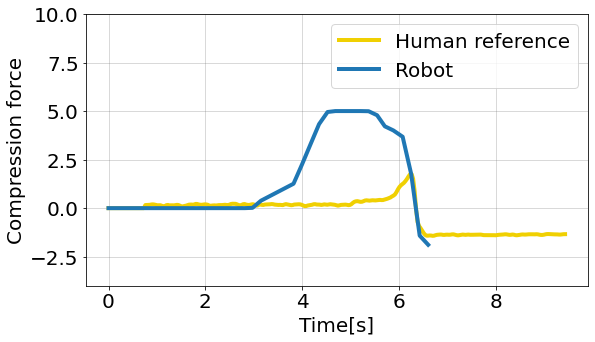

In [780]:
zeros = np.array([0]*23)
new_ref = np.append(zeros, human_refL[0:len(human_refL)-23])
font = 20
fig, axs = plt.subplots(1)
fig.set_size_inches((size[0]*3,size[1]*2))
axs.plot(np.array(time)-time[0], new_ref, color=low_colour, label="Human reference",linewidth=4)
axs.plot(np.array(timeL4[10::])-timeL4[10], pre_opt_rasp_robotL4[10::], color=robot_lab, label="Robot",linewidth=4)
axs.set_xlabel("Time[s]", fontsize=font)
axs.set_ylabel("Compression force", fontsize=font)
axs.legend(loc="upper right", fontsize=font)
axs.tick_params(axis='both', labelsize=font)
axs.set_ylim([-4,10])
axs.grid(b=True, color='#666666', linestyle='-', alpha = 0.3)
plt.savefig("pressureSensor_Low_notOptimal.pdf", format="pdf")

In [781]:
opt_rasp_robotL1 = [0.005145860157540483,  -0.017843585645891835, -0.017843585642708604, 0.005910153296781573, 0.0059101532970089465, -0.017843585642708604, -0.01784358564179911, 0.005910301968810927, 0.006353338138183062, 0.006353486809189235, 0.00635348681009873, 0.00635348681009873, 0.00635348681009873, 0.00635348681009873, 0.00635348681009873, 0.00635348681009873, 0.00635348681009873, 0.00635348681009873, 0.00635348681009873, 0.00635348681009873, 0.00635348681009873, 0.00635348681009873, 0.00635348681009873, 0.00635348681009873, 0.00635348681009873, 0.00635348681009873, 0.00635348681009873, 0.00635348681009873, 0.00635348681009873, 0.00635348681009873, 0.00635348681009873, 0.00635348681009873, 0.00635348681009873, 0.00635348681009873, 0.00635348681009873, 0.00635348681009873, 0.00635348681009873, 0.00635348681009873, 0.00635348681009873, 0.00635348681009873, 0.00635348681009873, 0.00635348681009873, 0.00635348681009873, 0.00635348681009873, 0.00635348681009873, 0.00635348681009873, 0.00635348681009873, 0.00635348681009873, 0.00635348681009873, 0.00635348681009873, 0.00635348681009873, 0.00635348681009873, 0.00635348681009873, 0.00635348681009873, 0.00635348681009873, 0.00635348681009873, 0.00635348681009873, 0.00635348681009873, 0.006353488025183651, 0.006380254075793346, 0.01717934184330261, 0.09968088750815696, 0.2786411374219142, 0.6780593826579207, 0.9627893415471362, 1.276788869042889, 1.8837039079587612, 2.000376042267021, 2.006796527595384, 2.0359496666144423, 2.0704583296977717, 2.018038060496224, 2.0704583296978853, 2.0359496672239175, 2.0068102140469364, 2.0067968316319593, 2.0305505699640207, 2.030550569963225, 2.006796682352501, 2.0063536461832427, 2.006353497512123, 2.0063534975112134, 2.0063534975112134, 2.0063534975112134, 2.0063534975112134, 2.0063534975112134, 2.0063534975112134, 2.0063534975112134, 2.0063534975112134, 2.0063534975112134, 2.0063534975112134, 2.0063534975112134, 2.0063534975112134, 2.0063534975112134, 2.0063534975112134, 2.0063534975112134, 2.0063534975112134, 2.0063534975112134, 2.0063534975112134, 2.0063534975112134, 2.006353497512123, 2.006353646183129, 2.0067966823523875, 2.0305505699631112, 2.030550569963225, 2.0067966817356364, 2.0063387703377202, 1.996384231031584, 1.6565120350284133, 0.33593943595337805]
timeL1 =[1.4235801696777344, 1.5830562114715576, 1.7596075534820557, 1.9350883960723877, 2.111184597015381, 2.2874596118927, 2.463286876678467, 2.639150857925415, 2.815045118331909, 2.9906740188598633, 3.167041540145874, 3.3429884910583496, 3.502742290496826, 3.678868293762207, 3.8553969860076904, 4.030928611755371, 4.206749200820923, 4.38338303565979, 4.55890679359436, 4.734716176986694, 4.910634279251099, 5.087551832199097, 5.262542724609375, 5.423139572143555, 5.598510265350342, 5.774688959121704, 5.95048451423645, 6.126650333404541, 6.302394151687622, 6.478747367858887, 6.654817581176758, 6.815233469009399, 6.9906325340271, 7.167161464691162, 7.34239387512207, 7.518483877182007, 7.694472789764404, 7.887387275695801, 8.062917709350586, 8.238384485244751, 8.398671388626099, 8.574540615081787, 8.75106954574585, 8.926481246948242, 9.102222681045532, 9.278274297714233, 9.454370021820068, 9.630510807037354, 9.80628490447998, 9.982646703720093, 10.158615112304688, 10.334791660308838, 10.494383335113525, 10.67091417312622, 10.830485105514526, 11.007015228271484, 11.182906866073608, 11.358482122421265, 11.534931659698486, 11.710523128509521, 11.886455774307251, 12.062073945999146, 12.238123178482056, 12.41429853439331, 12.590896368026733, 12.767007827758789, 12.942577600479126, 13.167063474655151, 13.342971324920654, 13.518458366394043, 13.694900751113892, 13.87034296989441, 14.030260801315308, 14.20611047744751, 14.382484197616577, 14.558435201644897, 14.73451852798462, 14.910430669784546, 15.085792303085327, 15.262363195419312, 15.438162565231323, 15.630533218383789, 15.80647587776184, 15.966477155685425, 16.15848445892334, 16.334025859832764, 16.526562929153442, 16.686269521713257, 16.862653732299805, 17.038407802581787, 17.214515686035156, 17.390226125717163, 17.550462007522583, 17.726369380950928, 17.901678800582886, 18.07842493057251, 18.750272274017334, 18.925588369369507, 19.102327346801758, 19.277858018875122, 19.45438575744629, 19.629948139190674, 19.806100368499756, 19.975237369537354, 20.142556190490723, 20.302332401275635, 20.46218967437744, 20.6381516456604, 20.81368088722229, 20.990217685699463]

opt_rasp_robotL2 = [-0.025387035620838105, -9.102565627472359e-06, 4.279853328625904e-06, 4.2804609847735264e-06, 4.2804609847735264e-06, 4.280461894268228e-06, 4.430357080309477e-06, 0.000475724154512136, 0.039567169151041526, 0.4059701659990651, 1.0784377846507596, 1.7320625132307441, 1.9867186091257736, 1.6624724814799947, 0.5078698504629529, -0.05392847938264822, -0.03493595431370977, -0.024219556204343462, -0.0004522892256773048, -0.0054083478856910006, -0.045289193510939185, -0.0457456120942652, -0.03500436831609477, -0.06410040366120029, -0.005838001639176582, -9.251233564100403e-06, 4.279852419131203e-06, 4.2804609847735264e-06, 4.2804609847735264e-06, 4.280460075278825e-06, 4.131788955419324e-06, -0.0004389043801893422, -0.024192791990913065, -0.024192791990913065, -0.00043890498795917665, -9.251233564100403e-06, -0.005394816191142127, -0.03988994757912678, -0.005394816190346319, -9.102561648433038e-06, 4.279853328625904e-06, 4.2804609847735264e-06, 4.2804609847735264e-06, 4.2804609847735264e-06, 4.2804609847735264e-06, 4.2804609847735264e-06, 4.2804609847735264e-06, 4.2804609847735264e-06, 4.2804609847735264e-06, 4.2804609847735264e-06, 4.27924578616512e-06, -2.2485584167952766e-05, -0.010793912841563724, -0.07978417561935203, -0.010793912841677411, -2.2485583258458064e-05, 4.42792043031659e-06, 0.0004479113225670517, 0.025531656273528824, 0.09913043448398184, 0.24718338418028907, 0.7827972089165769, 1.0497282825838283, 1.339970059020402, 1.8751404015724802, 1.9747992063640822, 1.9995608035014811, 2.0000041424883648, 2.00000429116119, 2.0000042911620994, 2.0000042911620994, 2.0000042911620994, 2.0000042911620994, 2.0000042911620994, 2.0000042911620994, 2.0000042911620994, 2.0000042911620994, 2.0000042911620994, 2.0000042911620994, 2.0000042911620994, 2.0000042911620994, 2.0000042911620994, 2.0000042911620994, 2.000004291163009, 2.000004439834015, 2.0004474760032736, 2.0242013636139973, 2.024201363614111, 2.0004474760033872, 2.000004439834129, 2.000004291163009, 2.0000042911620994, 2.0000042911620994, 2.0000042911620994, 2.0000042911620994, 2.0000042911620994, 2.0000042911620994, 2.0000042911620994, 2.0000042911620994, 2.0000042911620994, 2.0000042911620994, 2.0000042911620994, 2.0000042911620994, 2.0000042911620994, 2.0000042911620994, 2.0000042911620994, 2.0000042911620994, 2.0000042911620994, 2.0000042911620994, 2.0000042911620994, 2.0000042911620994, 2.0000042911620994, 2.0000042911620994, 2.0000042911620994, 2.0000042911620994, 2.0000042911620994, 2.0000042911620994, 2.0000042911620994, 2.0000042911620994, 2.0000042911620994, 2.0000042911620994, 2.0000042911620994, 2.0000042911620994, 2.0000042911620994, 2.0000042911620994, 2.0000042911620994, 2.0000042911620994, 2.0000042911620994, 2.0000042911620994, 2.0000042911620994, 2.0000042911620994, 2.0000042911620994, 2.0000042911620994, 2.0000042911620994, 2.0000042911620994, 2.0000042911620994, 2.0000042911620994, 2.0000042911620994, 2.0000042911620994, 2.0000042911620994, 2.0000042911620994, 2.0000042911620994, 2.0000042911620994, 2.0000042911620994, 2.0000042911620994, 2.0000042905544433, 1.9999909081394662, 1.9946051945107683, 1.9601100625114896, 1.994591360602385, 1.9931536999600894, 1.8397557540546359, 1.2924831165728392, 0.27165563969811046]
timeL2 = [1.4079573154449463, 1.5838630199432373, 1.7599492073059082, 1.9195733070373535, 2.095689296722412, 2.272170305252075, 2.4480321407318115, 2.6242451667785645, 2.799769401550293, 2.9759843349456787, 3.1516618728637695, 3.3279905319213867, 3.503938913345337, 3.679391860961914, 3.8562164306640625, 4.03174901008606, 4.207279682159424, 4.383807897567749, 4.5598413944244385, 4.735428810119629, 4.9121716022491455, 5.087202310562134, 5.26335334777832, 5.439950942993164, 5.5990891456604, 5.775028944015503, 5.951120853424072, 6.127639055252075, 6.303228378295898, 6.480035781860352, 6.639697551727295, 6.815556049346924, 6.991635322570801, 7.1678712368011475, 7.3438544273376465, 7.519798040390015, 7.696098327636719, 7.8711748123168945, 8.047933340072632, 8.223895788192749, 8.399751901626587, 8.57508373260498, 8.735198020935059, 8.911121368408203, 9.087734699249268, 9.263524055480957, 9.439269781112671, 9.598950386047363, 9.775847911834717, 9.935685873031616, 10.111760377883911, 10.271528959274292, 10.447648763656616, 10.6227867603302, 10.783553123474121, 10.959174394607544, 11.134979248046875, 11.31120252609253, 11.486944913864136, 11.662992238998413, 11.839541673660278, 12.015669107437134, 12.191256284713745, 12.367854595184326, 12.54336667060852, 12.718899011611938, 12.895425796508789, 13.070707082748413, 13.247086763381958, 13.422651529312134, 13.599087238311768, 13.791633129119873, 13.967538595199585, 14.159159898757935, 14.334634065628052, 14.510903358459473, 14.686665773391724, 14.862450122833252, 15.038784265518188, 15.215105533599854, 15.390865325927734, 15.551135540008545, 15.742508888244629, 15.918761968612671, 16.09488272666931, 16.25535273551941, 16.430662870407104, 16.60654330253601, 16.783427238464355, 16.95937466621399, 17.13548517227173, 17.3107488155365, 17.48686408996582, 17.662793159484863, 17.822834491729736, 17.9989492893219, 18.174747467041016, 18.350655794143677, 18.5269455909729, 18.686903953552246, 18.862788200378418, 19.039076566696167, 19.214454412460327, 19.391135692596436, 19.566824197769165, 19.74314022064209, 19.934203147888184, 20.110679864883423, 20.286794662475586, 20.446343660354614, 20.623213529586792, 20.798367977142334, 20.97420382499695, 21.15062689781189, 21.32624387741089, 21.503235816955566, 21.678213596343994, 21.855012893676758, 22.030924558639526, 22.206814289093018, 22.382455825805664, 22.558306455612183, 22.734381675720215, 22.9109103679657, 23.086772680282593, 23.278301239013672, 23.454833030700684, 23.630048513412476, 23.806233882904053, 23.9985032081604, 24.17403554916382, 24.35056233406067, 24.526426076889038, 24.701966047286987, 24.87846064567566, 25.05451464653015, 25.229973316192627, 25.40657687187195, 25.58212900161743, 25.742557287216187, 26.430294036865234, 26.606820344924927, 26.781945943832397, 26.958059549331665, 27.134690046310425, 27.310360431671143, 27.48601770401001, 27.657543897628784, 27.82225465774536, 27.981842041015625, 28.141791343688965, 28.318079710006714, 28.493810415267944, 28.67014479637146]

opt_rasp_robotL3 = [-0.0011899631689402668,  4.2804568920473685e-06, 4.2804609847735264e-06, 4.2804609847735264e-06, 4.2804609847735264e-06, 4.2804609847735264e-06, 4.2804609847735264e-06, 4.2804609847735264e-06, 4.2804609847735264e-06, 4.2804609847735264e-06, 4.2804609847735264e-06, 4.2804609847735264e-06, 4.2804609847735264e-06, 4.2804609847735264e-06, 4.2804609847735264e-06, 4.2804609847735264e-06, 4.2804609847735264e-06, 4.2804609847735264e-06, 4.2804609847735264e-06, 4.2804609847735264e-06, 4.2804609847735264e-06, 4.2804609847735264e-06, 4.2804609847735264e-06, 4.2804609847735264e-06, 4.2804609847735264e-06, 4.2804609847735264e-06, 4.2804609847735264e-06, 4.2804609847735264e-06, 4.2804609847735264e-06, 4.2804609847735264e-06, 4.2804609847735264e-06, 4.2804609847735264e-06, 4.2804609847735264e-06, 4.2804609847735264e-06, 4.2804609847735264e-06, 4.2804609847735264e-06, 4.2804609847735264e-06, 4.2804609847735264e-06, 4.2804609847735264e-06, 4.2804609847735264e-06, 4.2804609847735264e-06, 4.2804609847735264e-06, 4.2804609847735264e-06, 4.2804609847735264e-06, 4.2804609847735264e-06, 4.2804609847735264e-06, 4.2804609847735264e-06, 4.2804609847735264e-06, 4.2804609847735264e-06, 4.2804609847735264e-06, 4.2804609847735264e-06, 4.2804609847735264e-06, 4.2804609847735264e-06, 4.2804609847735264e-06, 4.281070346223714e-06, 1.7960834611585597e-05, 0.006290941039196696, 0.0919465404475659, 0.29469086144399625, 0.7899663794514709, 0.96451260107699, 1.0606928553002035, 1.5640954390900106, 1.9742839179558587, 1.9999495642186957, 2.000460856587324, 2.0296004602653284, 2.06409559165877, 2.0058473178389704, 2.002274196513099, 2.1381403786691635, 2.3165323644293494, 2.3026480583314424, 2.2216142087064554, 2.262792656182228, 2.1516097031344543, 2.086645859567966, 2.120671041287437, 2.1215571118004846, 2.134999408777844, 2.182463468826427, 2.0654956292196403, 2.0408253365123983, 2.0108161660491533, 2.0453111481574524, 2.045754184324892, 2.0350129405485404, 2.0641226556508627, 2.0121320395976454, 2.0883064931446143, 2.05468390300814, 2.0492981887708765, 2.0483987340184058, 2.000890809520115, 2.0004480706911636, 2.025087733299074, 2.0725956571898223, 2.049284805748357, 2.025087881968375, 2.0242016609589655, 2.0004474760061157, 2.0000045885060445, 2.000447476004183, 2.0242013642215397, 2.0242147466366305, 2.005846573262261, 2.03991205089676, 2.010802484465671, 2.039911902224844, 2.0054033884210867, 2.0000176741847326, 2.0000042917697556, 2.0000042911620994, 2.0000042911620994, 2.0000042911620994, 2.0000042911620994, 2.0000042911620994, 2.0000042911620994, 2.0000042911620994, 2.0000042911620994, 2.0000042911620994, 2.0000042911620994, 2.0000042911620994, 2.0000042911620994, 2.000004291769642, 2.000017674184619, 2.0054033878134305, 2.0398985192023247, 2.0054033878134305, 2.0000176741847326, 2.0000042917697556, 2.0000042911620994, 2.0000042911620994, 2.0000042911620994, 2.0000042911620994, 2.0000042911620994, 2.0000042911620994, 2.0000042911620994, 2.0000042911620994, 2.0000042911620994, 2.0000042911620994, 2.0000042911620994, 2.0000042911620994, 2.0000042911620994, 2.0000042911620994, 2.0000042911620994, 2.0000042911620994, 2.0000042911620994, 2.0000042911620994, 2.0000042911620994, 2.0000042911620994, 2.0000042911620994, 2.0000042911620994, 2.0000042911620994, 2.0000042911620994, 2.0000042911620994, 2.0000042911620994, 2.000004291163009, 2.000004439834015, 2.0004474760032736, 2.0242013636139973, 2.024201363614111, 2.0004474760033872, 2.000004439834129, 2.000004291163009, 2.0000042911693754, 2.0000054860149703, 2.0036717098992085, 2.2467399120813525, 2.8531577856131207, 2.9935835071485144, 2.999990609452425, 2.9999907635981344, 2.994148182937238, 2.9291163829440166, 2.827689581829077, 2.494147130405281, 2.098108103505524, 1.6286134408936732, -0.5420516726314872]
timeL3 = [1.3908488750457764, 1.5667715072631836, 1.743004322052002, 1.9191277027130127, 2.1103241443634033, 2.2870748043060303, 2.4626266956329346, 2.639040470123291, 2.8145511150360107, 2.991084575653076, 3.1667897701263428, 3.342994451522827, 3.518723964691162, 3.678525447845459, 3.8550543785095215, 4.030586004257202, 4.207114934921265, 4.382396221160889, 4.559061765670776, 4.735229730606079, 4.911038160324097, 5.1030683517456055, 5.2790937423706055, 5.454383611679077, 5.630272626876831, 5.806430101394653, 5.982287645339966, 6.158488750457764, 6.334339380264282, 6.510734558105469, 6.686633110046387, 6.846639394760132, 7.022534608840942, 7.199132919311523, 7.3751115798950195, 7.550905704498291, 7.726733684539795, 7.903057813644409, 8.078498363494873, 8.254112005233765, 8.430358648300171, 8.590928554534912, 8.766459941864014, 8.942249774932861, 9.118578672409058, 9.294580936431885, 9.454078197479248, 9.630937099456787, 9.806144714355469, 9.982701778411865, 10.158256530761719, 10.334542512893677, 10.510046243667603, 10.686542987823486, 10.846143007278442, 11.022217035293579, 11.181948184967041, 11.358165502548218, 11.518564462661743, 11.694413185119629, 11.869893550872803, 12.046744346618652, 12.222034931182861, 12.398657321929932, 12.573726654052734, 12.750039100646973, 12.909857273101807, 13.086132526397705, 13.262624979019165, 13.422595500946045, 13.598382472991943, 13.774072647094727, 13.934108257293701, 14.110046863555908, 14.286160707473755, 14.462178945541382, 14.63851022720337, 14.814091444015503, 14.974351644515991, 15.150647163391113, 15.310011625289917, 15.486511945724487, 15.66218876838684, 15.838191509246826, 16.013476848602295, 16.189968585968018, 16.36607813835144, 16.541727542877197, 16.733900785446167, 16.909700632095337, 17.086448669433594, 17.262030839920044, 17.438181400299072, 17.614444971084595, 17.790582180023193, 17.966465711593628, 18.14235782623291, 18.31802773475647, 18.494107961654663, 18.65368151664734, 18.830049514770508, 19.021952390670776, 19.182284832000732, 19.35807967185974, 19.534325122833252, 19.709644079208374, 19.8861722946167, 20.061704397201538, 20.237594604492188, 20.413418292999268, 20.590131998062134, 20.76536726951599, 20.94191861152649, 21.117770433425903, 21.29374885559082, 21.470096826553345, 21.64522886276245, 21.821810483932495, 21.98133397102356, 22.15771770477295, 22.317412614822388, 22.493180990219116, 22.66950273513794, 22.845149993896484, 23.021841049194336, 23.197710275650024, 23.373190879821777, 23.54924702644348, 23.72533416748047, 23.885570764541626, 24.061500787734985, 24.238008737564087, 24.414010047912598, 24.59000253677368, 24.7490975856781, 24.925042629241943, 25.10161018371582, 25.26123285293579, 25.437467336654663, 25.61316680908203, 25.79006266593933, 25.965113639831543, 26.141321897506714, 26.3171489238739, 26.47709059715271, 26.669105768203735, 26.828954696655273, 27.00522017478943, 27.18101215362549, 27.357513904571533, 27.532845497131348, 27.709411144256592, 27.88561487197876, 28.06169629096985, 28.23735785484314, 28.413442850112915, 28.588988780975342, 28.765413284301758, 28.94119167327881, 29.1173837184906, 29.293089151382446, 29.452848196029663, 29.62951135635376, 29.788700342178345, 29.964736223220825, 30.63713026046753, 30.79676628112793, 30.95738649368286, 31.11724615097046, 31.261213302612305, 31.421196937561035, 31.59704566001892, 31.7731716632843, 31.92900013923645, 32.09267735481262, 32.25341248512268, 32.413323163986206, 32.589335680007935, 32.780569553375244, 32.957016706466675]

opt_rasp_robotL4 = [0.003497388158962167,  -0.0007073161943935702, -0.035202447579194995, -0.0007073161904145309, 0.004678397438283355, 0.004691779853260414, 0.004691780460916561, 0.004691780460916561, 0.004691780460916561, 0.004691780460916561, 0.004691780460916561, 0.004691780460916561, 0.004691780460916561, 0.004691780460916561, 0.004691780460007067, 0.004691631788887207, 0.004248595618832951, -0.01950544066301063, -0.019948476832155393, -0.01994847683226908, -0.01950544066301063, 0.004248595618719264, 0.004691631789000894, 0.004691780460007067, 0.004691780460916561, 0.004691780460916561, 0.004691780460916561, 0.004691780460916561, 0.004691780460916561, 0.004691780460916561, 0.004691780460916561, 0.004691780460916561, 0.004691780460916561, 0.004691780460916561, 0.004691780460916561, 0.004691780460916561, 0.004691780460916561, 0.004691780460916561, 0.004691780460916561, 0.004691780460916561, 0.004691780460916561, 0.004691779852350919, 0.004678248158597853, -0.001163884055017661, -0.0647987653543396, -0.06524180152553072, -0.025361253850974208, -0.02040534325703902, -0.04460241692515865, -0.07422550135640904, -0.12583165494106652, -0.2478281058262155, -0.4773967647701056, -0.8068936168060645, -0.9432181402745528, -0.9898819131320806, -0.9952948406493078, -0.995308224280393, -0.9953079269300815, -0.9944071280522166, -0.9373909967316649, -0.6306877603170733, -0.07079641996779173, 0.09488194586117515, 0.6328742299726855, 0.9848136940966015, 1.0046504418905897, 1.0047051670038627, 1.010090882462805, 1.0445860138515854, 1.0100908824626913, 1.004705168834107, 1.0046917864190164, 1.004691785811474, 1.004691785811474, 1.0046917858123834, 1.0046919344833896, 1.005134970652648, 1.0288888582633717, 1.0288888582633717, 1.0051349706525343, 1.0046919344833896, 1.0046917858123834, 1.004691785811474, 1.004691785811474, 1.004691785811474, 1.004691785811474, 1.004691785811474, 1.004691785811474, 1.004691785811474, 1.004691785811474, 1.004691785811474, 1.004691785811474, 1.004691785811474, 1.004691785811474, 1.004691785811474, 1.0046917864190164, 1.0047051688339934, 1.010090882462805, 1.0445860138515854, 1.0100908824626913, 1.004705168834107, 1.0046917864190164, 1.0046917858151119, 1.0046923829331718, 1.006518654393858, 1.1249042264842046, 1.3840088356349725, 1.5849549762243669, 1.9695569047378285, 2.004583533343407, 1.9929932461988074, 1.8693224783255573, 1.7988491735744674, 1.5565831455820671, 0.7364349321024974]
timeL4 = [1.4068477153778076, 1.5823779106140137, 1.7583198547363281, 1.9341967105865479, 2.1106457710266113, 2.2865264415740967, 2.4464762210845947, 2.6227738857269287, 2.7988882064819336, 2.974976062774658, 3.150972604751587, 3.3110013008117676, 3.4865236282348633, 3.662846326828003, 3.854031801223755, 4.030145168304443, 4.206217527389526, 4.382619142532349, 4.5580151081085205, 4.734067916870117, 4.894932746887207, 5.070005893707275, 5.246658802032471, 5.421928405761719, 5.598219156265259, 5.758475065231323, 5.934132814407349, 6.110172986984253, 6.270910978317261, 6.4471435546875, 6.622100591659546, 6.798831462860107, 6.974476099014282, 7.149919033050537, 7.326522350311279, 7.502583026885986, 7.678570508956909, 7.854527473449707, 8.030211687088013, 8.206431150436401, 8.382007122039795, 8.558355331420898, 8.734743595123291, 8.910188674926758, 9.08601427078247, 9.26179838180542, 9.437777757644653, 9.61446213722229, 9.790141105651855, 9.965672254562378, 10.14220142364502, 10.317895889282227, 10.47775650024414, 10.654017925262451, 10.830381631851196, 10.990345001220703, 11.18228554725647, 11.357816934585571, 11.534344911575317, 11.70965051651001, 11.885635614395142, 12.062504529953003, 12.238161563873291, 12.414008617401123, 12.574010610580444, 12.749496459960938, 12.926114797592163, 13.102595567703247, 13.278169631958008, 13.454420328140259, 13.630407094955444, 13.805854558944702, 13.965988874435425, 14.142223358154297, 14.318148851394653, 14.477972269058228, 14.65432620048523, 14.830214262008667, 15.005594730377197, 15.181736469268799, 15.358254194259644, 15.534175634384155, 15.709865093231201, 15.869832277297974, 16.04558038711548, 16.221930742263794, 16.39788317680359, 16.573840618133545, 16.749349117279053, 16.909698486328125, 17.085931062698364, 17.261704206466675, 17.43757724761963, 17.61397123336792, 17.789856910705566, 17.965209007263184, 18.14196276664734, 18.31783103942871, 18.49412178993225, 18.66934609413147, 18.830044746398926, 19.00521755218506, 19.181373596191406, 19.357571125030518, 19.534116506576538, 19.70925807952881, 20.38092613220215, 21.06977415084839, 21.229777097702026, 21.362446308135986, 21.548914432525635, 21.709485054016113, 21.869906663894653, 22.045177459716797, 22.23771071434021, 22.413581132888794]

opt_rasp_robotL5 = [0.0003988258722529281,  0.001591576693499519, 0.0015915766975922452, 0.0015915766975922452, 0.0015915766975922452, 0.0015915766975922452, 0.0015915766975922452, 0.0015915766965690636, 0.0015914280256765778, 0.0011483918564181295, -0.022605495754305593, -0.022605495754305593, 0.0011483918563044426, 0.0015914280256765778, 0.0015915766966827505, 0.0015915766975922452, 0.0015915766975922452, 0.0015915766975922452, 0.0015915766975922452, 0.0015915766975922452, 0.0015915766975922452, 0.0015915766975922452, 0.0015915766975922452, 0.0015915766975922452, 0.0015915766975922452, 0.0015915766975922452, 0.0015915766975922452, 0.0015915766975922452, 0.0015915766975922452, 0.0015915766975922452, 0.0015915766975922452, 0.0015915766975922452, 0.0015915766975922452, 0.0015915766975922452, 0.0015915766975922452, 0.0015915766975922452, 0.0015915766975922452, 0.0015915766975922452, 0.0015915766975922452, 0.0015915766975922452, 0.0015915766975922452, 0.0015915766975922452, 0.0015915766975922452, 0.0015915766975922452, 0.0015915766975922452, 0.0015915766975922452, 0.0015915766975922452, 0.0015915766975922452, 0.0015915766975922452, 0.0015915766975922452, 0.0015915766975922452, 0.0015915766975922452, 0.0015915766975922452, 0.0015915766975922452, 0.0015915766975922452, 0.0015915766985017399, 0.001591725980802039, 0.0020487435114091568, 0.03305565912819475, 0.20483201561557962, 0.6840254825804095, 0.9925796598049601, 1.3419736259869524, 1.948432544267348, 2.0014697966713584, 2.002048299673902, 2.03165800533975, 2.1015779069578002, 2.165226022608749, 2.1065473504623924, 2.0532106767719824, 2.052297690324167, 2.046898295722144, 2.0070040676802137, 2.0016049710289963, 2.001591588006363, 2.0015915873988206, 2.0015915873988206, 2.0015915873988206, 2.001591588006363, 2.00160497042134, 2.0069906840501517, 2.041485815438932, 2.006990684050038, 2.001604970421454, 2.001591588006363, 2.0015915873988206, 2.0015915873988206, 2.0015915873988206, 2.0015915873988206, 2.0015915873988206, 2.0015915873988206, 2.0015915873988206, 2.0015915873988206, 2.0015915873988206, 2.0015915873988206, 2.0015915873988206, 2.0015915873988206, 2.0015915873988206, 2.0015915873988206, 2.0015915873988206, 2.0015915873988206, 2.0015915873988206, 2.0015915873988206, 2.0015915873988206, 2.0015915873988206, 2.0015915873988206, 2.0015915873988206, 2.0015915873988206, 2.001591588006363, 2.0016049710288826, 2.007004067072671, 2.0468849120902632, 2.0468849120901496, 2.007004067072671, 2.00160497102263, 2.0015905442629673, 1.9984220791941425, 1.8042841076180594, 1.5498942024303233, 0.6067006279815814]
timeL5 = [1.4056942462921143, 1.5808920860290527, 1.7574594020843506, 1.9335689544677734, 2.1096384525299072, 2.2696542739868164, 2.460994243621826, 2.6214756965637207, 2.7970633506774902, 2.97279953956604, 3.148827314376831, 3.3251736164093018, 3.500627040863037, 3.6770689487457275, 3.8533434867858887, 4.028902769088745, 4.2050275802612305, 4.381119012832642, 4.556560277938843, 4.732804775238037, 4.909084796905518, 5.0850913524627686, 5.260556221008301, 5.437198162078857, 5.6123456954956055, 5.7730302810668945, 5.9487669467926025, 6.124547719955444, 6.3010759353637695, 6.476607799530029, 6.653317213058472, 6.82867956161499, 7.005178213119507, 7.180367469787598, 7.357120990753174, 7.532649993896484, 7.709125280380249, 7.884547710418701, 8.060346841812134, 8.236619710922241, 8.412497282028198, 8.589020013809204, 8.765132904052734, 8.941251516342163, 9.11703372001648, 9.292467594146729, 9.4521644115448, 9.62829065322876, 9.80470061302185, 9.98087739944458, 10.156166553497314, 10.332778453826904, 10.508063793182373, 10.684079885482788, 10.860283613204956, 11.021116971969604, 11.196476697921753, 11.372318506240845, 11.548563957214355, 11.724487066268921, 11.90059494972229, 12.076972246170044, 12.252007484436035, 12.428312063217163, 12.605019569396973, 12.780141592025757, 12.956735849380493, 13.133033514022827, 13.292617559432983, 13.468151807785034, 13.644593715667725, 13.820116519927979, 13.996078968048096, 14.15648341178894, 14.332412958145142, 14.492134809494019, 14.66784143447876, 14.844032764434814, 15.020155668258667, 15.227805852890015, 15.403924465179443, 15.580348253250122, 15.755871534347534, 15.93257188796997, 16.108713626861572, 16.28391122817993, 16.44448208808899, 16.620222568511963, 16.796616554260254, 16.972696542739868, 17.148043632507324, 17.324262380599976, 17.500791549682617, 17.676331043243408, 17.852702856063843, 18.012128829956055, 18.18797492980957, 18.36422300338745, 18.540363550186157, 18.715954303741455, 18.89152765274048, 19.067918300628662, 19.24428677558899, 19.42015504837036, 19.59611964225769, 19.772182941436768, 20.460008144378662, 20.636476039886475, 20.812568426132202, 20.988066911697388, 21.163973093032837, 21.33978843688965, 21.499868869781494, 21.67630887031555, 21.833327293395996, 21.99633479118347, 22.155873775482178, 22.316049575805664, 22.492233514785767, 22.66780424118042, 22.84376358985901]


In [782]:
# save_csv_data(opt_rasp_robotL1, 'opt_rasp_robotL1')
# save_csv_data(timeL1, 'timeL1_opt')

# save_csv_data(opt_rasp_robotL2, 'opt_rasp_robotL2')
# save_csv_data(timeL2, 'timeL2_opt')

# save_csv_data(opt_rasp_robotL3, 'opt_rasp_robotL3')
# save_csv_data(timeL3, 'timeL3_opt')

# save_csv_data(opt_rasp_robotL4, 'opt_rasp_robotL4')
# save_csv_data(timeL4, 'timeL4_opt')

# save_csv_data(opt_rasp_robotL5, 'opt_rasp_robotL5')
# save_csv_data(timeL5, 'timeL5_opt')

In [783]:
max(opt_rasp_robotL1), max(opt_rasp_robotL2), max(opt_rasp_robotL3), max(opt_rasp_robotL4), max(opt_rasp_robotL5)

(2.0704583296978853,
 2.024201363614111,
 2.9999907635981344,
 2.004583533343407,
 2.165226022608749)

C:\Users\Catarina.LAPTOP-GAR6C5UR\AppData\Local\Temp\ipykernel_6384\1434853003.py:16: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  axs.grid(b=True, color='#666666', linestyle='-', alpha = 0.3)


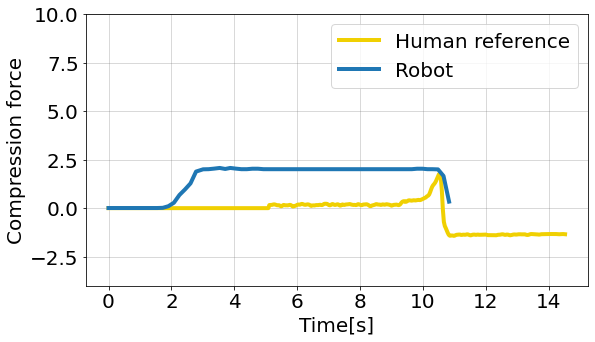

In [784]:
zeros = np.array([0]*160)
new_ref = np.append(zeros, human_refL)
prev_time = np.array(time)-time[0]
new_time = np.append(prev_time, prev_time[0:160]+prev_time[-1])
font = 20
# new_time = np.array(time[185-int(80/2):185+int(80/2)])-time[185-int(80/2)]
fig, axs = plt.subplots(1)
fig.set_size_inches((size[0]*3,size[1]*2))
axs.plot(new_time, new_ref, color=low_colour, label="Human reference", linewidth=4)
axs.plot(np.array(timeL1[50::])-timeL1[50::][0], opt_rasp_robotL1[50::], color=robot_lab,label="Robot",linewidth=4)
axs.set_xlabel("Time[s]", fontsize=font)
axs.set_ylabel("Compression force", fontsize=font)
axs.legend(loc="upper right", fontsize=font)
axs.tick_params(axis='both', labelsize=font)
axs.set_ylim([-4,10])
axs.grid(b=True, color='#666666', linestyle='-', alpha = 0.3)
plt.savefig("pressureSensor_Low_Optimal.pdf", format="pdf")

### Medium raspberry

In [787]:
pre_opt_rasp_robot = [-0.03535833893158724, -0.07857160429523447, -0.0785530930349978, 0.014677510142405481, 0.08414084389676191, 0.05457173878812682, -0.06774181526293432, -0.03415952164937153, 0.0007518810778037732, -0.04895737055039717, -0.0014360636342871658, 0.05500154121534706, 0.03664674904075582, 0.019646953648702947, -0.009506029398949067, -0.03283026447161319, 0.014221090950627513, 0.009264883012519931, -0.05435631974489752, -0.049440259052744295, 0.014593497230634966, -0.06602393360105907, -0.08936496852288656, -0.08400616779033498, -0.03735814730680431, -0.07992354058706042, -0.11754893231045571, -0.14080283422379125, 0.029501832005848883, 0.09009168176669391, 0.1515988150136991, 0.6383759448491446, 0.9496445595225396, 1.374785250658988, 2.04680433997612, 2.4464653707841535, 3.01852343169503, 3.0899287130582707, 3.0904803013420405, 3.09048030621193, 3.090037270043581, 3.0662833824328573, 3.066283381825315, 3.090023887020834, 3.0850812095615083, 3.050586226843734, 3.0850813582335377, 3.090467071863941, 3.090480752228814, 3.0913802088048215, 3.1443004624851483, 3.18956702296407, 3.1765961684460535, 3.1225126082301813, 3.537941031047353, 3.8639554580134927, -0.9714036716229657, -6.530085218911836, -3.8508830132776666, -4.440911225317336]
time = [ 0.61726 ,  0.648234,  0.679934,  0.711178,  0.742096,  0.788331,
        0.819884,  0.850773,  0.882725,  0.912837,  0.94368 ,  0.974048,
        1.005372,  1.037129,  1.068284,  1.099393,  1.13097 ,  1.162009,
        1.192436,  1.223576,  1.270297,  1.302162,  1.347637,  1.378496,
        1.409595,  1.441026,  1.471573,  1.502156,  1.534193,  1.565409,
        1.59673 ,  1.627199,  1.658054,  1.689128,  1.721004,  1.750924,
        1.782829,  1.813206,  1.845175,  1.876108,  1.906534,  1.938699,
        1.970056,  2.001325,  2.033831,  2.063937,  2.094404,  2.124553,
        2.155405,  2.18641 ,  2.217467,  2.248903,  2.280978,  2.326939,
        2.358891,  2.389776,  2.41987 ,  2.450944,  2.482142,  2.512751,
        2.544392,  2.575692,  2.606773,  2.63783 ,  2.669424,  2.70014 ,
        2.731184,  2.762515,  2.808889,  2.839765,  2.870482,  2.901341,
        2.93311 ,  2.964509,  2.996081,  3.025953,  3.057163,  3.088493,
        3.119819,  3.151316,  3.182469,  3.212519,  3.243195,  3.274527,
        3.305856,  3.336445,  3.367041,  3.398309,  3.430289,  3.461252,
        3.508345,  3.539161,  3.569499,  3.600762,  3.631274,  3.663095,
        3.693535,  3.724318,  3.756225,  3.787298,  3.818091,  3.84772 ,
        3.895251,  3.926491,  3.958489,  3.989888,  4.020245,  4.052215,
        4.099136,  4.129734,  4.160281,  4.190703,  4.221526,  4.252913,
        4.284737,  4.315562,  4.362803,  4.393821,  4.425022,  4.456667,
        4.488475,  4.518998,  4.549651,  4.580569,  4.611337,  4.642094,
        4.672802,  4.70363 ,  4.733741,  4.764649,  4.795909,  4.827076,
        4.85853 ,  4.889568,  4.920553,  4.951451,  4.98304 ,  5.014369,
        5.045039,  5.075991,  5.107494,  5.138865,  5.170458,  5.202138,
        5.233148,  5.264423,  5.295555,  5.327472,  5.358765,  5.389297,
        5.421281,  5.451822,  5.483492,  5.514807,  5.545766,  5.577801,
        5.608243,  5.639222,  5.669588,  5.700584,  5.731174,  5.762724,
        5.793641,  5.824319,  5.856416,  5.887165,  5.918846,  5.950014,
        5.980092,  6.011306,  6.042395,  6.073296,  6.104526,  6.135597,
        6.166533,  6.19719 ,  6.228045,  6.259429,  6.290372,  6.320924,
        6.351707,  6.382762,  6.414181,  6.444846,  6.47597 ,  6.507552,
        6.538564,  6.569899,  6.600916,  6.632088,  6.663296,  6.694032,
        6.725651,  6.758091,  6.789811,  6.820761,  6.851677,  6.883588,
        6.913479,  6.945394,  6.975314,  7.005265,  7.03715 ,  7.06707 ,
        7.099023,  7.130932,  7.161843,  7.192736,  7.222412,  7.253916,
        7.285568,  7.315616,  7.346327,  7.378041,  7.408592,  7.439259,
        7.470731,  7.501076,  7.532528,  7.562937,  7.594794,  7.624918,
        7.656197,  7.687701,  7.718786,  7.750228,  7.781813,  7.813861,
        7.844887,  7.876413,  7.907225,  7.937953,  7.969607,  8.000376,
        8.031195,  8.06193 ,  8.093288,  8.123983,  8.1555  ,  8.187414,
        8.218333,  8.249249,  8.281157,  8.312073,  8.342992,  8.37492 ,
        8.404827,  8.436734,  8.466668,  8.498582,  8.530492,  8.560411,
        8.592326,  8.624105,  8.654648,  8.686025,  8.715934,  8.746488,
        8.778759,  8.810513,  8.840464,  8.872182,  8.903859,  8.934563,
        8.9661  ,  8.996581,  9.027415,  9.057557,  9.088571,  9.119294,
        9.150487,  9.181261,  9.213175,  9.244128,  9.274536,  9.305985,
        9.337944,  9.368814,  9.400387,  9.430993,  9.461705,  9.493245,
        9.524908,  9.556804,  9.587291,  9.618721,  9.649845,  9.680823,
        9.712793,  9.743137,  9.774431,  9.805788,  9.837142,  9.868421,
        9.899834,  9.930775,  9.961422,  9.993313, 10.02467 , 10.05529 ]

In [788]:
human_refM = [ 4.37850000e-03,  1.68550000e-03, -1.71292500e-02, -1.91565000e-02,
       -9.97350000e-03, -1.60260000e-02, -3.66265000e-02, -4.15585000e-02,
       -2.35215000e-02, -2.44950000e-03,  2.35467500e-02,  3.79987500e-02,
        3.16317500e-02,  3.97090000e-02,  6.64565000e-02,  8.16067500e-02,
        6.79160000e-02,  2.62400000e-02, -1.51945000e-02, -1.38632500e-02,
        1.34350000e-03,  1.81775000e-03,  1.46805000e-02,  8.49325000e-03,
       -2.87540000e-02, -3.13802500e-02, -1.71370000e-02, -1.87115000e-02,
       -8.96175000e-03, -1.51437500e-02, -3.20282500e-02, -3.83185000e-02,
       -3.10180000e-02, -7.61600000e-03,  8.86750000e-03,  2.56820000e-02,
        3.75460000e-02,  2.88355000e-02,  4.28410000e-02,  6.56805000e-02,
        5.81917500e-02,  4.95755000e-02,  5.07695000e-02,  5.25055000e-02,
        5.25480000e-02,  3.97190000e-02,  2.43157500e-02,  2.15570000e-02,
        2.22600000e-03, -1.14987500e-02, -1.35690000e-02, -2.04975000e-02,
       -3.52805000e-02, -3.10382500e-02, -1.13092500e-02, -1.04300000e-02,
       -8.15250000e-03, -2.03050000e-03, -3.10725000e-03, -7.80750000e-04,
        1.29020000e-02,  2.09547500e-02,  1.15622500e-02, -6.60500000e-03,
       -1.02775000e-02,  5.15675000e-03,  1.41405000e-02,  3.92200000e-03,
        9.25250000e-04,  1.11930000e-02,  1.38115000e-02, -6.05200000e-03,
       -2.67427500e-02, -1.91530000e-02,  2.13110000e-02,  4.27812500e-02,
        1.85015000e-02, -1.69280000e-02, -3.39350000e-02, -4.44940000e-02,
       -5.75847500e-02, -6.07275000e-02, -4.38220000e-02, -2.81107500e-02,
       -9.08325000e-03,  1.46977500e-02,  1.93702500e-02,  2.20140000e-02,
        2.38455000e-02,  2.21280000e-02,  2.08377500e-02,  2.23355000e-02,
        1.01965000e-02,  6.88075000e-03,  1.54630000e-02,  1.31335000e-02,
        7.75325000e-03,  1.78135000e-02,  1.99680000e-02, -1.20500000e-04,
       -2.31610000e-02, -2.86980000e-02, -1.03890000e-02, -1.15822500e-02,
       -2.92140000e-02, -3.37510000e-02, -3.01290000e-02, -4.43720000e-02,
       -4.37967500e-02, -1.18895000e-02,  1.62370000e-02,  9.62775000e-03,
       -3.17195000e-02, -5.98162500e-02, -4.78437500e-02, -3.07102500e-02,
       -3.22595000e-02, -2.57772500e-02, -7.84100000e-03,  7.82750000e-04,
        5.27500000e-03, -1.02325000e-03, -1.47830000e-02, -2.47542500e-02,
       -3.89010000e-02, -5.62175000e-02, -4.37180000e-02, -1.50122500e-02,
       -1.73962500e-02, -2.19432500e-02, -2.82762500e-02, -4.43385000e-02,
       -5.02167500e-02, -3.87620000e-02, -1.82750000e-02, -3.69300000e-03,
       -2.41130000e-02, -4.26542500e-02, -1.23265000e-02,  1.55657500e-02,
       -4.00650000e-03, -8.06150000e-03,  1.37947500e-02,  1.77150000e-02,
        1.35980000e-02,  5.95325000e-03,  1.63007500e-02,  5.16865000e-02,
        8.68835000e-02,  9.53942500e-02,  8.56842500e-02,  1.00911500e-01,
        1.34658750e-01,  1.55590000e-01,  1.69227500e-01,  1.74795750e-01,
        1.87902750e-01,  2.60626500e-01,  4.22926750e-01,  5.78439750e-01,
        6.87788750e-01,  8.01125750e-01,  9.08415000e-01,  9.90187500e-01,
        1.11722300e+00,  1.32205400e+00,  1.47795075e+00,  1.54424450e+00,
        1.62792825e+00,  1.70305175e+00,  1.70589700e+00,  1.75517750e+00,
        1.92913400e+00,  2.17022050e+00,  2.47925575e+00,  2.48872625e+00,
        1.63926275e+00,  3.36757500e-01, -4.25070250e-01, -8.39319000e-01,
       -1.23609850e+00, -1.56708325e+00, -1.89151450e+00, -2.28234575e+00,
       -2.53375275e+00, -2.54210475e+00, -2.43482875e+00, -2.23098950e+00,
       -2.04300900e+00, -1.97305950e+00, -1.98168450e+00, -2.02589975e+00,
       -2.07099775e+00, -2.04859675e+00, -1.96986775e+00, -1.93579825e+00,
       -1.96323675e+00, -2.00289125e+00, -2.01609125e+00, -1.98516700e+00,
       -1.94989225e+00, -1.93664825e+00, -1.92937275e+00, -1.92184000e+00,
       -1.90952300e+00, -1.89180075e+00, -1.87556700e+00, -1.86692225e+00,
       -1.87712700e+00, -1.87933175e+00, -1.86411550e+00, -1.85411775e+00,
       -1.84055425e+00, -1.80435650e+00, -1.76739300e+00, -1.74898850e+00,
       -1.73790400e+00, -1.73564825e+00, -1.75065325e+00, -1.75265650e+00,
       -1.73059175e+00, -1.70997700e+00, -1.70469525e+00, -1.70223800e+00,
       -1.69292550e+00, -1.68620850e+00, -1.68104850e+00, -1.68228400e+00,
       -1.69213675e+00, -1.70132425e+00, -1.69942400e+00, -1.68249925e+00,
       -1.67625250e+00, -1.69583575e+00, -1.71096575e+00, -1.70885175e+00,
       -1.71589450e+00, -1.71982875e+00, -1.71389025e+00, -1.71647250e+00,
       -1.71668325e+00, -1.71703625e+00, -1.71589800e+00, -1.71176550e+00,
       -1.70985550e+00, -1.70593450e+00, -1.70717325e+00, -1.71589450e+00,
       -1.72150725e+00, -1.71891525e+00, -1.70223825e+00, -1.67870225e+00,
       -1.67457075e+00, -1.69449700e+00, -1.72273550e+00, -1.72888225e+00,
       -1.71288025e+00, -1.69987850e+00, -1.69259675e+00, -1.68968325e+00,
       -1.69807550e+00, -1.70389550e+00, -1.68798350e+00, -1.66010125e+00,
       -1.64911025e+00, -1.66278675e+00, -1.68394825e+00, -1.69907500e+00,
       -1.69525500e+00, -1.68048775e+00, -1.66623375e+00, -1.65248400e+00,
       -1.65077475e+00, -1.65908375e+00, -1.66265475e+00, -1.67252850e+00,
       -1.67946050e+00, -1.68653725e+00, -1.69335825e+00, -1.68541575e+00,
       -1.67622825e+00, -1.67622475e+00, -1.68530150e+00, -1.69190775e+00,
       -1.67946700e+00, -1.66738300e+00, -1.67352850e+00, -1.68193750e+00,
       -1.67924225e+00, -1.67454275e+00, -1.67206475e+00, -1.66715025e+00,
       -1.66198375e+00, -1.66120500e+00, -1.66187625e+00, -1.66590800e+00,
       -1.66725775e+00, -1.66938600e+00, -1.67868525e+00, -1.68529125e+00]


In [790]:
save_csv_data(time, 'time_raspM')
save_csv_data(human_refM, 'human_refM')

D:\IST\5 ano\2 semestre\Tese\FIELD EXPERIMENTS\data (1)\Real raspberry trials (1)\Day 2\Harvesting data day 2
D:\IST\5 ano\2 semestre\Tese\FIELD EXPERIMENTS\data (1)\Real raspberry trials (1)\Day 2\Harvesting data day 2


In [792]:
rasp_robot2 =[ 0.01618068063658029, -0.06756246723864479, -0.005796690534452864, 0.03054003848183129, -0.01959886568465663, 0.008155706396109963, 0.08211912624142315, 0.1063292837662857, 0.06150576250263384, 0.02116849768663087, 0.031426556227529545, 0.002260039666225566, -0.0542038833928018, -0.06363281912183538, 0.00047498326978256955, 0.1375999167039481, 0.008989138072820424, -0.046521500180688236, 0.1188853980136173, 0.3090440529579155, 0.7163840859518587, 1.9902291916077957, 3.6656212531753454, 5.048244304095647, 5.307843751123869, 5.310772313810844, 5.309858888043323, 5.247014006932204, 4.882062053120194, 4.357646788817078, 4.309988971784833, 4.242510484841091, 2.8705564231613607, -0.9274138311398019, -1.6808805872376524, -1.6887401739719508, -1.647434495182324, -1.4421201573973121, -1.1668695480663018, -1.036847294428071, -1.1174769270849083, -1.0421782829444055, -1.1761557472900677, -1.0269647567799893, -1.1725586826672725, -1.1949968466155951, -0.9840230907323075, -1.1654714140971691, -1.194570422078641, -1.0305873974664337, -1.0085650761345732, -1.0833000757984337, -0.9843141718226889, -0.9834115945449184, -0.9425646663943326, -1.0254932097249139, -0.9336079214385791, -0.9438759467816453, -0.8839117326306223, -0.9166617666544425, -1.0304927989811858, -1.050189486790373, -0.9717835381028408, -0.8565841277908248, -0.9641295445117066, -1.043018244851737, -0.9032092073459808, -0.9045343173808078, -0.859700534407466, -0.9237620962134088, -0.9067664479653104, -1.0515450764298748, -1.0102955560923874, -0.9408191372623378, -0.9139070716277047, -0.9031121470873131, -0.9375370945972463, -0.8048984188275199, -0.8165651518711456, -0.8147263794213586]
new_time = np.array(time[185-int(80/2):185+int(80/2)])-time[185-int(80/2)]
save_csv_data(new_time, 'timeM')

D:\IST\5 ano\2 semestre\Tese\FIELD EXPERIMENTS\data (1)\Real raspberry trials (1)\Day 2\Harvesting data day 2


In [793]:
len(human_refM), len(rasp_robot2)
# time.index(6.507552)
# new_time = time[155-int(94/2):155+int(94/2)]
# len(new_time)

(300, 80)

C:\Users\Catarina.LAPTOP-GAR6C5UR\AppData\Local\Temp\ipykernel_6384\3775245715.py:12: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  axs.grid(b=True, color='#666666', linestyle='-', alpha = 0.3)


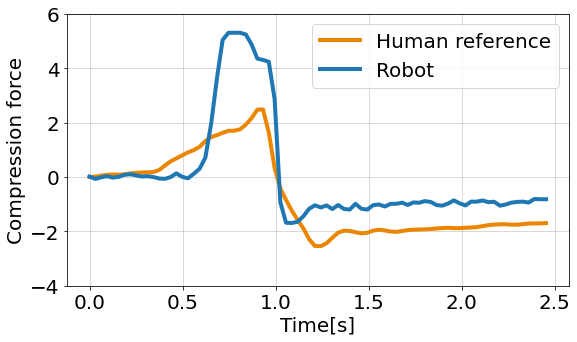

In [794]:
font = 20
new_time = np.array(time[185-int(80/2):185+int(80/2)])-time[185-int(80/2)]
fig, axs = plt.subplots(1)
fig.set_size_inches((size[0]*3,size[1]*2))
axs.plot(new_time, human_refM[185-int(80/2):185+int(80/2)], color=medium_colour, label="Human reference", linewidth=4)
axs.plot(new_time, rasp_robot2, color=robot_lab, label="Robot", linewidth=4)
axs.set_xlabel("Time[s]", fontsize=font)
axs.set_ylabel("Compression force", fontsize=font)
axs.tick_params(axis='both', labelsize=font)
axs.legend(loc="upper right", fontsize=font)
axs.set_ylim([-4,6])
axs.grid(b=True, color='#666666', linestyle='-', alpha = 0.3)
# plt.savefig("pressureSensor_Medium_notOptimal.pdf", format="pdf")

In [795]:
opt_rasp_robotM1 = [-0.001188475715025561, 4.275106221030001e-06, 4.2751103137561586e-06, 4.2751103137561586e-06, 4.2751103137561586e-06, 4.2751103137561586e-06, 4.2751103137561586e-06, 4.2751103137561586e-06, 4.2751103137561586e-06, 4.2751103137561586e-06, 4.2751103137561586e-06, 4.2751103137561586e-06, 4.2751103137561586e-06, 4.2751103137561586e-06, 4.2751103137561586e-06, 4.2751103137561586e-06, 4.2751103137561586e-06, 4.2751103137561586e-06, 4.2751103137561586e-06, 4.2751103137561586e-06, 4.2751103137561586e-06, 4.2751103137561586e-06, 4.2751103137561586e-06, 4.2751103137561586e-06, 4.2751103137561586e-06, 4.27511122325086e-06, 4.423782343110361e-06, 0.0004474599516015587, 0.024201348169754056, 0.02421473058564061, 0.005846705274962005, 0.04034183666362878, 0.02960044421456587, 0.024214731192387262, 0.0004608435816635392, 0.0054035204344700105, 0.03989865182336416, 0.005846556603046338, 0.024214731192387262, 0.024214731199549533, 0.005847751455917205, 0.043566071783857296, 0.25216725154098185, 0.8685380101354667, 1.378468281481446, 2.2537003170713206, 3.014122559198654, 3.411580592993232, 3.867140618952135, 3.998150063551634, 4.000003698171895, 4.000004296508905, 4.000004296512543, 4.000004295904887, 3.9999909134871814, 3.994604748975462, 3.9586719569637125, 3.874254037852893, 3.3077169977541416, 3.013779257439751, 2.8774076913782665]
timeM1 =[1.4059545993804932, 1.5821144580841064, 1.7586169242858887, 1.934126377105713, 2.1098976135253906, 2.286036968231201, 2.462592601776123, 2.6380960941314697, 2.7982282638549805, 2.974189281463623, 3.134868621826172, 3.3098270893096924, 3.4699134826660156, 3.6458985805511475, 3.821913242340088, 3.982091188430786, 4.157809257507324, 4.334185600280762, 4.51070761680603, 4.686617612838745, 4.846391201019287, 5.022674560546875, 5.198176145553589, 5.373681545257568, 5.54989218711853, 5.726408243179321, 5.902211427688599, 6.078359842300415, 6.253905296325684, 6.429734945297241, 6.606478691101074, 6.782446622848511, 6.9574596881866455, 7.134315490722656, 7.294602394104004, 7.470529079437256, 7.646095037460327, 7.82262659072876, 7.998186349868774, 8.173957586288452, 8.35021424293518, 8.52623200416565, 8.685806035995483, 8.862249612808228, 9.038258790969849, 9.197551727294922, 9.88616156578064, 10.062169790267944, 10.238484621047974, 10.413562536239624, 10.590101718902588, 10.765998125076294, 10.942265510559082, 11.1174156665802, 11.284693956375122, 11.453399658203125, 11.597395420074463, 11.758021354675293, 11.933295011520386, 12.109370231628418, 12.285341024398804]

opt_rasp_robotM2 = [-0.001188475715025561, 4.275106221030001e-06, 4.2751103137561586e-06, 4.2751103137561586e-06, 4.2751103137561586e-06, 4.2751103137561586e-06, 4.2751103137561586e-06, 4.2751103137561586e-06, 4.2751103137561586e-06, 4.2751103137561586e-06, 4.2751103137561586e-06, 4.2751103137561586e-06, 4.2751103137561586e-06, 4.2751103137561586e-06, 4.2751103137561586e-06, 4.2751103137561586e-06, 4.2751103137561586e-06, 4.2751103137561586e-06, 4.2751103137561586e-06, 4.2751103137561586e-06, 4.2751103137561586e-06, 4.2751103137561586e-06, 4.2751103137561586e-06, 4.2751103137561586e-06, 4.2751103137561586e-06, 4.2751103137561586e-06, 4.2751103137561586e-06, 4.2751103137561586e-06, 4.2751103137561586e-06, 4.2751103137561586e-06, 4.2751103137561586e-06, 4.2751103137561586e-06, 4.2751103137561586e-06, 4.2751103137561586e-06, 4.2751103137561586e-06, 4.2751103137561586e-06, 4.2751103137561586e-06, 4.2751103137561586e-06, 4.27511122325086e-06, 4.425005613484245e-06, 0.0004755701284011593, 0.039123378793988195, 0.37987841065591965, 0.9043350182345193, 0.9960349520779346, 1.4297387567756914, 2.2980677231769278, 2.9508606782576408, 3.270788274218148, 3.8665566592849245, 3.9142382359094654, 3.9891925654303577, 3.9999775298588247, 4.00000429407487, 3.9999763368296044, 3.985565450517811, 3.684278412814706, 3.215840910653128, 3.0166254117162907, 2.9044199429183664, 1.1141148558004943, -1.7562401005169477, -1.9994397163146687, -1.999995710635062, -1.9999957355909146, -1.9999957355909146, -1.9999957355909146, -1.9999957349813258, -1.9999820430634827, -1.9934411166160544, -1.799172836053799, -0.8568555855393925, -1.2362886483996363, -1.8530162913673394, -1.9527943418282803, -1.9407763285171313, -1.906294733691766, -1.9533728551606373, -1.970372503098588, -1.970386182855691, -1.9596583221019728, -1.9945964890523555, -1.999955585914563, -1.9891841586583041, -1.914808182858451, -1.9493031655762252]
timeM2 = [1.4226741790771484, 1.598860740661621, 1.7749695777893066, 1.9348456859588623, 2.1111643314361572, 2.2868807315826416, 2.44735050201416, 2.622917890548706, 2.7829031944274902, 2.958608865737915, 3.134918212890625, 3.310743808746338, 3.4868438243865967, 3.6628756523132324, 3.822932481765747, 3.998570442199707, 4.174609899520874, 4.350976467132568, 4.5273168087005615, 4.702841520309448, 4.87885308265686, 5.055102586746216, 5.230502605438232, 5.390759468078613, 5.566370487213135, 5.7429282665252686, 5.918787956237793, 6.094876766204834, 6.270150899887085, 6.43128228187561, 6.606174945831299, 6.782590389251709, 6.942968130111694, 7.118133306503296, 7.294816970825195, 7.470053672790527, 7.646945953369141, 7.822486400604248, 7.9985511302948, 8.17429494857788, 8.350903511047363, 8.526906728744507, 8.702145338058472, 8.878644943237305, 9.053959369659424, 9.743032217025757, 9.918418407440186, 10.094065427780151, 10.254514694213867, 10.430827856063843, 10.606547594070435, 10.782761096954346, 10.94202733039856, 11.079766750335693, 11.294193029403687, 11.469829082489014, 11.64614200592041, 11.822077751159668, 11.99790334701538, 12.174722671508789, 12.350191593170166, 12.525944709777832, 12.702081680297852, 12.87870717048645, 13.038177967071533, 13.21449899673462, 13.390127658843994, 13.565979957580566, 13.742658615112305, 13.917762041091919, 14.07785940170288, 14.253758668899536, 14.43028712272644, 14.605817317962646, 14.782013416290283, 14.958123445510864, 15.134159326553345, 15.310084819793701, 15.485554218292236, 15.661782503128052, 15.838366985321045, 16.014084339141846, 16.206587076187134, 16.38162660598755, 16.55837368965149, 16.73395800590515]

opt_rasp_robotM3 = [0.0583265475505641, 0.024498312144714873, -0.10315708926145817, -0.022898982675656043, 0.1603950848509612, 0.19533280517964613, 0.0053273341607109614, -0.16277967712710506, -0.152991864382102, -0.09021629180745094, -0.13048249619214403, 0.05547932218371443, 0.10341704728898549, -0.06243062135570199, -0.0660612738488453, -0.10010980174604356, 0.04462569197391986, 0.0841372514117893, 0.12359840704652925, -0.011281632148325116, 0.03396724766059833, -0.05343520222356801, -0.11171113594468807, -0.006884427185013919, -0.129207946219708, -0.14763633909979035, -0.18795709775952218, -0.11174234768816405, -0.14042108524722607, 0.03480023331508164, 0.10293181099541471, 0.030412289522587344, 0.20294564117466507, 0.24154197245763953, 0.2766044470234874, 0.3702651548276208, 0.4244846320951865, 0.35059570498253834, 0.449151953993578, 0.4308141127714862, 0.4653495419089495, 0.47121993357097836, 0.5157101742294117, 0.9156550213191395, 1.4783052415587008, 1.9070053569655556, 2.4100331547020915, 2.4948639307662006, 2.519585826673506, 2.520029466047845, 2.5210234939881957, 2.6139259846626146, 3.04679950661523, 2.9885777033214254, 2.5965784584180938, 2.7170643810688944, 2.9821906974021886]
timeM3 = [1.4075427055358887, 1.5830531120300293, 1.7596266269683838, 1.9359867572784424, 2.111987352371216, 2.2879183292388916, 2.4639012813568115, 2.6397831439971924, 2.8150994777679443, 2.9919803142547607, 3.167100667953491, 3.3429436683654785, 3.5192155838012695, 3.695833921432495, 3.8550188541412354, 4.030865907669067, 4.207777976989746, 4.383219242095947, 4.559048652648926, 4.7347869873046875, 4.910942554473877, 5.087602853775024, 5.262853622436523, 5.439150333404541, 5.615049839019775, 5.790873765945435, 5.967597484588623, 6.142956495285034, 6.303587436676025, 6.479109287261963, 6.639678955078125, 6.815469980239868, 6.991000413894653, 7.167778491973877, 7.343309640884399, 7.502897500991821, 7.679410934448242, 7.838985919952393, 8.014746189117432, 8.190869569778442, 8.366889715194702, 8.543050527572632, 8.718843698501587, 8.89477252960205, 9.070805788040161, 9.247241020202637, 9.935567855834961, 10.111422061920166, 10.287517070770264, 10.446970462799072, 11.134839534759521, 11.30385446548462, 11.470786094665527, 11.63126802444458, 11.790842294692993, 11.966615915298462, 12.14245080947876]

opt_rasp_robotM4 = [-0.2978479852632745, -0.1332133184311033, -0.1963346853759731, -0.16723864760228935, -0.17306769595745664, -0.2613391191651999, -0.2219618253391218, -0.34961395919935967, -0.22727735631053747, -0.18155125656130622, -0.14790235004284114, -0.2550291439808916, -0.35054585584066444, -0.5482187065147173, -0.5985091327870578, -0.4865519128059077, -0.666268265854228, -0.7133628922609887, -0.6084890496783828, -0.549784207996936, -0.6559840377832415, -0.7106498199813132, -0.7353037570325114, -0.7357473878912515, -0.7366205256533931, -0.7796689555007106, -0.8092816289328084, -0.9230919949286545, -0.7636023273265664, -0.7855498734465982, -0.6623266041387978, -0.6730376620034804, -0.6680848702829962, -0.7285481905319102, -0.6545581539212435, -0.5317884774077584, -0.5815105155500078, -0.6254339855457829, -0.5371317817398449, -0.4263606537223268, -0.2465858792970721, -0.14208638309958133, -0.1352359436267534, -0.07458721796319878, 0.4320248683116006, 1.0906672617705908, 1.7576887998492339, 1.8874290446331088, 1.8911355686955176, 2.0211600701263706, 2.130074744427361, 2.051199683086679, 1.951311354149766, 1.96470934248714, 2.0067911069439788, 1.9431429900770354, 1.8897930826426546, 1.8889068616331315, 1.8943056597262284, 1.9341865047421152, 1.9341865047421152, 1.8943056597244095, 1.8889065636807345, 1.888893180658215, 1.8888931800505588, 1.8888931800505588, 1.8888931800505588, 1.8888931800505588, 1.8888931800514683, 1.8888933287224745, 1.889336364891733, 1.9130902525024567, 1.9130902525025704, 1.889336366107841, 1.8889202446547415, 1.9001613242413669, 2.0036770511650275, 2.0041334703566918, 1.9297708763652963, 1.9584104931263937, 1.9346296914078494, 1.894319340090874, 1.8947488451741492, 1.9529844811512476, 1.918489498433246, 1.8898063157780598, 1.918489498434269, 1.952984629215507, 1.8951786463842382, 1.9131037841970056, 1.9130902531110223, 1.8893363648918466, 1.8888933287225882, 1.8888931800514683, 1.8888931800505588, 1.8888931800505588, 1.8888931800505588, 1.8888931800505588, 1.8888931800505588, 1.8888931800505588, 1.8888931800505588, 1.8888931800505588, 1.8888931800505588, 1.8888931800505588, 1.8888931800505588, 1.8888931800505588, 1.8888931800505588, 1.8888931800505588, 1.8888931800505588, 1.8888931800505588, 1.8888931800505588, 1.8888931800505588, 1.8888931800505588, 1.8888931800505588, 1.8888931800505588, 1.8888931800505588, 1.8888931800505588, 1.8888931800505588, 1.8888931800505588, 1.8888931800505588, 1.8888931800505588, 1.8888931800514683, 1.8888933287224745, 1.889336364891733, 1.9130902525024567, 1.9130902525025704, 1.8893363648918466, 1.8888933287225882, 1.8888931800514683, 1.8888931800505588, 1.8888931800505588, 1.8888931800505588, 1.8888931800505588, 1.8888931800505588, 1.8888931800505588, 1.8888931800505588, 1.8888931800505588, 1.8888931800505588, 1.8888931800514683, 1.8888933299393784, 1.8893634301081192, 1.9248157109565227, 2.0597535780611906, 2.2179794019097017, 2.3318851109604566, 2.282308329854459, 2.734432678260987, 2.744307623400573, 2.3947753104683898, 2.1127731552734303, 2.0929474162028328, 1.9437391761820209, 2.1485694497467875, 2.4053503289765104, 2.353497552228987, 2.34546818154422, 2.3956197272050304, 2.342782603801197, 2.1984032963312075, 2.2288277098668914, 2.206875420702886, 2.201016917969355, 2.233787483301626, 2.309032433642642, 2.205990223706067, 2.2422567706689733, 2.2426422632352114, 2.119003016888996, 2.139112084864337, 2.0261736383166635, 1.979976844277985, 1.8997114235977506]
timeM4 = [1.4078402519226074, 1.5838990211486816, 1.7591052055358887, 1.935960054397583, 2.111262321472168, 2.2871627807617188, 2.463806629180908, 2.639481782913208, 2.7998569011688232, 2.9753386974334717, 3.1518852710723877, 3.3278777599334717, 3.5037853717803955, 3.6793198585510254, 3.855839729309082, 4.031479835510254, 4.207275152206421, 4.38296914100647, 4.558976173400879, 4.735613822937012, 4.910991191864014, 5.087722063064575, 5.263519048690796, 5.4388673305511475, 5.61540675163269, 5.774998664855957, 5.951396703720093, 6.111910581588745, 6.287062883377075, 6.46286416053772, 6.639348030090332, 6.815495729446411, 6.991360425949097, 7.150781869888306, 7.326621770858765, 7.503240585327148, 7.67857813835144, 7.855315208435059, 8.031287908554077, 8.206858158111572, 8.38259744644165, 8.558908224105835, 8.735436201095581, 8.91097092628479, 9.087499380111694, 9.262960195541382, 9.422585248947144, 9.59890365600586, 9.774878740310669, 9.950864315032959, 10.127597332000732, 10.303509712219238, 10.479520797729492, 10.654700994491577, 10.830769777297974, 11.0075843334198, 11.183013916015625, 11.34292459487915, 11.51905107498169, 11.694416522979736, 11.870429754257202, 12.047078609466553, 12.222902774810791, 12.398494243621826, 12.575020551681519, 12.75053858757019, 12.942413330078125, 13.118430614471436, 13.294363498687744, 13.47026538848877, 13.63126802444458, 13.806791543960571, 13.982720851898193, 14.158998727798462, 14.33423113822937, 14.510944843292236, 14.68690037727356, 14.878827810287476, 15.038239240646362, 15.23082709312439, 15.406457662582397, 15.582366228103638, 15.75868821144104, 15.934219121932983, 16.111063480377197, 16.286218881607056, 16.462238550186157, 16.622502326965332, 16.798407554626465, 16.97491955757141, 17.150233268737793, 17.32686758041382, 17.502626419067383, 17.678216695785522, 17.85400938987732, 18.030651330947876, 18.206739902496338, 18.383073091506958, 18.5589542388916, 18.734190464019775, 18.894761085510254, 19.070291757583618, 19.246142864227295, 19.421981811523438, 19.59877324104309, 19.757889986038208, 19.93440055847168, 20.110585689544678, 20.285917043685913, 20.46185612678528, 20.63876509666443, 20.814297914505005, 20.99073886871338, 21.165775299072266, 21.341991424560547, 21.51780128479004, 21.710054397583008, 21.886008739471436, 22.06215238571167, 22.22236728668213, 22.398433208465576, 22.57471537590027, 22.750255346298218, 22.926090002059937, 23.085733890533447, 23.262193202972412, 23.437839031219482, 23.598072052001953, 23.7746102809906, 23.950150728225708, 24.12600612640381, 24.302072048187256, 24.4782497882843, 24.654497623443604, 24.829732179641724, 25.005985975265503, 25.166441679000854, 25.342878103256226, 25.518553018569946, 25.693808555603027, 25.870498418807983, 26.030010223388672, 26.18994140625, 26.350053071975708, 26.51016664505005, 26.670039415359497, 26.83046054840088, 27.005661725997925, 27.150407552719116, 27.309984922409058, 27.470046281814575, 27.630358934402466, 27.789960861206055, 27.950040102005005, 28.109368562698364, 28.269739151000977, 28.43064594268799, 28.59018325805664, 28.749412775039673, 28.90998339653015, 29.58227849006653, 29.7415292263031, 29.885352611541748, 30.045952081680298, 30.206181287765503, 30.349278211593628, 31.029967308044434, 31.197431564331055, 31.35815739631653, 31.517394304275513, 31.693587064743042, 31.86929178237915]

opt_rasp_robotM5 = [-0.05135775448559343, -0.07976102348527547, -0.10890047483542276, -0.10305834262339886, -0.0102707750099853, 0.02962374976391402, -0.05149308450779699, -0.01565619129735296, -0.05556409909456761, -0.10847097157682128, -0.10937042693774401, -0.10937072427907424, -0.10935719319479631, -0.10352844339672629, -0.04527942439642629, -0.0797744058979788, -0.1084440568596392, -0.0739187407763211, 0.024237738792180608, -0.023239851735638695, -0.023686305946739594, -0.0877474211322351, -0.024129043555035423, -0.04608045373083769, 0.08390017716919829, 0.11347032662490619, 0.039522208280004634, 0.13549520613298682, 0.37663245761018516, 0.46898143596956743, 0.5071142294924584, 0.2504172051162641, 0.3463718892913903, 0.47679908716725095, 0.4710413953710031, 0.5656011249552648, 0.545830862348339, 0.4096095450701114, 0.6367773160727666, 0.6013736451567411, 0.6018675369106177, 0.5970125895829597, 0.7955292884020082, 0.893814410859477, 1.1952818297681915, 2.1088473181781637, 2.8356166319365457, 3.1663825672285384, 3.7841200437378575, 3.8896077524711927, 3.8906289930848743, 3.890629296511065, 3.890629296512884, 3.890629296512884, 3.890629296512884, 3.890629296512884, 3.890629296512884, 3.890629296512884, 3.890629296512884, 3.890629296512884, 3.8906292965119746, 3.8906291478409685, 3.89018611167171, 3.8664322240609863, 3.8664322240609863, 3.8901861116715963, 3.8906291478409685, 3.8906292965119746, 3.890629296503789, 3.8906278036707818, 3.886056005180535, 3.5713885634281723, 1.7228749067602394]
timeM5 = [1.390946865081787, 1.566863775253296, 1.7433114051818848, 1.9028770923614502, 2.0785694122314453, 2.2707831859588623, 2.446711301803589, 2.622997522354126, 2.782423973083496, 2.959373712539673, 3.1353349685668945, 3.310812473297119, 3.487259864807129, 3.662727117538452, 3.8386521339416504, 3.9990122318267822, 4.174975395202637, 4.351086139678955, 4.526856422424316, 4.702948331832886, 4.878816366195679, 5.054847478866577, 5.230996131896973, 5.390994071960449, 5.566767930984497, 5.7427895069122314, 5.919174432754517, 6.095253944396973, 6.270785093307495, 6.44631552696228, 6.606285095214844, 6.782203912734985, 6.942703723907471, 7.119147062301636, 7.294426918029785, 7.470691919326782, 7.646321058273315, 7.822453498840332, 7.999079942703247, 8.174713850021362, 8.334120273590088, 8.526259660720825, 8.702104806900024, 8.878102779388428, 9.054181337356567, 9.230611324310303, 9.406629800796509, 9.582642078399658, 9.758055686950684, 9.934666633605957, 10.12632131576538, 10.302907466888428, 10.47855544090271, 10.654565572738647, 10.8303382396698, 10.990781545639038, 11.166199684143066, 11.342262506484985, 11.518298864364624, 11.694616079330444, 11.869882106781006, 12.046384572982788, 12.734317541122437, 13.422566413879395, 13.58203911781311, 13.757785081863403, 13.917794942855835, 14.07794451713562, 14.238560438156128, 14.398418664932251, 14.573860883712769, 14.749723196029663, 14.925661325454712]


In [796]:
max(opt_rasp_robotM1), max(opt_rasp_robotM2), max(opt_rasp_robotM3), max(opt_rasp_robotM4), max(opt_rasp_robotM5)

(4.000004296512543,
 4.00000429407487,
 3.04679950661523,
 2.744307623400573,
 3.890629296512884)

C:\Users\Catarina.LAPTOP-GAR6C5UR\AppData\Local\Temp\ipykernel_6384\3662716915.py:16: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  axs.grid(b=True, color='#666666', linestyle='-', alpha = 0.3)


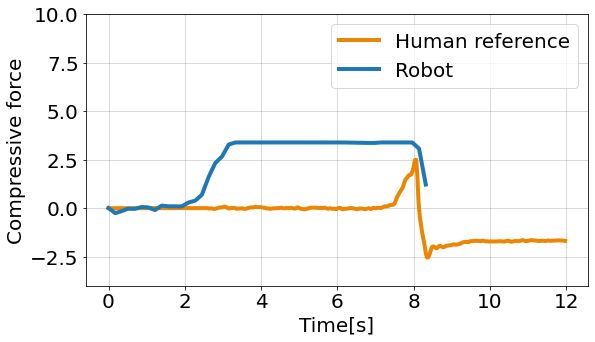

In [797]:
zeros = np.array([0]*80)
new_ref = np.append(zeros, human_refM)
prev_time = np.array(time)-time[0]
new_time = np.append(prev_time, prev_time[0:80]+prev_time[-1])
font = 20
# new_time = np.array(time[185-int(80/2):185+int(80/2)])-time[185-int(80/2)]
fig, axs = plt.subplots(1)
fig.set_size_inches((size[0]*3,size[1]*2))
axs.plot(new_time, new_ref, color=medium_colour, label="Human reference",linewidth=4)
axs.plot(np.array(timeM5[30::])-timeM5[30], np.array(opt_rasp_robotM5[30::])-opt_rasp_robotM5[30], color=robot_lab, label="Robot",linewidth=4)
axs.set_xlabel("Time[s]", fontsize=font)
axs.set_ylabel("Compressive force", fontsize=font)
axs.tick_params(axis='both', labelsize=font)
axs.legend(loc="upper right", fontsize=font)
axs.set_ylim([-4,10])
axs.grid(b=True, color='#666666', linestyle='-', alpha = 0.3)
# plt.savefig("pressureSensor_Medium_Optimal.pdf", format="pdf")

In [798]:
save_csv_data(opt_rasp_robotM5, 'opt_rasp_robotM5')

D:\IST\5 ano\2 semestre\Tese\FIELD EXPERIMENTS\data (1)\Real raspberry trials (1)\Day 2\Harvesting data day 2


### High raspberry

In [799]:
pre_opt_rasp_robotH1 = [0.02152411976271651,  0.03304154567831574, -0.0019100042898116953, 0.0034322915079201266, -0.030633186125555767, 0.011502406552040156, 0.0177740432416158, 0.057198767015165686, 0.028072250242871633, -0.0418174678958394, -0.007379284816352083, -0.07593989566350956, -0.03383121648755605, -0.004279058684005577, -0.08711079198144489, -0.025720693360767655, 0.014203718766452766, 0.0621946780096323, 0.06308090023435398, 0.06306781455464261, 0.05766871851187716, 0.017787724823506323, 0.017344688046364354, 0.033458263037346114, 0.033471496781544374, 0.022300599856635017, 0.03348488041331166, 0.03887104249463391, 0.06357940732527823, 0.1376403988125503, 0.5767000328253289, 1.3995333433210817, 2.6690857985959155, 3.468249980793985, 4.030201955554503, 4.373812965814523, 4.945830878881111, 5.057117003439316, 5.063067687767671, 5.063081224331995, 5.063081373611681, 5.0635244116035665, 5.087318446459221, 5.103475587345542, 5.18320709390116, 5.07927866356556, 5.063121374008233, 5.063081226762392, 5.063081223721724, 5.063054006784569, 5.050816655166159, 4.847436440661795, 3.907432156639402, 1.5237909787397257, -0.7611361348706396, -1.2519622304513405, -2.2339838875102487]
timeH1 = [1.402116298675537, 1.5617449283599854, 1.7383599281311035, 1.9141690731048584, 2.0903513431549072, 2.2659335136413574, 2.4419748783111572, 2.61801815032959, 2.7774667739868164, 2.953374147415161, 3.130098819732666, 3.3059630393981934, 3.4818427562713623, 3.6581783294677734, 3.8341073989868164, 4.009640216827393, 4.186152935028076, 4.361778736114502, 4.553447723388672, 4.729926824569702, 4.906030893325806, 5.0659098625183105, 5.241234064102173, 5.417209625244141, 5.594210147857666, 5.770191431045532, 5.945987224578857, 6.1219799518585205, 6.297266721725464, 6.458179235458374, 6.633690357208252, 6.810200452804565, 7.001117467880249, 7.177594900131226, 7.3379106521606445, 7.513898849487305, 7.673289060592651, 8.3456392288208, 8.521473407745361, 8.68177342414856, 8.857679843902588, 9.033564567565918, 9.19361686706543, 9.369700908660889, 9.545760154724121, 9.72186803817749, 9.882630109786987, 10.058124542236328, 10.217307329177856, 10.393738985061646, 10.569519281387329, 10.745662927627563, 10.921226024627686, 11.097870349884033, 11.27400255203247, 11.449067115783691, 11.625456094741821]

pre_opt_rasp_robotH2 = [0.013636330598615132, -0.05679341402230875, -0.07293405057544078, -0.05013568825825132, -0.02678097357943443, 0.03195108016609538, 0.01939857273009693, 0.048534753499325234, 0.008200909762877018, 0.03235084960772383, -0.09485795134833097, 0.06733287857991854, 0.10764679600345062, 0.05702173457132176, -0.04560776891150908, 0.04132458080846391, 0.12152945386014835, 0.06955207093892568, 0.09955991822562282, -0.02860914984705687, -0.12362455223012603, 0.003201430844001152, 0.08481795285899807, 0.014482658887231992, -0.004341635118976228, 0.07183267097832413, 0.004628536062682542, 0.08898253758991359, 0.3069837994594309, 0.9409749307725406, 1.6710777718540157, 2.8097733779226246, 3.593155201036325, 4.175182946256427, 4.291049326100733, 4.591991172632106, 5.063068143302075, 4.94394487409329, 4.827494870756254, 4.8539800005213465, 5.147466740780487, 5.106232660787441, 5.054367267381622, 3.739726161027079, 1.7523291700109667, -0.4533871382234338, -1.4894287879142212, -1.8950252451069218, -3.135035624089255]
timeH2 = [1.3921470642089844, 1.5684919357299805, 1.7437870502471924, 1.919942855834961, 2.0955989360809326, 2.271669626235962, 2.4476394653320312, 2.6236789226531982, 2.7996666431427, 2.975404977798462, 3.152167320251465, 3.3273072242736816, 3.5037801265716553, 3.67993426322937, 3.856034517288208, 4.032075881958008, 4.191904544830322, 4.367392539978027, 4.543708801269531, 4.7200071811676025, 4.89508056640625, 5.071632146835327, 5.2477381229400635, 5.4083092212677, 5.583611249923706, 5.7597150802612305, 5.935251474380493, 6.111470699310303, 6.28796648979187, 6.975938081741333, 7.151663303375244, 7.327184677124023, 7.5032570362091064, 7.679319858551025, 7.855581760406494, 8.01563286781311, 8.19165301322937, 8.351527452468872, 8.517630815505981, 8.687415838241577, 8.831658840179443, 8.991683959960938, 9.167217016220093, 9.343962907791138, 9.51964020729065, 9.69529128074646, 9.871665239334106, 10.047022342681885, 10.239522218704224]

pre_opt_rasp_robotH3 = [-0.010413669969693728, -0.14990324430800683, -0.06251477152363805, 0.02534320309382565, -0.02257712929895206, -0.03565995518215459, -0.1320182561656793, -0.16879857710318902, -0.08012486026484567, -0.07108171566494548, -0.08094034347357137, -0.130163165176441, -0.1063960438216327, -0.0517875066709621, -0.054915055201604446, -0.08945315779703833, -0.15939864852441588, -0.05898430120066678, 0.05170164000128352, -0.07155390643583814, -0.16558686881000995, -0.03920436730857091, 0.016360250879415617, -0.12385137881256014, -0.10592579255160217, -0.022150292207811617, 0.028113840546552638, 0.2164437041860765, 0.4465123451003592, 0.9317553900895064, 1.7863794014950827, 2.844461577027573, 3.799960030180614, 4.414271428892903, 4.465199989073426, 4.665309742057957, 4.976770062215678, 4.871027975409788, 4.763095741127813, 4.822160074845897, 4.666637806746053, 4.7769410744642755, 5.0829101085597586, 4.637362669788104, 3.9298199396436075, 2.117997057869843, -0.6816079614785622, -1.2135198389578363, -1.8976993421051702]
timeH3 = [1.407435655593872, 1.5831067562103271, 1.7592582702636719, 1.9353504180908203, 2.1117143630981445, 2.271913528442383, 2.447152614593506, 2.6239864826202393, 2.7995376586914062, 2.9754035472869873, 3.151529312133789, 3.3276777267456055, 3.5034329891204834, 3.6792731285095215, 3.85583233833313, 4.031810522079468, 4.207716464996338, 4.367620468139648, 4.54343318939209, 4.7193052768707275, 4.8956522941589355, 5.071102619171143, 5.247132778167725, 5.422861814498901, 5.598972797393799, 5.775394439697266, 5.951235294342041, 6.127610921859741, 6.303354024887085, 6.479208946228027, 7.1667304039001465, 7.343320369720459, 7.519136905670166, 7.695689916610718, 7.870835304260254, 8.031383752822876, 8.206647157669067, 8.383209466934204, 8.559488534927368, 8.722970485687256, 8.89503002166748, 9.054632663726807, 9.215379238128662, 9.391184091567993, 9.566461086273193, 9.742661237716675, 9.919347524642944, 10.094770908355713, 10.270699501037598]

pre_opt_rasp_robotH4 = [-0.5684918474212282,  -0.7064199205282193, -0.7449828378929624, -0.7647109009820952, -0.8637406657693418, -0.874968809564507, -0.8749958723459486, -0.8754389097312014, -0.8991927973447673, -0.8991932439664652, -0.8767819971657218, -0.9534562883443414, -1.022946684272597, -1.0215916905308404, -1.039114237977401, -0.9759658112867555, -1.0794512072749285, -1.0553113792601607, -1.0373860915623254, -1.1188757817718624, -0.9705800976590808, -0.9651812995639375, -1.0744820611142814, -1.0454295904472701, -1.1090607557532621, -1.0557139696162494, -1.014458806896414, -0.8821385401615771, -0.5699252627646274, 0.3715436680095081, 1.3714068587458996, 2.3668402867268696, 3.068204911695716, 3.272990027053538, 3.762984818657742, 3.8604455711657693, 4.101620894753523, 4.124950173864022, 4.124990916406205, 4.119605205211542, 4.085110073822648, 4.119605205211428, 4.124990918817275, 4.125000547942591, 4.113112147954325, 3.166954430663054, -0.7781048279492779, -2.255990819033059, -2.822329232245238]
timeH4 = [1.3983566761016846, 1.5747039318084717, 1.7510249614715576, 1.9269435405731201, 2.1023526191711426, 2.2789576053619385, 2.455158233642578, 2.630383014678955, 2.8065221309661865, 2.966364622116089, 3.1423566341400146, 3.318544864654541, 3.4947547912597656, 3.6699106693267822, 3.830897808074951, 4.006190776824951, 4.182356834411621, 4.3584983348846436, 4.534065246582031, 4.710630178451538, 4.886687755584717, 5.062749862670898, 5.238558530807495, 5.414546489715576, 5.5907464027404785, 5.749768972396851, 5.9257636070251465, 6.102216005325317, 6.278162240982056, 6.454016208648682, 6.630593776702881, 6.806602478027344, 6.982326984405518, 7.158141136169434, 7.318496465682983, 7.990156888961792, 8.678697347640991, 8.838077068328857, 9.013613939285278, 9.173118591308594, 9.334414720535278, 9.494624137878418, 9.6541428565979, 9.830298662185669, 10.006776571273804, 10.181959629058838, 10.358121395111084, 10.534301042556763, 10.710368633270264]

pre_opt_rasp_robotH5 = [-0.5136517942040655,  -0.4339451349230785, -0.48593634748522163, -0.4684811636005861, -0.5093723885681811, -0.7173599469217606, -0.8611857266031393, -0.6873338273261425, -0.425582913553626, -0.4232129430547502, -0.32908540749428994, -0.2941301397024745, -0.29950232224337014, -0.36313705426323395, -0.3635934728464463, -0.3290983414575521, -0.35775134124116903, -0.29950217296277515, -0.29905913618506474, -0.33354073648797566, -0.29904560449062956, -0.29365989146947413, -0.29365989146936045, -0.299045605098172, -0.33355411890192954, -0.30444470114196065, -0.3335541164587994, -0.29898997942143524, -0.26558677578191237, 0.3264146608075862, 1.7874962451586498, 3.1371025867662183, 4.317702468101061, 5.03175924947152, 5.653166368520033, 5.706231583033059, 5.706353518786727, 5.706353524267797, 5.706354120774677, 5.708166412696642, 5.819339103409106, 5.922809622346904, 5.714354299834554, 5.356829364512805, 4.1354836568534665, 1.262389268316042, -2.7001797468377617]
timeH5 = [1.407447338104248, 1.5997068881988525, 1.7758989334106445, 1.9520583152770996, 2.1278135776519775, 2.3034422397613525, 2.4800007343292236, 2.655531883239746, 2.8316471576690674, 3.0077412128448486, 3.18369197845459, 3.360368013381958, 3.535581111907959, 3.7118659019470215, 3.8880250453948975, 4.048046350479126, 4.22375750541687, 4.400109052658081, 4.575638771057129, 4.751790761947632, 4.927145481109619, 5.1038267612457275, 5.279772996902466, 5.455318450927734, 5.6317737102508545, 5.791247606277466, 5.967533826828003, 6.143868923187256, 6.319056987762451, 6.4956958293914795, 6.671331167221069, 6.847987413406372, 7.02365517616272, 7.183082342147827, 7.8558127880096436, 8.527012825012207, 8.703396081924438, 8.863404512405396, 8.998847961425781, 9.199201583862305, 9.35989236831665, 9.519323110580444, 9.711676359176636, 9.888283729553223, 10.06306505203247, 10.239223957061768, 10.431762218475342]


In [800]:
human_refH = [ 0.04823275,  0.049257  ,  0.044201  ,  0.03883725,  0.035688  ,
        0.04466825,  0.05293575,  0.0507175 ,  0.047008  ,  0.05093225,
        0.055417  ,  0.054178  ,  0.0448865 ,  0.03704125,  0.04488975,
        0.0542855 ,  0.056656  ,  0.05563175,  0.050939  ,  0.04701475,
        0.050939  ,  0.0556385 ,  0.05687425,  0.056871  ,  0.0555245 ,
        0.04947525,  0.039505  ,  0.0335665 ,  0.0335665 ,  0.039505  ,
        0.04947175,  0.0554105 ,  0.05541375,  0.049586  ,  0.04096225,
        0.04085475,  0.0482395 ,  0.04947525,  0.04679   ,  0.049586  ,
        0.04958925,  0.046904  ,  0.05093575,  0.0556385 ,  0.0568775 ,
        0.056985  ,  0.05698825,  0.05698825,  0.05698825,  0.05698825,
        0.05698825,  0.056985  ,  0.05687425,  0.05552775,  0.04958925,
        0.0409655 ,  0.0409655 ,  0.04958925,  0.05552775,  0.05687425,
        0.056985  ,  0.05698825,  0.05698825,  0.05698825,  0.05698825,
        0.05698825,  0.05698825,  0.05698825,  0.05698825,  0.05698825,
        0.05698825,  0.05698825,  0.05698825,  0.056985  ,  0.0568775 ,
        0.0556385 ,  0.050939  ,  0.04701475,  0.050939  ,  0.05563525,
        0.05676675,  0.05563525,  0.050939  ,  0.0470115 ,  0.05082825,
        0.05428875,  0.05082825,  0.0470115 ,  0.05093575,  0.05552775,
        0.05552775,  0.05093575,  0.04701475,  0.050939  ,  0.05563525,
        0.05676675,  0.05563525,  0.050939  ,  0.04701475,  0.050939  ,
        0.0556385 ,  0.0568775 ,  0.056985  ,  0.056985  ,  0.0568775 ,
        0.0556385 ,  0.050939  ,  0.04701475,  0.050939  ,  0.0556385 ,
        0.05687425,  0.05687425,  0.0556385 ,  0.050939  ,  0.04701475,
        0.050939  ,  0.0556385 ,  0.0568775 ,  0.056985  ,  0.05698825,
        0.05698825,  0.05698825,  0.05698825,  0.05698825,  0.05698825,
        0.05699175,  0.057116  ,  0.05891575,  0.0705925 ,  0.10768775,
        0.16854025,  0.227489  ,  0.2713195 ,  0.299405  ,  0.3237175 ,
        0.37415125,  0.49862425,  0.68099475,  0.826025  ,  0.95185275,
        1.077625  ,  1.2162145 ,  1.403965  ,  1.5969375 ,  1.7375415 ,
        1.81278975,  1.8841995 ,  2.001431  ,  2.1572205 ,  2.3757385 ,
        2.6365565 ,  2.853316  ,  3.0310365 ,  3.15510575,  3.23658075,
        3.34450425,  3.4647705 ,  3.52690525,  3.51462   ,  3.512697  ,
        3.62483725,  3.79576975,  3.8920815 ,  3.9065645 ,  3.9267325 ,
        4.01006075,  4.0935405 ,  4.1966865 ,  4.31522125,  4.3639285 ,
        4.3791515 ,  4.4456355 ,  4.60232525,  4.80655075,  4.952057  ,
        4.82647175,  3.955808  ,  2.609946  ,  1.93971975,  1.68301   ,
        1.13662625,  0.355992  , -0.36262525, -0.8943275 , -1.275225  ,
       -1.55593025, -1.738118  , -1.85040375, -1.893576  , -1.8927655 ,
       -1.8837965 , -1.8684855 , -1.874535  , -1.901196  , -1.917212  ,
       -1.93023125, -1.93748825, -1.92933825, -1.91689775, -1.91958975,
       -1.92821375, -1.93146675, -1.936845  , -1.941652  , -1.94267925,
       -1.940302  , -1.93068475, -1.92014025, -1.916001  , -1.9068025 ,
       -1.903231  , -1.9107135 , -1.9163295 , -1.91508075, -1.9043385 ,
       -1.88931875, -1.883945  , -1.8904405 , -1.9075775 , -1.91160575,
       -1.8963755 , -1.8897695 , -1.89188675, -1.8929075 , -1.8930085 ,
       -1.89301475, -1.89311575, -1.89413325, -1.89613675, -1.88807975,
       -1.865773  , -1.85750575, -1.8730535 , -1.88807625, -1.888745  ,
       -1.8927765 , -1.8941155 , -1.88000625, -1.8634265 , -1.85232475,
       -1.85334875, -1.86676925, -1.877757  , -1.8784245 , -1.8705725 ,
       -1.851764  , -1.8392015 , -1.83494825, -1.82629675, -1.82430325,
       -1.81878625, -1.8001995 , -1.78744425, -1.81296275, -1.844471  ,
       -1.8430915 , -1.8424825 , -1.85226225, -1.8569365 , -1.84185225,
       -1.82521   , -1.8090315 , -1.80569775, -1.80184025, -1.78842575,
       -1.7753965 , -1.74874575, -1.72353225, -1.73518075, -1.76093375,
       -1.76609025, -1.74569125, -1.73160175, -1.7373915 , -1.73215525,
       -1.73090625, -1.7474895 , -1.741094  , -1.73081625, -1.7372745 ,
       -1.7472745 , -1.7487145 , -1.7296705 , -1.70973775, -1.720936  ,
       -1.7414295 , -1.7399795 , -1.728218  , -1.72709925, -1.73572325,
       -1.74279   , -1.7475905 , -1.746711  , -1.73638775, -1.72620325,
       -1.7214765 , -1.726189  , -1.714962  , -1.676992  , -1.64774675]

C:\Users\Catarina.LAPTOP-GAR6C5UR\AppData\Local\Temp\ipykernel_6384\4157705756.py:16: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  axs.grid(b=True, color='#666666', linestyle='-', alpha = 0.3)


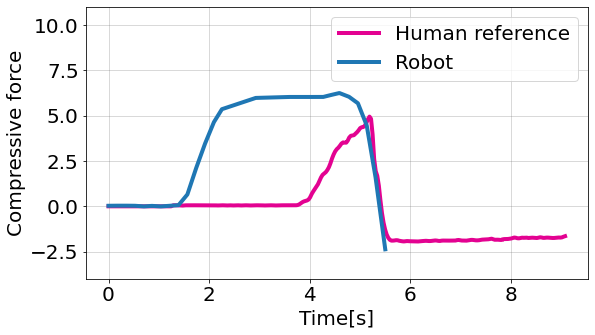

In [801]:

zeros = np.array([0]*40)
new_ref = np.append(zeros, human_refH[50::])
prev_time = np.array(time[50::])-time[50::][0]
new_time = np.append(prev_time, prev_time[0:40]+prev_time[-1])
font = 20
# new_time = np.array(time[185-int(80/2):185+int(80/2)])-time[185-int(80/2)]
fig, axs = plt.subplots(1)
fig.set_size_inches((size[0]*3,size[1]*2))
axs.plot(new_time, new_ref, color=high_colour, label="Human reference",linewidth=4)
axs.plot(np.array(timeH5[20::])-timeH5[20::][0], np.array(pre_opt_rasp_robotH5[20::])-pre_opt_rasp_robotH5[10::][0], color=robot_lab, label="Robot",linewidth=4)
axs.set_xlabel("Time[s]", fontsize=font)
axs.set_ylabel("Compressive force", fontsize=font)
axs.tick_params(axis='both', labelsize=font)
axs.legend(loc="upper right", fontsize=font)
axs.set_ylim([-4,11])
axs.grid(b=True, color='#666666', linestyle='-', alpha = 0.3)
# plt.savefig("pressureSensor_High_notOptimal.pdf", format="pdf")

In [802]:
save_csv_data(human_refH, 'human_refH')
save_csv_data(timeH5, 'timeH5')
save_csv_data(pre_opt_rasp_robotH5, 'pre_opt_rasp_robotH5')

D:\IST\5 ano\2 semestre\Tese\FIELD EXPERIMENTS\data (1)\Real raspberry trials (1)\Day 2\Harvesting data day 2
D:\IST\5 ano\2 semestre\Tese\FIELD EXPERIMENTS\data (1)\Real raspberry trials (1)\Day 2\Harvesting data day 2
D:\IST\5 ano\2 semestre\Tese\FIELD EXPERIMENTS\data (1)\Real raspberry trials (1)\Day 2\Harvesting data day 2


In [803]:
opt_rasp_robotH1 = [ -0.5538467399344427, -0.5538418840905024, -0.5538418840864097, -0.5538418840855002, -0.5538417354143803, -0.5533986992452355, -0.5296448110269694, -0.5296314280108163, -0.5479872645328214, -0.5117451339972376, -0.7180459251366074, -1.1648865508294648, -1.2685438181908921, -1.2318871848963227, -1.0605687267584472, -0.7871066320167301, -0.6436245728793892, -0.6081187611521273, -0.5946226323046631, -0.5592411294105659, -0.5534120822696877, -0.529644812242168, -0.5296448116345118, -0.5533986992452355, -0.553841735414494, -0.5538418840855002, -0.5538418840864097, -0.5538418840864097, -0.5538418840864097, -0.5538418840855002, -0.5538417311520334, -0.5533035252661875, -0.4872812753586686, 0.05839311313684448, 0.9830690890076994, 2.5857032956178045, 3.6901425460666815, 4.5884065340291045, 5.115402323392573, 5.417698527520997, 5.448373917466029, 5.595025360782529, 5.815022178403524, 5.529162797037429, 5.487006850227999, 5.4528870989615825, 5.518747872561903, 5.50878175372668, 5.102936140921429, 4.2091482525542006, 2.5665259199528236, -0.2622688589192421, -1.512635581846439, -2.058934375624858, -1.0780723453618748]
timeH1 =[1.4219496250152588, 1.598475694656372, 1.789963960647583, 1.9654324054718018, 2.12561297416687, 2.302319288253784, 2.4783036708831787, 2.6382625102996826, 2.813793897628784, 2.9893264770507812, 3.1498963832855225, 3.325631618499756, 3.501594305038452, 3.678266763687134, 3.854314088821411, 4.0295751094818115, 4.205312967300415, 4.381542444229126, 4.558196544647217, 4.734096527099609, 4.909775495529175, 5.0700318813323975, 5.246171236038208, 5.422028541564941, 5.597175121307373, 5.773710012435913, 5.9492411613464355, 6.12511134147644, 6.3016016483306885, 6.477970838546753, 6.65328574180603, 6.829633712768555, 7.006087779998779, 7.181508779525757, 7.341947555541992, 8.03001880645752, 8.206002235412598, 8.382001638412476, 8.557585954666138, 8.733753442764282, 8.909957885742188, 9.085088968276978, 9.261980295181274, 9.437488079071045, 9.613279819488525, 9.776585817337036, 9.965004444122314, 10.1257483959198, 10.301279544830322, 10.476810932159424, 10.653339147567749, 10.829555749893188, 11.021203517913818, 11.19765830039978, 11.3734769821167]

opt_rasp_robotH2 = [ -8.216400749461172e-05, -0.0013618206835417368, 0.12633373344203847, 0.06948342396594853, -0.012133543458162421, -0.013090243863075557, -0.09459404558958795, -0.10136538427752839, -0.06729618943609239, -0.01929170032383354, -0.006748572581727785, 0.10799085121971075, -0.05108566634407907, -0.10399551024465836, -0.07216808893849702, 0.08866719028151238, 0.08462753550259094, 0.0541858867160272, -0.036356787268346125, -0.031458568945708976, -0.036801741909812336, -0.14167603050782418, -0.14927262856315338, 0.059126902888237964, 0.007579175545856742, -0.07219886893483363, -0.1232909067895207, -0.054314027642817564, -0.06685345243147367, -0.0435152390410849, -0.041688966370770686, 0.05338486104449203, 0.3331168350300686, 0.38538937224791425, 1.001145288703924, 2.4455194892190093, 3.6005890410291386, 4.574564949373325, 5.2740368392592245, 5.356348864830011, 5.356927224029505, 5.356927378785599, 5.356927378786509, 5.356927378786509, 5.356927378786509, 5.356927378794808, 5.356928722919179, 5.361051365385833, 5.633258871463568, 6.273285506093998, 6.307054681302816, 6.2538518256505995, 6.214208471716461, 5.905351149467947, 3.655017860718317, -0.6197493916922667, -1.8490304510260103, -1.706474715826289]
timeH2 = [1.4082393646240234, 1.583759069442749, 1.7598605155944824, 1.9197659492492676, 2.0962817668914795, 2.2720658779144287, 2.448014259338379, 2.6240737438201904, 2.799875259399414, 2.9760773181915283, 3.1521456241607666, 3.3278653621673584, 3.4875264167785645, 3.6642377376556396, 3.840317487716675, 4.015490770339966, 4.191544771194458, 4.3680853843688965, 4.543595314025879, 4.719613790512085, 4.895799875259399, 5.072216749191284, 5.231496810913086, 5.408271074295044, 5.584282875061035, 5.760268449783325, 5.935920476913452, 6.112233400344849, 6.287763595581055, 6.463902950286865, 6.640064716339111, 6.815597295761108, 6.992124319076538, 7.167656660079956, 7.344184398651123, 7.519717454910278, 7.695345163345337, 7.871874809265137, 8.0484037399292, 8.207995653152466, 8.383525371551514, 8.560038328170776, 8.703651428222656, 9.375703573226929, 9.519439697265625, 9.680010795593262, 10.367684125900269, 10.54321551322937, 10.701790809631348, 10.86439299583435, 11.02298903465271, 11.199517250061035, 11.375049829483032, 11.567550659179688, 11.744062662124634, 11.919102191925049, 12.095664024353027, 12.271201610565186]

opt_rasp_robotH3 = [ -0.006154432242169605, -0.006149576398229328, -0.006149576394136602, -0.006149576394136602, -0.006149576394136602, -0.006149576394136602, -0.006149576394136602, -0.006149576394136602, -0.006149576394136602, -0.006149576394136602, -0.006149575785684647, -0.0061360440920452675, -0.00029390883844371274, 0.06340818248816049, 0.09167968817610017, 0.27851063097784845, 0.21183206599448567, 0.15940837753691994, 0.22520458799704102, 0.18443737086943202, 0.0647945378661916, 0.08846486100594575, 0.08888098185309445, 0.07771038044768375, 0.08933769778127498, 0.11849097817116672, 0.1480737648583954, 0.17808249052291103, 0.13737252087219076, 0.16378475131705272, 0.1521291756653227, 0.18142077033633086, 0.5749982280980248, 0.9498856483746749, 1.6388469624431536, 3.187229144433104, 4.235618930775445, 4.9613071528353885, 5.448421799227162, 5.916994470233931, 5.988369568117946, 5.993837069031997, 5.993850455101665, 5.993850455709321, 5.993850450231889, 5.9937285120377055, 5.940608124575647, 5.2926092707197085, 4.104295693440008, 2.149567949844368, -0.4592872603795968, -1.2797143590680662, -2.4016212960972325]
timeH3 = [1.439178228378296, 1.6152150630950928, 1.7916686534881592, 1.9667799472808838, 2.1269752979278564, 2.30350661277771, 2.479038953781128, 2.6555655002593994, 2.8310964107513428, 3.0066282749176025, 3.183582305908203, 3.359113931655884, 3.53564190864563, 3.71120285987854, 3.8867335319519043, 4.047332525253296, 4.222836971282959, 4.399364948272705, 4.574895858764648, 4.751137018203735, 4.926669120788574, 5.102855205535889, 5.279381275177002, 5.438954830169678, 5.614485740661621, 5.791013479232788, 5.96654486656189, 6.143072605133057, 6.318643808364868, 6.495216369628906, 6.670748233795166, 6.847277879714966, 7.022806644439697, 7.1823811531066895, 7.855275392532349, 8.031266689300537, 8.207294225692749, 8.383122205734253, 8.558355569839478, 8.734885454177856, 8.910415887832642, 9.086944103240967, 9.263106346130371, 9.430681228637695, 9.59826946258545, 9.758351564407349, 9.918923139572144, 10.094453573226929, 10.271016836166382, 10.446513891220093, 10.623041868209839, 10.798515319824219, 10.974588394165039]

opt_rasp_robotH4 = [ -0.06935044945214486, -0.016854981512096856, -0.02084125468968523, 0.07817512949998218, 0.10777114811025967, 0.07281959813803951, 0.04319339544269951, -0.08450245480491958, 0.0023994116606900207, 0.008161101319274167, -0.04783658988742445, -0.1459500976372965, 0.025196450192652264, -0.09351247223014525, -0.0692920548146958, -0.0029965618633696067, 0.039994767961843536, -0.10566636734267831, -0.04971951230334071, -0.258961699474753, -0.19977307786984966, 0.04986689217844287, 0.10774393544352279, 0.08898700134636783, 0.06524649797790971, 0.0889870031717237, 0.10778453234900098, 0.06743373705103295, 0.008254781261371136, -0.07510414735691029, -0.07017827096069595, -0.06924848039602693, 0.0778147817907211, 0.1721689347955362, 0.8699005451876474, 2.23182775553812, 3.3061417176169243, 4.063140277487605, 4.405077565455372, 4.9829341969490315, 5.07185176221833, 5.083573653349276, 5.053104947860561, 4.935263971711493, 4.945061894458036, 4.875547852576915, 4.866517657416921, 4.694898336561096, 4.79977023356048, 5.065993875721347, 5.113141861534132, 5.109041800984642, 4.787597825919761, 3.0711369130515322, -0.5737760824492852, -2.9974866883094364]
timeH4 = [1.4231042861938477, 1.5836799144744873, 1.7592048645019531, 1.934734582901001, 2.0952868461608887, 2.2708184719085693, 2.4473490715026855, 2.6069207191467285, 2.7834489345550537, 2.9589803218841553, 3.1355082988739014, 3.3110384941101074, 3.4713118076324463, 3.646848440170288, 3.823395013809204, 3.9829697608947754, 4.158500671386719, 4.335029602050781, 4.51056694984436, 4.686604261398315, 4.847175121307373, 5.022708892822266, 5.1992433071136475, 5.375310182571411, 5.550841331481934, 5.711414813995361, 5.886941909790039, 6.0624775886535645, 6.23900294303894, 6.414557933807373, 6.590625286102295, 6.76672101020813, 6.927370071411133, 7.102901220321655, 7.279428005218506, 7.454959392547607, 7.630492448806763, 7.791074991226196, 7.966624975204468, 8.143165349960327, 8.318393468856812, 8.494921922683716, 8.654496192932129, 9.343261480331421, 10.01448106765747, 10.19101595878601, 10.366542100906372, 10.522125244140625, 10.686688423156738, 10.846260786056519, 11.006361961364746, 11.18289065361023, 11.37448263168335, 11.550362825393677, 11.726888656616211, 11.902420043945312]

opt_rasp_robotH5 = [ -0.15063667836727745, -0.052505520349200197, -0.1452058056754595, -0.08067503694098832, -0.0170365871051672, 0.01298581588844172, -0.05556111155601684, -0.002684572441239652, 0.0076301376739138504, -0.006282110193524204, -0.09994296180423135, -0.17564804671849288, -0.12953898163550548, -0.07037460371054749, -0.0018386664734180158, -0.23093871934963772, -0.6310717238208099, -0.2990182157536765, -0.057972590126382784, -0.35151957147672874, -0.6083585723065426, -0.7469819632495955, -0.9093278856458937, -0.9219251407783986, -0.9457063903345215, -0.9461494277226166, -0.9461495763936227, -0.9461495763945322, -0.9461495763936227, -0.9461494277131806, -0.9457048987404733, -0.9173839883577557, -0.6172980085198105, 0.27718633267477344, 1.3439976709502162, 2.710551164868434, 3.6845801617256484, 4.192889814151499, 4.765335589532469, 4.813849571992023, 4.7712477970389955, 4.4889553424397945, 4.4876269630376555, 4.867221205618762, 4.954308032175504, 4.954831813101805, 4.925236242932215, 4.862029819931081, 4.900028490205386, 4.655063377974898, 3.850373301313539, 2.65361234150123, 1.5050903276253393, -0.3906658442117532, -2.3625575997922397]
timeH5 = [1.4235475063323975, 1.6160333156585693, 1.7915701866149902, 1.9511384963989258, 2.1276652812957764, 2.3031976222991943, 2.4637696743011475, 2.639299154281616, 2.8158276081085205, 2.9913575649261475, 3.1678876876831055, 3.327462911605835, 3.50299072265625, 3.67988920211792, 3.8554210662841797, 4.047906875610352, 4.207480192184448, 4.383009910583496, 4.5595433712005615, 4.73521614074707, 4.911447048187256, 5.087008476257324, 5.263508081436157, 5.4395434856414795, 5.615073919296265, 5.7916038036346436, 5.967132806777954, 6.1426918506622314, 6.31920599937439, 6.4954993724823, 6.671579837799072, 6.846861362457275, 7.023390531539917, 7.182963848114014, 7.359492063522339, 7.535022974014282, 7.711553335189819, 8.399337530136108, 8.574869155883789, 8.751395463943481, 8.926958322525024, 9.103455781936646, 9.262550115585327, 9.43864130973816, 9.615177869796753, 9.790737390518188, 9.923407554626465, 10.111391067504883, 10.270964622497559, 10.430538654327393, 10.607068300247192, 10.782621622085571, 10.95930790901184, 11.13538146018982, 11.310473680496216]


In [804]:
max(opt_rasp_robotH1), max(opt_rasp_robotH2), max(opt_rasp_robotH3), max(opt_rasp_robotH4), max(opt_rasp_robotH5)

(5.815022178403524,
 6.307054681302816,
 5.993850455709321,
 5.113141861534132,
 4.954831813101805)

C:\Users\Catarina.LAPTOP-GAR6C5UR\AppData\Local\Temp\ipykernel_6384\2705213704.py:16: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  axs.grid(b=True, color='#666666', linestyle='-', alpha = 0.3)


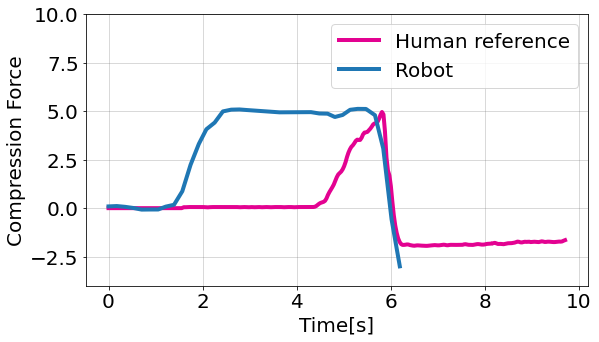

In [805]:
zeros = np.array([0]*50)
new_ref = np.append(zeros, human_refH[40::])
prev_time = np.array(time[40::])-time[40::][0]
new_time = np.append(prev_time, prev_time[0:50]+prev_time[-1])
font = 20
# new_time = np.array(time[185-int(80/2):185+int(80/2)])-time[185-int(80/2)]
fig, axs = plt.subplots(1)
fig.set_size_inches((size[0]*3,size[1]*2))
axs.plot(new_time, new_ref, color=high_colour, label="Human reference",linewidth=4)
axs.plot(np.array(timeH4[25::])-timeH4[25::][0], opt_rasp_robotH4[25::], color=robot_lab, label="Robot",linewidth=4)
axs.set_xlabel("Time[s]", fontsize=font)
axs.set_ylabel("Compression Force", fontsize=font)
axs.tick_params(axis='both', labelsize=font)
axs.legend(loc="upper right", fontsize=font)
axs.set_ylim([-4,10])
axs.grid(b=True, color='#666666', linestyle='-', alpha = 0.3)
plt.savefig("pressureSensor_High_Optimal.pdf", format="pdf")

In [806]:
save_csv_data(timeH4, 'timeH4')
save_csv_data(opt_rasp_robotH4, 'opt_rasp_robotH4')

D:\IST\5 ano\2 semestre\Tese\FIELD EXPERIMENTS\data (1)\Real raspberry trials (1)\Day 2\Harvesting data day 2
D:\IST\5 ano\2 semestre\Tese\FIELD EXPERIMENTS\data (1)\Real raspberry trials (1)\Day 2\Harvesting data day 2


In [735]:
def read_csv_file(filename):
    rows = []
    # reading csv file
    with open(filename, 'r') as csvfile:

        # creating a csv reader object
        csvreader = csv.reader(csvfile)

        # extracting each data row one by one
        for row in csvreader:
            rows.append(row)
    data = [float(x) for x in rows[0]]
    return data

In [736]:
base_dir = os.getcwd()
base_dir

'D:\\IST\\5 ano\\2 semestre\\Tese\\FIELD EXPERIMENTS\\data (1)\\Real raspberry trials (1)\\Day 2\\Harvesting data day 2'

In [686]:
## Lab results without K2

os.chdir('D:/IST/5 ano/2 semestre/Tese/raspberry-grasping/data/Real Raspberry trials')
dir_H = 'High Force wo K2'
dir_L = 'Low Force wo K2'
dir_M = 'Medium Force wo K2'
dirs = [dir_L, dir_M, dir_H]
force_lvl = ['labLwoK2', 'labMwoK2', 'labHwoK2']
Fd = [158.64445305, 216.4170151196637, 293.426523193016]
files = ['comp_force', 'gripper_pos', 'z_pos', 'pull_force', 'time_vector']
folders = ['Compression Force', 'Gripper Positions', 'Init and final pos', 'Pulling Force', 'Time Vectors']
base_dir = os.getcwd()
base_dir

'D:\\IST\\5 ano\\2 semestre\\Tese\\raspberry-grasping\\data\\Real Raspberry trials'

In [687]:
for j, directory in enumerate(dirs):
    os.chdir(directory)
    current_dir = os.getcwd()
    for i, folder in enumerate(folders):
        data = []
        for k, file in enumerate(os.listdir(folder)):
            data.append(read_csv_file(base_dir+'/'+directory+'/'+folder+'/'+file))
        locals()[files[i]+force_lvl[j]] = data
    os.chdir(base_dir)

In [688]:
## Day 2 harvesting results

os.chdir('D:/IST/5 ano/2 semestre/Tese/FIELD EXPERIMENTS/data (1)/Real raspberry trials (1)/Day 2/Harvesting data day 2')
dir_HwK2 = 'High force with controller 2'
dir_HwoK2 = 'High force w-o controller 2'
dir_LwK2 = 'Low force with controller 2'
dir_LwoK2 = 'Low force w-o controller 2'
dir_MwK2 = 'Medium force with controller 2 2nd try'
dir_MwoK2 = 'Medium force w-o controller 2'
dirs = [dir_LwK2, dir_LwoK2, dir_MwK2, dir_MwoK2, dir_HwK2, dir_HwoK2]
force_lvl = ['LwK2', 'LwoK2', 'MwK2', 'MwoK2', 'HwK2', 'HwoK2']
Fd = [158.64445305, 216.4170151196637, 293.426523193016]
files = ['comp_force', 'gripper_pos', 'z_pos', 'pull_force', 'time_vector']
# folders = ['Compression Force', 'Gripper Positions', 'Init_and_final_pos', 'Pulling Force Gripper', 'Time Vectors']
base_dir = os.getcwd()
base_dir

'D:\\IST\\5 ano\\2 semestre\\Tese\\FIELD EXPERIMENTS\\data (1)\\Real raspberry trials (1)\\Day 2\\Harvesting data day 2'

In [689]:
for j, directory in enumerate(dirs):
    for k, file in enumerate(os.listdir(directory)):
        locals()[files[k]+force_lvl[j]] = read_csv_file(directory+'/'+file)


In [690]:
data = pull_forcelabLwoK2
offstem_idxlabL = []
for i in range(len(data)):
    dif_0 = 0
    for idx in range(1,len(data[i])):
        dif = data[i][idx-1]-data[i][idx]
        if dif >= dif_0:
            dif_0 = dif
            offstem = idx
    offstem_idxlabL.append(offstem)

data = pull_forcelabMwoK2
offstem_idxlabM = []
for i in range(len(data)):
    dif_0 = 0
    for idx in range(1,len(data[i])):
        dif = data[i][idx-1]-data[i][idx]
        if dif >= dif_0:
            dif_0 = dif
            offstem = idx
    offstem_idxlabM.append(offstem)

data = pull_forcelabHwoK2
offstem_idxlabH = []
for i in range(len(data)):
    dif_0 = 0
    for idx in range(1,len(data[i])):
        dif = data[i][idx-1]-data[i][idx]
        if dif >= dif_0:
            dif_0 = dif
            offstem = idx
    offstem_idxlabH.append(offstem)

data = pull_forceHwoK2
dif_0 = 0
for idx in range(1,len(data)):
    dif = data[idx-1]-data[idx]
    if dif >= dif_0:
        dif_0 = dif
        offstem = idx
offstemHwK2 = offstem

data = pull_forceLwoK2
dif_0 = 0
for idx in range(1,len(data)):
    dif = data[idx-1]-data[idx]
    if dif >= dif_0:
        dif_0 = dif
        offstem = idx
offstemLwK2 = 227

data = pull_forceMwoK2
dif_0 = 0
for idx in range(1,len(data)):
    dif = data[idx-1]-data[idx]
    if dif >= dif_0:
        dif_0 = dif
        offstem = idx
offstemMwK2 = offstem #260

## Aligning with when the raspberry is off the stem 

In [691]:
trial = 3
all_raspsL=[comp_forceLwoK2,comp_forcelabLwoK2[trial]]
all_raspsM=[comp_forceMwoK2,comp_forcelabMwoK2[trial]]
all_raspsH=[comp_forceHwoK2,comp_forcelabHwoK2[trial]]

all_loadcellL=[pull_forceLwoK2,pull_forcelabLwoK2[trial]]
all_loadcellM=[pull_forceMwoK2,pull_forcelabMwoK2[trial]]
all_loadcellH=[pull_forceHwoK2,pull_forcelabHwoK2[trial]]

offstemL = [offstemLwK2, offstem_idxlabL[trial]]
offstemM = [offstemMwK2, offstem_idxlabM[trial]]
offstemH = [offstemHwK2, offstem_idxlabH[trial]]

timeL = [time_vectorLwoK2, time_vectorlabLwoK2[trial]]
timeM = [time_vectorMwoK2, time_vectorlabMwoK2[trial]]
timeH = [time_vectorHwoK2, time_vectorlabHwoK2[trial]]

In [692]:
max_valL = max(offstemL)
all_new_raspL = []
all_new_loadcellL = []
for j, human_trials in enumerate(all_raspsL):
    if j != offstemL.index(max_valL):
        extra = np.array([0]*(max_valL-offstemL[j]))
        all_new_raspL.append(np.append(extra, human_trials))
        all_new_loadcellL.append(np.append(extra, all_loadcellL[j]))
    else:
        all_new_raspL.append(human_trials)
        all_new_loadcellL.append(all_loadcellL[j])

max_valM = max(offstemM)
all_new_raspM = []
all_new_loadcellM = []
for j, human_trials in enumerate(all_raspsM):
    if j != offstemM.index(max_valM):
        extra = np.array([0]*(max_valM-offstemM[j]))
        all_new_raspM.append(np.append(extra, human_trials))
        all_new_loadcellM.append(np.append(extra, all_loadcellM[j]))
    else:
        all_new_raspM.append(human_trials)
        all_new_loadcellM.append(all_loadcellM[j])

max_valH = max(offstemH)
all_new_raspH = []
all_new_loadcellH = []
for j, human_trials in enumerate(all_raspsH):
    if j != offstemH.index(max_valH):
        extra = np.array([0]*(max_valH-offstemH[j]))
        all_new_raspH.append(np.append(extra, human_trials))
        all_new_loadcellH.append(np.append(extra, all_loadcellH[j]))
    else:
        all_new_raspH.append(human_trials)
        all_new_loadcellH.append(all_loadcellH[j])



C:\Users\Catarina.LAPTOP-GAR6C5UR\AppData\Local\Temp\ipykernel_6384\3296347570.py:33: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  axs[0].grid(b=True, color='#666666', linestyle='-', alpha = 0.3)
C:\Users\Catarina.LAPTOP-GAR6C5UR\AppData\Local\Temp\ipykernel_6384\3296347570.py:34: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  axs[1].grid(b=True, color='#666666', linestyle='-', alpha = 0.3)
C:\Users\Catarina.LAPTOP-GAR6C5UR\AppData\Local\Temp\ipykernel_6384\3296347570.py:73: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  axs[0].grid(b=True, color='#666666', linestyle='-', alpha = 0.3)
C:\Users\Catarina.L

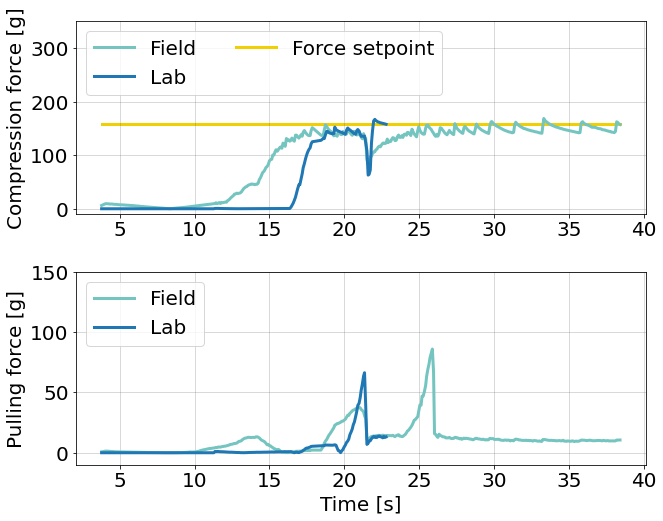

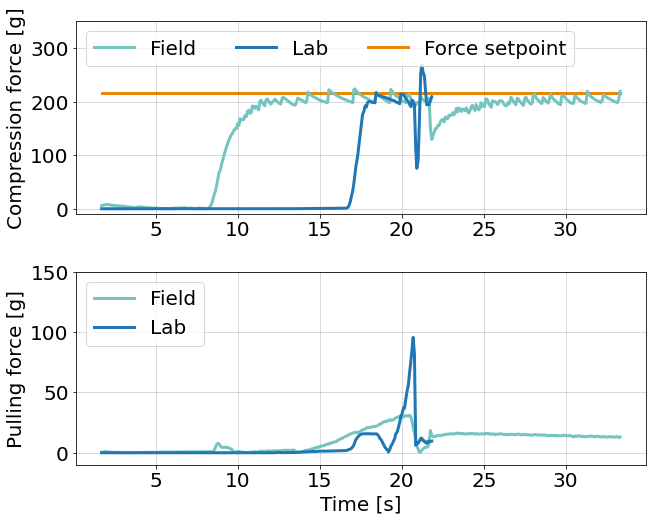

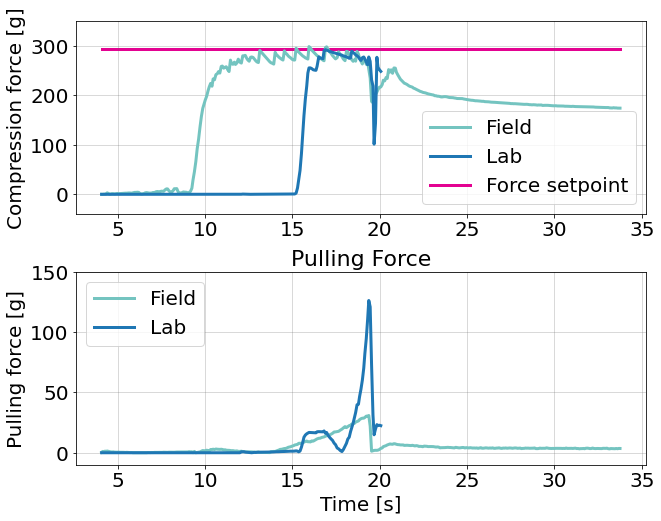

In [704]:
font = 20
lines_field = 2
lines = 3
line_force=2.5
fig_size=(9*1.1,7*1.1)

fig, axs = plt.subplots(2, 1)
fig.set_size_inches(fig_size)
for j, trial in enumerate(all_new_raspL):
    
    # Fd_vector[max_valL::] = 40
    if j == 0:
        leg = 'Field'
        colour = robot_field
    else:
        leg = 'Lab'
        colour = robot_lab
    axs[0].plot(timeL[offstemL.index(max_valL)][0:len(trial)], trial, color=colour, label=leg, linewidth=lines, zorder=j+2)
    axs[0].set_ylabel("Compression force [g]",fontsize=font)
    # axs[0].set_xlabel("Time [s]",fontsize=font)
    axs[0].set_ylim([-10,350])

    axs[1].plot(timeL[offstemL.index(max_valL)][0:len(all_new_loadcellL[j])], all_new_loadcellL[j], color=colour, label=leg, linewidth=lines)
    axs[1].set_ylabel("Pulling force [g]",fontsize=font)
    axs[1].set_xlabel("Time [s]",fontsize=font)
    axs[1].set_ylim([-10,150])
Fd_vector = np.ones_like(all_new_raspL[0])*Fd[0]
axs[0].plot(timeL[offstemL.index(max_valL)][0:len(Fd_vector)], Fd_vector, color = low_colour, label='Force setpoint', linewidth=lines, zorder=1)
axs[0].legend(loc="upper left",fontsize=font, ncol=2)
axs[1].legend(loc="upper left",fontsize=font)
# axs[0].set_title("Compression Force",fontsize=font+2)
# axs[1].set_title("Pulling Force",fontsize=font+2)
axs[0].grid(b=True, color='#666666', linestyle='-', alpha = 0.3)
axs[1].grid(b=True, color='#666666', linestyle='-', alpha = 0.3)
axs[0].tick_params(axis='both', labelsize=font)
axs[1].tick_params(axis='both', labelsize=font)

plt.subplots_adjust(left=0.1,
                            bottom=0.1, 
                            right=0.9, 
                            top=0.9, 
                            wspace=0.3, 
                            hspace=0.3)

plt.savefig("labVsField_low_woK2.pdf", format="pdf")
#----------------------------------------------------------------------------------------------------
fig, axs = plt.subplots(2, 1)
fig.set_size_inches(fig_size)
for j, trial in enumerate(all_new_raspM):
    Fd_vector = np.ones_like(trial)*Fd[1]
    # Fd_vector[max_valM::] = 40
    if j == 0:
        leg = 'Field'
        colour = robot_field
    else:
        leg = 'Lab'
        colour = robot_lab
    axs[0].plot(timeM[offstemM.index(max_valM)][0:len(trial)], trial, color = colour, label=leg, linewidth=lines, zorder=j+2)
    axs[0].set_ylabel("Compression force [g]",fontsize=font)
    # axs[0].set_xlabel("Time [s]",fontsize=font)
    axs[0].set_ylim([-10,350])

    axs[1].plot(timeM[offstemM.index(max_valM)][0:len(all_new_loadcellM[j])], all_new_loadcellM[j],color = colour, label=leg, linewidth=lines)
    axs[1].set_ylabel("Pulling force [g]",fontsize=font)
    axs[1].set_xlabel("Time [s]",fontsize=font)
    axs[1].set_ylim([-10,150])
Fd_vector = np.ones_like(all_new_raspM[0])*Fd[1]
axs[0].plot(timeM[offstemM.index(max_valM)][0:len(Fd_vector)], Fd_vector, color=medium_colour, label='Force setpoint', linewidth=lines, zorder=1)
axs[0].legend(loc="upper left",fontsize=font, ncol=3)
axs[1].legend(loc="upper left",fontsize=font)
# axs[0].set_title("Compression Force",fontsize=font+2)
# axs[1].set_title("Pulling Force",fontsize=font+2)
axs[0].grid(b=True, color='#666666', linestyle='-', alpha = 0.3)
axs[1].grid(b=True, color='#666666', linestyle='-', alpha = 0.3)
axs[0].tick_params(axis='both', labelsize=font)
axs[1].tick_params(axis='both', labelsize=font)

plt.subplots_adjust(left=0.1,
                            bottom=0.1, 
                            right=0.9, 
                            top=0.9, 
                            wspace=0.3, 
                            hspace=0.3)

plt.savefig("labVsField_medium_woK2.pdf", format="pdf")
#-----------------------------------------------------------------------------------------------
fig, axs = plt.subplots(2, 1)
fig.set_size_inches(fig_size)
for j, trial in enumerate(all_new_raspH):
    Fd_vector = np.ones_like(trial)*Fd[2]
    # Fd_vector[max_valH::] = 40
    if j == 0:
        leg = 'Field'
        colour= robot_field
    else:
        leg = 'Lab'
        colour= robot_lab
    axs[0].plot(timeH[offstemH.index(max_valH)][0:len(trial)], trial, color=colour,label=leg, linewidth=lines, zorder=j+2)
    axs[1].set_ylabel("Pulling force [g]",fontsize=font)
    # axs[0].set_xlabel("Time [s]",fontsize=font)
    axs[0].set_ylim([-40,350])

    axs[1].plot(timeH[offstemH.index(max_valH)][0:len(all_new_loadcellH[j])], all_new_loadcellH[j],color=colour, label=leg, linewidth=lines)
    axs[0].set_ylabel("Compression force [g]",fontsize=font)
    axs[1].set_xlabel("Time [s]",fontsize=font)
    axs[1].set_ylim([-10,150])
Fd_vector = np.ones_like(all_new_raspH[0])*Fd[2]
axs[0].plot(timeH[offstemH.index(max_valH)][0:len(Fd_vector)], Fd_vector, color=high_colour, label='Force setpoint', linewidth=lines, zorder=1)
axs[1].legend(loc="upper left",fontsize=font)
axs[0].legend(loc="lower right",fontsize=font)
# axs[0].set_title("Compression Force",fontsize=font+2)
axs[1].set_title("Pulling Force",fontsize=font+2)
axs[0].grid(b=True, color='#666666', linestyle='-', alpha = 0.3)
axs[1].grid(b=True, color='#666666', linestyle='-', alpha = 0.3)
axs[0].tick_params(axis='both', labelsize=font)
axs[1].tick_params(axis='both', labelsize=font)


plt.subplots_adjust(left=0.1,
                            bottom=0.1, 
                            right=0.9, 
                            top=0.9, 
                            wspace=0.3, 
                            hspace=0.3)

plt.savefig("labVsField_high_woK2.pdf", format="pdf")

In [705]:
base_dir = os.getcwd()
base_dir

'D:\\IST\\5 ano\\2 semestre\\Tese\\FIELD EXPERIMENTS\\data (1)\\Real raspberry trials (1)\\Day 2\\Harvesting data day 2'

In [544]:
os.chdir('D:/IST/5 ano/2 semestre/Tese/raspberry-grasping/data/Real Raspberry trials')
dir_H = 'High Force'
dir_L = 'Low Force'
dir_M = 'Medium Force'
dirs = [dir_L, dir_M, dir_H]
force_lvl = ['labL', 'labM', 'labH']
Fd = [158.64445305, 216.4170151196637, 293.426523193016]
files = ['comp_force', 'gripper_pos', 'z_pos', 'pull_force', 'time_vector']
folders = ['Compression Force', 'Gripper Positions', 'Init_and_final_pos', 'Pulling Force Gripper', 'Time Vectors']
base_dir = os.getcwd()
base_dir

'D:\\IST\\5 ano\\2 semestre\\Tese\\raspberry-grasping\\data\\Real Raspberry trials'

In [545]:
for j, directory in enumerate(dirs):
    os.chdir(directory)
    current_dir = os.getcwd()
    for i, folder in enumerate(folders):
        data = []
        for k, file in enumerate(os.listdir(folder)):
            data.append(read_csv_file(base_dir+'/'+directory+'/'+folder+'/'+file))
        locals()[files[i]+force_lvl[j]] = data
    os.chdir(base_dir)

In [546]:
## Day 2 harvesting results

os.chdir('D:/IST/5 ano/2 semestre/Tese/FIELD EXPERIMENTS/data (1)/Real raspberry trials (1)/Day 2/Harvesting data day 2')
dir_HwK2 = 'High force with controller 2'
dir_HwoK2 = 'High force w-o controller 2'
dir_LwK2 = 'Low force with controller 2'
dir_LwoK2 = 'Low force w-o controller 2'
dir_MwK2 = 'Medium force with controller 2 2nd try'
dir_MwoK2 = 'Medium force w-o controller 2'
dirs = [dir_LwK2, dir_LwoK2, dir_MwK2, dir_MwoK2, dir_HwK2, dir_HwoK2]
force_lvl = ['LwK2', 'LwoK2', 'MwK2', 'MwoK2', 'HwK2', 'HwoK2']
Fd = [158.64445305, 216.4170151196637, 293.426523193016]
files = ['comp_force', 'gripper_pos', 'z_pos', 'pull_force', 'time_vector']
# folders = ['Compression Force', 'Gripper Positions', 'Init_and_final_pos', 'Pulling Force Gripper', 'Time Vectors']
base_dir = os.getcwd()
base_dir

'D:\\IST\\5 ano\\2 semestre\\Tese\\FIELD EXPERIMENTS\\data (1)\\Real raspberry trials (1)\\Day 2\\Harvesting data day 2'

In [547]:
for j, directory in enumerate(dirs):
    for k, file in enumerate(os.listdir(directory)):
        locals()[files[k]+force_lvl[j]] = read_csv_file(directory+'/'+file)


In [548]:
data = pull_forcelabL
offstem_idxlabL = []
for i in range(len(data)):
    dif_0 = 0
    for idx in range(1,len(data[i])):
        dif = data[i][idx-1]-data[i][idx]
        if dif >= dif_0:
            dif_0 = dif
            offstem = idx
    offstem_idxlabL.append(offstem)

data = pull_forcelabM
offstem_idxlabM = []
for i in range(len(data)):
    dif_0 = 0
    for idx in range(1,len(data[i])):
        dif = data[i][idx-1]-data[i][idx]
        if dif >= dif_0:
            dif_0 = dif
            offstem = idx
    offstem_idxlabM.append(offstem)

data = pull_forcelabH
offstem_idxlabH = []
for i in range(len(data)):
    dif_0 = 0
    for idx in range(1,len(data[i])):
        dif = data[i][idx-1]-data[i][idx]
        if dif >= dif_0:
            dif_0 = dif
            offstem = idx
    offstem_idxlabH.append(offstem)

data = pull_forceHwK2
dif_0 = 0
for idx in range(1,len(data)):
    dif = data[idx-1]-data[idx]
    if dif >= dif_0:
        dif_0 = dif
        offstem = idx
offstemHwK2 = offstem

data = pull_forceLwK2
dif_0 = 0
for idx in range(1,len(data)):
    dif = data[idx-1]-data[idx]
    if dif >= dif_0:
        dif_0 = dif
        offstem = idx
offstemLwK2 = offstem

data = pull_forceMwK2
dif_0 = 0
for idx in range(1,len(data)):
    dif = data[idx-1]-data[idx]
    if dif >= dif_0:
        dif_0 = dif
        offstem = idx
offstemMwK2 = offstem

## Aligning with when the raspberry is off the stem 

In [549]:
trial = 3
all_raspsL=[comp_forceLwK2,comp_forcelabL[trial]]
all_raspsM=[comp_forceMwK2,comp_forcelabM[trial]]
all_raspsH=[comp_forceHwK2,comp_forcelabH[trial]]

all_loadcellL=[pull_forceLwK2,pull_forcelabL[trial]]
all_loadcellM=[pull_forceMwK2,pull_forcelabM[trial]]
all_loadcellH=[pull_forceHwK2,pull_forcelabH[trial]]

offstemL = [offstemLwK2, offstem_idxlabL[trial]]
offstemM = [offstemMwK2, offstem_idxlabM[trial]]
offstemH = [offstemHwK2, offstem_idxlabH[trial]]

timeL = [time_vectorLwK2, time_vectorlabL[trial]]
timeM = [time_vectorMwK2, time_vectorlabM[trial]]
timeH = [time_vectorHwK2, time_vectorlabH[trial]]

In [550]:
max_valL = max(offstemL)
all_new_raspL = []
all_new_loadcellL = []
for j, human_trials in enumerate(all_raspsL):
    if j != offstemL.index(max_valL):
        extra = np.array([0]*(max_valL-offstemL[j]))
        all_new_raspL.append(np.append(extra, human_trials))
        all_new_loadcellL.append(np.append(extra, all_loadcellL[j]))
    else:
        all_new_raspL.append(human_trials)
        all_new_loadcellL.append(all_loadcellL[j])

max_valM = max(offstemM)
all_new_raspM = []
all_new_loadcellM = []
for j, human_trials in enumerate(all_raspsM):
    if j != offstemM.index(max_valM):
        extra = np.array([0]*(max_valM-offstemM[j]))
        all_new_raspM.append(np.append(extra, human_trials))
        all_new_loadcellM.append(np.append(extra, all_loadcellM[j]))
    else:
        all_new_raspM.append(human_trials)
        all_new_loadcellM.append(all_loadcellM[j])

max_valH = max(offstemH)
all_new_raspH = []
all_new_loadcellH = []
for j, human_trials in enumerate(all_raspsH):
    if j != offstemH.index(max_valH):
        extra = np.array([0]*(max_valH-offstemH[j]))
        all_new_raspH.append(np.append(extra, human_trials))
        all_new_loadcellH.append(np.append(extra, all_loadcellH[j]))
    else:
        all_new_raspH.append(human_trials)
        all_new_loadcellH.append(all_loadcellH[j])



Text(0.5, 1.0, 'Pulling Force')

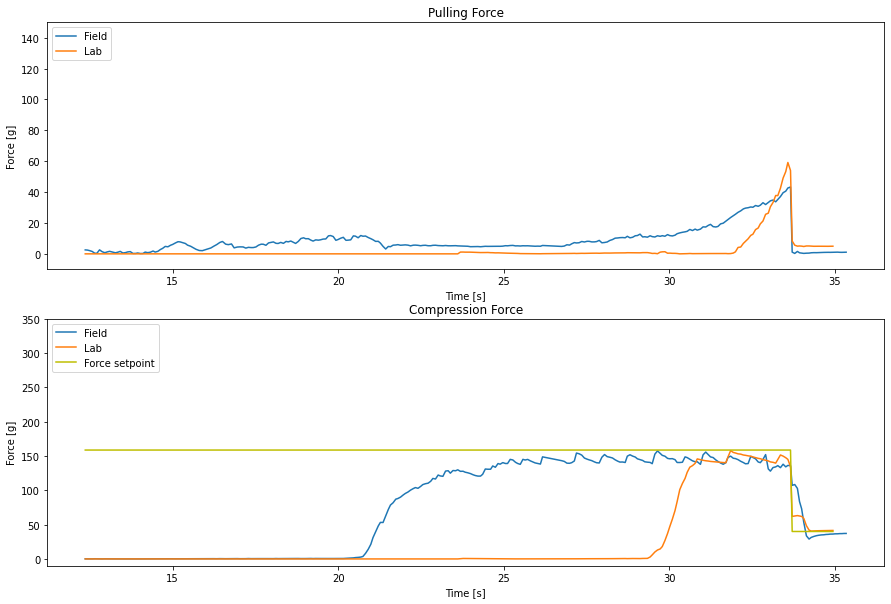

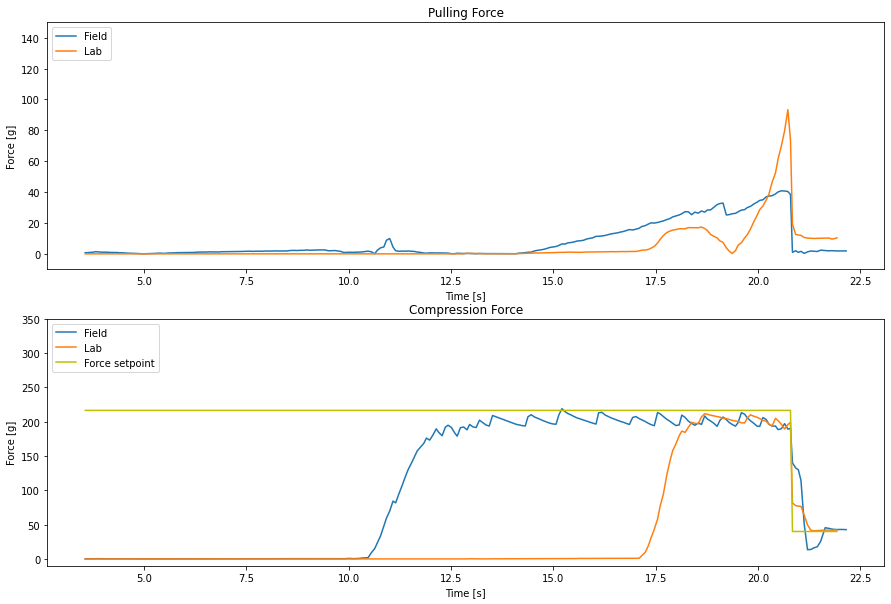

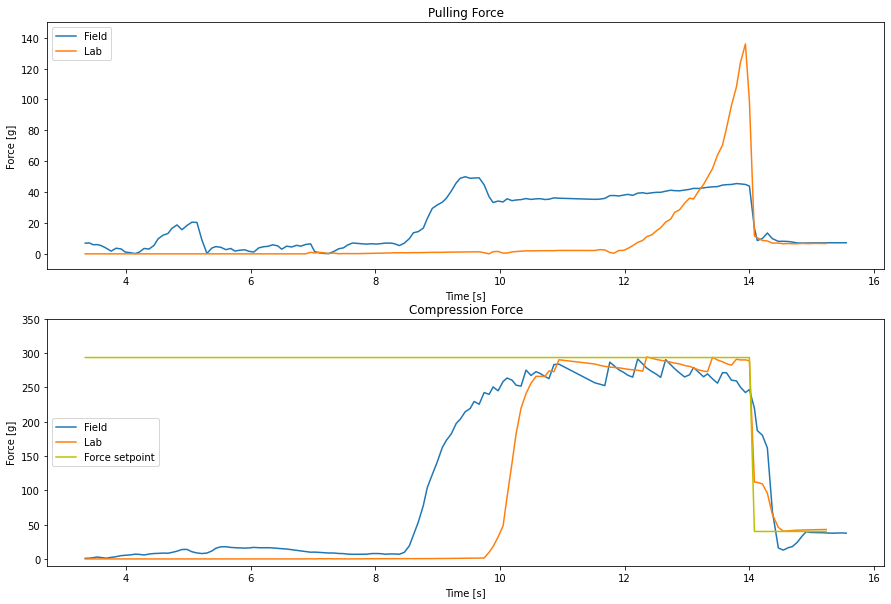

In [551]:
fig, axs = plt.subplots(2, 1)
fig.set_size_inches(15,10)
for j, trial in enumerate(all_new_raspL):
    Fd_vector = np.ones_like(trial)*Fd[0]
    Fd_vector[max_valL::] = 40
    if j == 0:
        leg = 'Field'
    else:
        leg = 'Lab'
    axs[1].plot(timeL[offstemL.index(max_valL)][0:len(trial)], trial, label=leg)
    axs[1].set_ylabel("Force [g]")
    axs[1].set_xlabel("Time [s]")
    axs[1].set_ylim([-10,350])

    axs[0].plot(timeL[offstemL.index(max_valL)][0:len(all_new_loadcellL[j])], all_new_loadcellL[j], label=leg)
    axs[0].set_ylabel("Force [g]")
    axs[0].set_xlabel("Time [s]")
    axs[0].set_ylim([-10,150])
axs[1].plot(timeL[offstemL.index(max_valL)][0:len(Fd_vector)], Fd_vector, 'y', label='Force setpoint')
axs[1].legend(loc="upper left")
axs[0].legend(loc="upper left")
axs[1].set_title("Compression Force")
axs[0].set_title("Pulling Force")

fig, axs = plt.subplots(2, 1)
fig.set_size_inches(15,10)
for j, trial in enumerate(all_new_raspM):
    Fd_vector = np.ones_like(trial)*Fd[1]
    Fd_vector[max_valM::] = 40
    if j == 0:
        leg = 'Field'
    else:
        leg = 'Lab'
    axs[1].plot(timeM[offstemM.index(max_valM)][0:len(trial)], trial, label=leg)
    axs[1].set_ylabel("Force [g]")
    axs[1].set_xlabel("Time [s]")
    axs[1].set_ylim([-10,350])

    axs[0].plot(timeM[offstemM.index(max_valM)][0:len(all_new_loadcellM[j])], all_new_loadcellM[j], label=leg)
    axs[0].set_ylabel("Force [g]")
    axs[0].set_xlabel("Time [s]")
    axs[0].set_ylim([-10,150])
axs[1].plot(timeM[offstemM.index(max_valM)][0:len(Fd_vector)], Fd_vector, 'y', label='Force setpoint')
axs[1].legend(loc="upper left")
axs[0].legend(loc="upper left")
axs[1].set_title("Compression Force")
axs[0].set_title("Pulling Force")

fig, axs = plt.subplots(2, 1)
fig.set_size_inches(15,10)
for j, trial in enumerate(all_new_raspH):
    Fd_vector = np.ones_like(trial)*Fd[2]
    Fd_vector[max_valH::] = 40
    if j == 0:
        leg = 'Field'
    else:
        leg = 'Lab'
    axs[1].plot(timeH[offstemH.index(max_valH)][0:len(trial)], trial, label=leg)
    axs[1].set_ylabel("Force [g]")
    axs[1].set_xlabel("Time [s]")
    axs[1].set_ylim([-10,350])

    axs[0].plot(timeH[offstemH.index(max_valH)][0:len(all_new_loadcellH[j])], all_new_loadcellH[j], label=leg)
    axs[0].set_ylabel("Force [g]")
    axs[0].set_xlabel("Time [s]")
    axs[0].set_ylim([-10,150])
axs[1].plot(timeH[offstemH.index(max_valH)][0:len(Fd_vector)], Fd_vector, 'y', label='Force setpoint')
axs[0].legend(loc="upper left")
axs[1].legend(loc="center left")
axs[1].set_title("Compression Force")
axs[0].set_title("Pulling Force")

In [552]:
## Day 2 other trials
os.chdir('D:/IST/5 ano/2 semestre/Tese/FIELD EXPERIMENTS/data (1)/Real raspberry trials (1)/Day 2/Harvesting data day 2')
dir_2_29 = '2_29'
dir_2_38 = '2_38'
dir_2_39 = '2_39'
dir_2_40 = '2_40'
dirs = [dir_2_29, dir_2_38, dir_2_39, dir_2_40]
files = ['comp_force','Fd', 'gripper_pos', 'z_pos', 'pull_force','time_stamps', 'time_vector']
for j, directory in enumerate(dirs):
    for i, file in enumerate(os.listdir(directory)):
        locals()[files[i]+dirs[j]] = read_csv_file(directory+'/'+file)

In [553]:
os.chdir('D:/IST/5 ano/2 semestre/Tese/FIELD EXPERIMENTS/data (1)/Real raspberry trials (1)/Day1/Harvesting data day 1')
dirs = [str(x) for x in range(17,58) if x not in [21, 24, 27, 29, 42, 51]]
files = ['comp_force', 'Fd', 'z_pos', 'pull_force', 'time_vector']
for j, directory in enumerate(dirs):
    for i, file in enumerate(os.listdir(directory)):
        locals()[files[i]+dirs[j]] = read_csv_file(directory+'/'+file)

In [554]:
trial = 3
all_raspsL=[comp_forceLwK2,comp_forcelabL[trial], comp_force2_38, comp_force2_39, comp_force2_40, comp_force17]
all_raspsM=[comp_forceMwK2,comp_forcelabM[trial], comp_force2_29, comp_force34, comp_force44, comp_force53]
all_raspsH=[comp_forceHwK2,comp_forcelabH[trial], comp_force46, comp_force50]

all_loadcellL=[pull_forceLwK2,pull_forcelabL[trial], pull_force2_38, pull_force2_39, pull_force2_40,pull_force17]
all_loadcellM=[pull_forceMwK2,pull_forcelabM[trial], pull_force2_29, pull_force34, pull_force44, pull_force53]
all_loadcellH=[pull_forceHwK2,pull_forcelabH[trial], pull_force46, pull_force50]

timeL = [time_vectorLwK2, time_vectorlabL[trial], time_vector2_38, time_vector2_39, time_vector2_40, time_vector17]
timeM = [time_vectorMwK2, time_vectorlabM[trial], time_vector2_29, time_vector34, time_vector44, time_vector53]
timeH = [time_vectorHwK2, time_vectorlabH[trial], time_vector46, time_vector50]

In [555]:
offstem_idxL = []
for data in all_loadcellL:
    dif_0 = 0
    for idx in range(1,len(data)):
        dif = data[idx-1]-data[idx]
        if dif >= dif_0:
            dif_0 = dif
            offstem = idx
    offstem_idxL.append(offstem)

offstem_idxM = []
for data in all_loadcellL:
    dif_0 = 0
    for idx in range(1,len(data)):
        dif = data[idx-1]-data[idx]
        if dif >= dif_0:
            dif_0 = dif
            offstem = idx
    offstem_idxM.append(offstem)

offstem_idxH = []
for data in all_loadcellL:
    dif_0 = 0
    for idx in range(1,len(data)):
        dif = data[idx-1]-data[idx]
        if dif >= dif_0:
            dif_0 = dif
            offstem = idx
    offstem_idxH.append(offstem)


In [556]:
trial = 3
offstemL = [offstemLwK2, offstem_idxlabL[trial]] + [205,234,207,264]
offstemM = [offstemMwK2, offstem_idxlabM[trial]] + [246,199,214,205]
offstemH = [offstemHwK2, offstem_idxlabH[trial]] + [154,151]

## Aligning with when the raspberry is off the stem 

In [557]:
max_valL = max(offstemL)
all_new_raspL = []
all_new_loadcellL = []
idx = offstemL.index(max_valL)
for j, human_trials in enumerate(all_raspsL):
    if j != idx:
        extra = np.array([0]*(max_valL-offstemL[j]))
        all_new_raspL.append(np.append(extra, human_trials))
        all_new_loadcellL.append(np.append(extra, all_loadcellL[j]))
        print(len(all_new_raspL[j]))
    else:
        all_new_raspL.append(human_trials)
        all_new_loadcellL.append(all_loadcellL[j])

max_valM = max(offstemM)
all_new_raspM = []
all_new_loadcellM = []
for j, human_trials in enumerate(all_raspsM):
    if j != offstemM.index(max_valM):
        extra = np.array([0]*(max_valM-offstemM[j]))
        all_new_raspM.append(np.append(extra, human_trials))
        all_new_loadcellM.append(np.append(extra, all_loadcellM[j]))
    else:
        all_new_raspM.append(human_trials)
        all_new_loadcellM.append(all_loadcellM[j])

max_valH = max(offstemH)
all_new_raspH = []
all_new_loadcellH = []
for j, human_trials in enumerate(all_raspsH):
    if j != offstemH.index(max_valH):
        extra = np.array([0]*(max_valH-offstemH[j]))
        all_new_raspH.append(np.append(extra, human_trials))
        all_new_loadcellH.append(np.append(extra, all_loadcellH[j]))
    else:
        all_new_raspH.append(human_trials)
        all_new_loadcellH.append(all_loadcellH[j])



291
309
290
290
289


C:\Users\Catarina.LAPTOP-GAR6C5UR\AppData\Local\Temp\ipykernel_6384\1658507388.py:51: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  axs[0].grid(b=True, color='#666666', linestyle='-', alpha = 0.3)
C:\Users\Catarina.LAPTOP-GAR6C5UR\AppData\Local\Temp\ipykernel_6384\1658507388.py:52: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  axs[1].grid(b=True, color='#666666', linestyle='-', alpha = 0.3)
C:\Users\Catarina.LAPTOP-GAR6C5UR\AppData\Local\Temp\ipykernel_6384\1658507388.py:112: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  axs[0].grid(b=True, color='#666666', linestyle='-', alpha = 0.3)
C:\Users\Catarina.

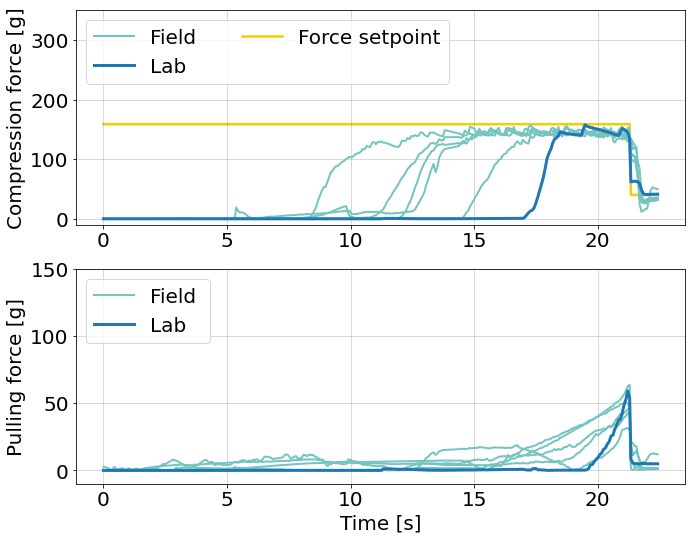

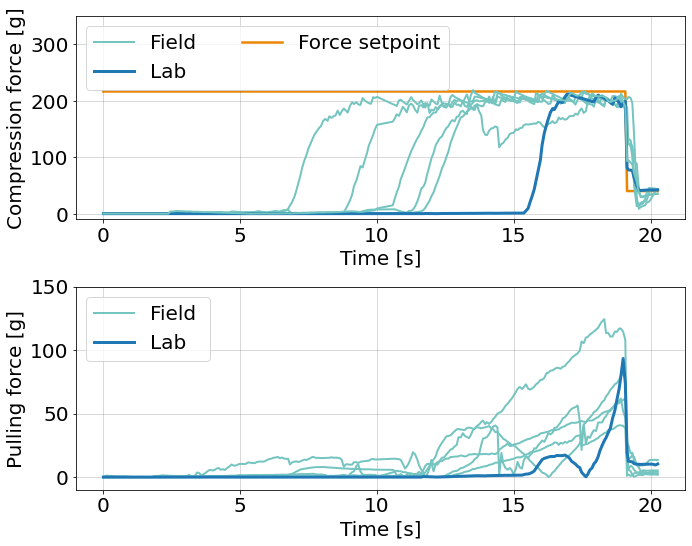

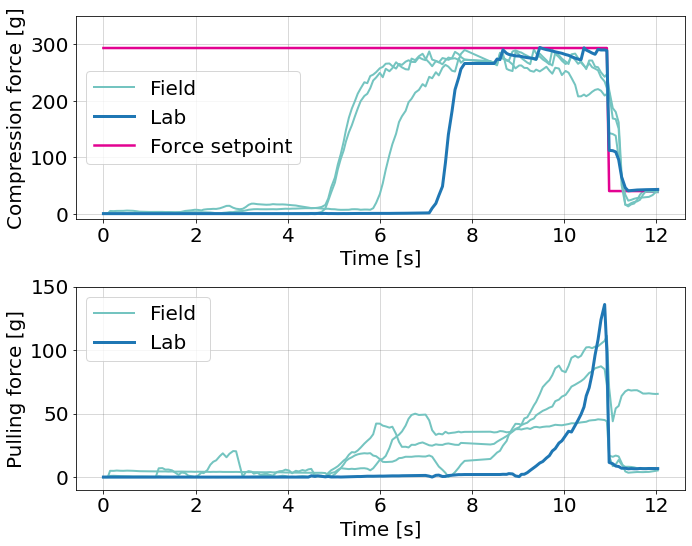

In [625]:
font = 20
lines_field = 2
lines = 3
line_force=2.5
fig_size=(9*1.08,7*1.08)

fig, axs = plt.subplots(2, 1)
fig.set_size_inches(fig_size)
# for j, trial in enumerate(all_new_raspL[[0,2,3]]):
for j in [0,2,3,5]:
    trial = all_new_raspL[j]
    trial = trial[0:289]#[len(trial)-289::]
    loadcell = all_new_loadcellL[j][0:289]#[len(all_new_loadcellL[j])-289::]
    time = np.array(timeL[0][0:289])-timeL[0][0]
    Fd_vector = np.ones_like(trial)*Fd[0]
    Fd_vector[max_valL::] = 40
    # if j == 0:
    #     leg = 'Field'
    # else:
    leg = None
    axs[0].plot(time, trial, color=robot_field, label=leg, linewidth=lines_field, zorder=j+2)
    axs[1].plot(time, loadcell, color=robot_field, label=leg, linewidth=lines_field)

trial = all_new_raspL[4]
trial = trial[0:289]#[len(trial)-289::]
loadcell = all_new_loadcellL[4][0:289]#[len(all_new_loadcellL[4])-289::]

axs[0].plot(time, trial,color=robot_field, label='Field ', linewidth=lines_field, zorder=j+2)
axs[1].plot(time, loadcell,color=robot_field, label='Field ', linewidth=lines_field)

trial = all_new_raspL[1]
trial = trial[0:289]#[len(trial)-289::]
loadcell = all_new_loadcellL[1][0:289]#[len(all_new_loadcellL[1])-289::]

axs[0].plot(time, trial,color=robot_lab, label='Lab', linewidth=lines, zorder=j+3)
axs[1].plot(time, loadcell,color=robot_lab, label='Lab', linewidth=lines)

axs[0].set_ylabel("Compression force [g]", fontsize=font)
# axs[0].set_xlabel("Time [s]",fontsize=font)
axs[0].set_ylim([-10,350])
axs[0].plot(time, Fd_vector, color=low_colour, label='Force setpoint',linewidth=line_force, zorder=1)
axs[0].legend(loc="upper left",fontsize=font, ncol=2)
# axs[0].set_title("Compression Force",fontsize=font+2)

axs[1].set_ylabel("Pulling force [g]",fontsize=font)
axs[1].set_xlabel("Time [s]",fontsize=font)
axs[1].set_ylim([-10,150])
axs[1].legend(loc="upper left",fontsize=font)
# axs[1].set_title("Pulling Force",fontsize=font+2)

axs[0].grid(b=True, color='#666666', linestyle='-', alpha = 0.3)
axs[1].grid(b=True, color='#666666', linestyle='-', alpha = 0.3)
axs[0].tick_params(axis='both', labelsize=font)
axs[1].tick_params(axis='both', labelsize=font)

# plt.subplots_adjust(left=0.1,
#                     bottom=0.1, 
#                     right=0.9, 
#                     top=0.9, 
#                     wspace=0.4, 
#                     hspace=0.3)

plt.tight_layout()

plt.savefig("labVsField_low.pdf", format="pdf")

# -------------------------------------------------------------------------------------------------
fig, axs = plt.subplots(2, 1)
fig.set_size_inches(fig_size)
# for j, trial in enumerate(all_new_raspL[[0,2,3]]):
for j in [0,2,4,3]:
    trial = all_new_raspM[j]
    trial = trial[0:263]#[len(trial)-263::]
    loadcell = all_new_loadcellM[j][0:263]#[len(all_new_loadcellM[j])-263::]
    time = np.array(timeM[2][0:263])-timeM[2][0]
    Fd_vector = np.ones_like(trial)*Fd[1]
    Fd_vector[max_valM::] = 40
    # if j == 0:
    #     leg = 'Field'
    # else:
    leg = None
    axs[0].plot(time, trial, color=robot_field, label=leg, linewidth=lines_field, zorder=j+2)
    axs[1].plot(time, loadcell, color=robot_field, label=leg, linewidth=lines_field)

trial = all_new_raspM[5]
trial = trial[0:263]#[len(trial)-263::]
loadcell = all_new_loadcellM[5][0:263]#[len(all_new_loadcellM[5])-263::]

axs[0].plot(time, trial, color=robot_field, label='Field ',linewidth=lines_field, zorder=j+2)
axs[1].plot(time, loadcell, color=robot_field, label='Field ',linewidth=lines_field)

trial = all_new_raspM[1]
trial = trial[0:263]#[len(trial)-263::]
loadcell = all_new_loadcellM[1][0:263]#[len(all_new_loadcellM[1])-263::]

axs[0].plot(time, trial, color=robot_lab,label='Lab',linewidth=lines, zorder=j+2)
axs[1].plot(time, loadcell, color=robot_lab,label='Lab',linewidth=lines)

axs[0].set_ylabel("Compression force [g]", fontsize=font)
axs[0].set_xlabel("Time [s]", fontsize=font)
axs[0].set_ylim([-10,350])
axs[0].plot(time, Fd_vector, color=medium_colour, label='Force setpoint',linewidth=line_force, zorder=1)
axs[0].legend(loc="upper left", fontsize=font, ncol=2)
# axs[0].set_title("Compression Force", fontsize=font+2)

axs[1].set_ylabel("Pulling force [g]", fontsize=font)
axs[1].set_xlabel("Time [s]", fontsize=font)
axs[1].set_ylim([-10,150])
axs[1].legend(loc="upper left", fontsize=font)
# axs[1].set_title("Pulling Force",fontsize=font+2)

axs[0].grid(b=True, color='#666666', linestyle='-', alpha = 0.3)
axs[1].grid(b=True, color='#666666', linestyle='-', alpha = 0.3)
axs[0].tick_params(axis='both', labelsize=font)
axs[1].tick_params(axis='both', labelsize=font)
axs[1].set_xticks(range(0,21,5))
axs[0].set_xticks(range(0,21,5))

# plt.subplots_adjust(left=0.1,
#                     bottom=0.1, 
#                     right=0.9, 
#                     top=0.9, 
#                     wspace=0.4, 
#                     hspace=0.3)

plt.tight_layout()

plt.savefig("labVsField_medium.pdf", format="pdf")

# -------------------------------------------------------------------------------------------------
fig, axs = plt.subplots(2, 1)
fig.set_size_inches(fig_size)
# for j, trial in enumerate(all_new_raspL[[0,2,3]]):
for j in [0,3]:
    trial = all_new_raspH[j]
    trial = trial[0:171]#[len(trial)-171::]
    loadcell = all_new_loadcellH[j][0:171]#[len(all_new_loadcellH[j])-171::]
    time = np.array(timeH[2][0:171])-timeH[2][0]
    Fd_vector = np.ones_like(trial)*Fd[2]
    Fd_vector[max_valH::] = 40
    # if j == 0:
    #     leg = 'Field'
    # else:
    leg = None
    axs[0].plot(time, trial, color=robot_field, label=leg, linewidth=lines_field, zorder=j+2)
    axs[1].plot(time, loadcell, color=robot_field, label=leg, linewidth=lines_field)

trial = all_new_raspH[2]
trial = trial[0:171]#[len(trial)-171::]
loadcell = all_new_loadcellH[2][0:171]#[len(all_new_loadcellH[2])-171::]

axs[0].plot(time, trial, color=robot_field,  label='Field ', linewidth=lines_field, zorder=j+2)
axs[1].plot(time, loadcell, color=robot_field,  label='Field ', linewidth=lines_field)

trial = all_new_raspH[1]
trial = trial[0:171]#[len(trial)-171::]
loadcell = all_new_loadcellH[1][0:171]#[len(all_new_loadcellH[1])-171::]

axs[0].plot(time, trial, color=robot_lab,  label='Lab', linewidth=lines, zorder=j+2)
axs[1].plot(time, loadcell, color=robot_lab,  label='Lab', linewidth=lines)

axs[0].set_ylabel("Compression force [g]", fontsize=font)
axs[0].set_xlabel("Time [s]", fontsize=font)
axs[0].set_xticks(range(0,20,2))
axs[0].set_ylim([-10,350])
axs[0].plot(time, Fd_vector, color=high_colour, label='Force setpoint', linewidth=line_force, zorder=j)
axs[0].legend(loc="center left", fontsize=font)
# axs[0].set_title("Compression Force", fontsize=font+2)

axs[1].set_ylabel("Pulling force [g]", fontsize=font)
axs[1].set_xlabel("Time [s]", fontsize=font)
axs[1].set_ylim([-10,150])
axs[1].legend(loc="upper left", fontsize=font)
# axs[1].set_title("Pulling Force", fontsize=font+2)

axs[0].grid(b=True, color='#666666', linestyle='-', alpha = 0.3)
axs[1].grid(b=True, color='#666666', linestyle='-', alpha = 0.3)
axs[0].tick_params(axis='both', labelsize=font)
axs[1].tick_params(axis='both', labelsize=font)

# plt.subplots_adjust(left=0.1,
#                     bottom=0.1, 
#                     right=0.9, 
#                     top=0.9, 
#                     wspace=0.4, 
#                     hspace=0.3)

plt.tight_layout()

plt.savefig("labVsField_high.pdf", format="pdf")

In [566]:
directoryH = 'D:/IST/5 ano/2 semestre/Tese/raspberry-grasping/data/Training Results/20220717_H_M_L_Force/data/High force raspberry/TPU/Reference'
directoryM = 'D:/IST/5 ano/2 semestre/Tese/raspberry-grasping/data/Training Results/20220717_H_M_L_Force/data/Medium force raspberry/TPU/Reference'
directoryL = 'D:/IST/5 ano/2 semestre/Tese/raspberry-grasping/data/Training Results/20220717_H_M_L_Force/data/Low force raspberry/TPU/Reference'

dirs = [directoryL,directoryM,directoryH]
lvls = ['L','M','H']

In [567]:
for lvl, dir in enumerate(dirs):
    human_trials_r = []
    human_trials_l = []
    all_times = []
    for i in range(1,6):
        # for i, trial in enumerate(os.listdir(directory))
        file_name = dir+'/human trial'+str(i)+'.txt'
        with open(file_name, 'r+') as f:
            trial_r = []
            trial_l = []
            time = []
            i = 0
            while True:
                line = f.readline()
                if not line:
                    break
                if i > 3:
                    if float(line[6:14]) > 0.6:
                        time.append(float(line[6:14]))
                        trial_r.append(float(line[15:35]))
                        trial_l.append(float(line[36::]))
                i += 1
        all_times.append(time)
        human_trials_r.append(trial_r)
        human_trials_l.append(trial_l)

    locals()['all_times'+lvls[lvl]] = all_times
    locals()['rasp'+lvls[lvl]] = human_trials_r
    locals()['loadcell'+lvls[lvl]] = human_trials_l

all_times=[]
all_times = [all_timesL, all_timesM, all_timesH]
all_rasps = [raspL, raspM, raspH]
all_loadcell = [loadcellL, loadcellM, loadcellH]



## Aligning with when the raspberry is off the stem 

In [568]:
all_lengths = []
all_offstem = []
for human_trials in all_rasps:
    lengths = []
    off_stem = []
    for trial in human_trials:
        lengths.append(len(trial))
        dif = []
        for i,value in enumerate(trial):
            if i > 0:
                dif.append(value - trial[i-1])
        off_stem.append(dif.index(min(dif)))
    all_lengths.append(lengths)
    all_offstem.append(off_stem)

all_beginpull = []
for human_trials_l in all_loadcell:
    begin_pull = []
    for trial in human_trials_l:
        dif = []
        for i,value in enumerate(trial):
            if i > 0:
                dif.append(value - trial[i-1])
        begin_pull.append([dif.index(max(dif))-1,dif.index(min(dif))+1])
    all_beginpull.append(begin_pull)

In [569]:
all_beginpull2 = []
for human_trials_l in all_loadcell:
    begin_pull2 = []
    for trial in human_trials_l:
        pull = [0, 0]
        flag = False
        for i,value in enumerate(trial):
            if value > 50 and not flag:
                pull[0] = i-1
                flag = True
            elif value < 50 and flag:
                pull[1] = i+1
                break
        begin_pull2.append(pull)
    all_beginpull2.append(begin_pull)

In [570]:
max_val = max(off_stem)
all_new_rasp = []
all_new_loadcell = []
for j, human_trials in enumerate(all_rasps):
    max_val = max(all_offstem[j])
    new_human_trials = []
    new_trials_loadcell = []
    for i, trial in enumerate(human_trials):
        if i != all_offstem[j].index(max_val):
            extra = np.array([0]*(max_val-all_offstem[j][i]))
            new_human_trials.append(np.append(extra, trial))
            new_trials_loadcell.append(np.append(extra, all_loadcell[j][i]))
    all_new_rasp.append(new_human_trials)
    all_new_loadcell.append(new_trials_loadcell)

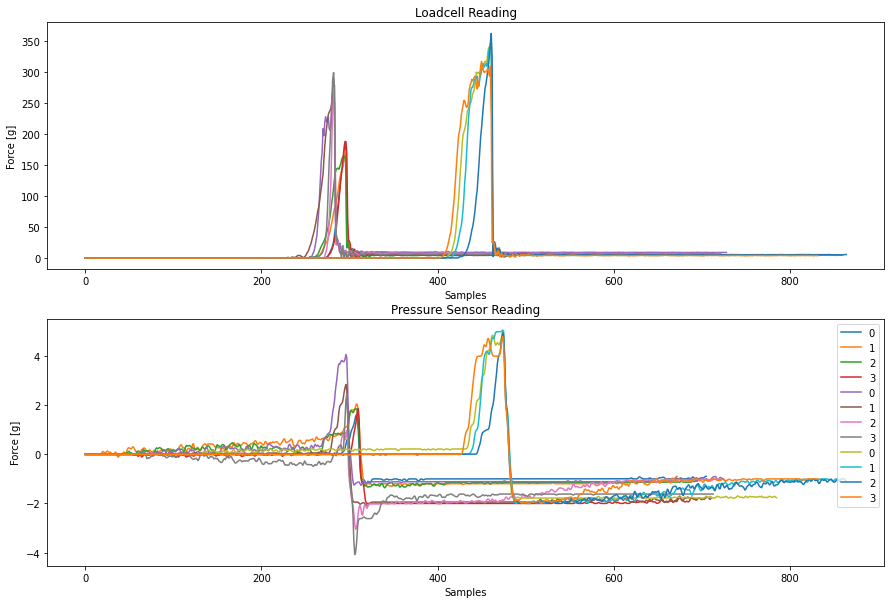

In [571]:
minimum = 0
saved = 0
fig, axs = plt.subplots(2, 1)
fig.set_size_inches(15,10)
for j, new_human_trials in enumerate(all_new_rasp):
    for i, trial in enumerate(new_human_trials):
        axs[1].plot(range(len(trial)), trial, label=str(i))
        axs[1].set_ylabel("Force [g]")
        axs[1].set_xlabel("Samples")
        axs[1].set_title("Pressure Sensor Reading")
        axs[1].legend(loc="upper right")

        axs[0].plot(range(len(all_new_loadcell[j][i])), all_new_loadcell[j][i])
        axs[0].set_ylabel("Force [g]")
        axs[0].set_xlabel("Samples")
        axs[0].set_title("Loadcell Reading")
        newminimum = trial[-1]
        if newminimum < minimum:
            saved = i
            minimum = newminimum

In [572]:
all_longest = []
longest_lengths = []
for j, picking_trials in enumerate(all_new_rasp):
    longest = 0
    length = 0
    for i, trial in enumerate(picking_trials):
        if len(trial) > length:
            longest = i
            length = len(trial)
    all_longest.append(longest)
    longest_lengths.append(length)

all_means_rasp = []
for j, picking_trials in enumerate(all_new_rasp):
    for i, trial in enumerate(picking_trials):
        picking_trials[i] = np.array(trial)
        if i != all_longest[j]:
            picking_trials[i] = np.append(picking_trials[i], [0]*(longest_lengths[j]-len(trial)))

    trials_array = np.array([picking_trials])[0]
    all_means_rasp.append(np.mean(trials_array, axis=0))

In [573]:
all_longest = []
longest_lengths = []
for j, picking_trials in enumerate(all_new_loadcell):
    longest = 0
    length = 0
    for i, trial in enumerate(picking_trials):
        if len(trial) > length:
            longest = i
            length = len(trial)
    all_longest.append(longest)
    longest_lengths.append(length)

all_means_loadcell = []
for j, picking_trials in enumerate(all_new_loadcell):
    for i, trial in enumerate(picking_trials):
        picking_trials[i] = np.array(trial)
        if i != all_longest[j]:
            picking_trials[i] = np.append(picking_trials[i], [0]*(longest_lengths[j]-len(trial)))

    trials_array = np.array([picking_trials])[0]
    all_means_loadcell.append(np.mean(trials_array, axis=0))

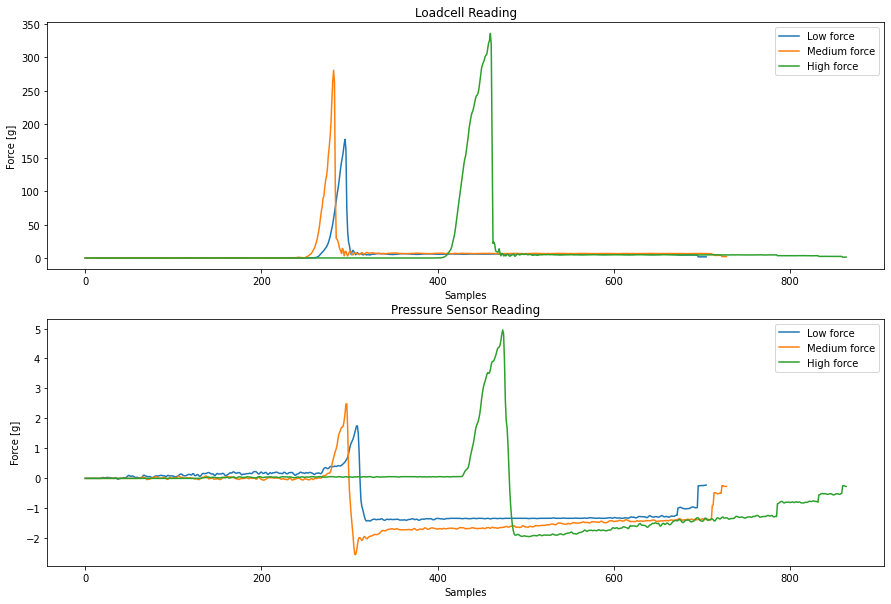

In [574]:
legend = ['Low force', 'Medium force', 'High force']

fig, axs = plt.subplots(2, 1)
fig.set_size_inches(15,10)
for i, trial in enumerate(all_means_rasp):
    axs[1].plot(range(len(trial)), trial, label=legend[i])
    axs[1].set_ylabel("Force [g]")
    axs[1].set_xlabel("Samples")
    axs[1].set_title("Pressure Sensor Reading")
    axs[1].legend(loc="upper right")

    axs[0].plot(range(len(all_means_loadcell[i])), all_means_loadcell[i], label=legend[i])
    axs[0].set_ylabel("Force [g]")
    axs[0].set_xlabel("Samples")
    axs[0].set_title("Loadcell Reading")
    axs[0].legend(loc="upper right")
   

In [575]:
lengths = []
off_stem = []
for trial in all_means_rasp:
    lengths.append(len(trial))
    dif = []
    for i,value in enumerate(trial):
        if i > 0:
            dif.append(value - trial[i-1])
    off_stem.append(dif.index(min(dif)))


begin_pull = []
for trial in all_means_loadcell:
    dif = []
    for i,value in enumerate(trial):
        if i > 0:
            dif.append(value - trial[i-1])
    begin_pull.append([dif.index(max(dif))-1,dif.index(min(dif))+1])


In [576]:
max_val = max(off_stem)
new_human_trials = []
new_trials_loadcell = []
for i, trial in enumerate(all_means_rasp):
    if i != off_stem.index(max_val):
        extra = np.array([0]*(max_val-off_stem[i]))
        new_human_trials.append(np.append(extra, trial))
        new_trials_loadcell.append(np.append(extra, all_means_loadcell[i]))
    else:
        new_human_trials.append(np.array(trial))
        new_trials_loadcell.append(np.array(all_means_loadcell[i]))


In [577]:
new_human_trials2 = new_human_trials[2]
new_human_trials[2] = new_human_trials[0]
new_human_trials[0] = new_human_trials2

C:\Users\Catarina.LAPTOP-GAR6C5UR\AppData\Local\Temp\ipykernel_6384\1196232616.py:21: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  axs[0].grid(b=True, color='#666666', linestyle='-', alpha = 0.3)
C:\Users\Catarina.LAPTOP-GAR6C5UR\AppData\Local\Temp\ipykernel_6384\1196232616.py:22: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  axs[1].grid(b=True, color='#666666', linestyle='-', alpha = 0.3)


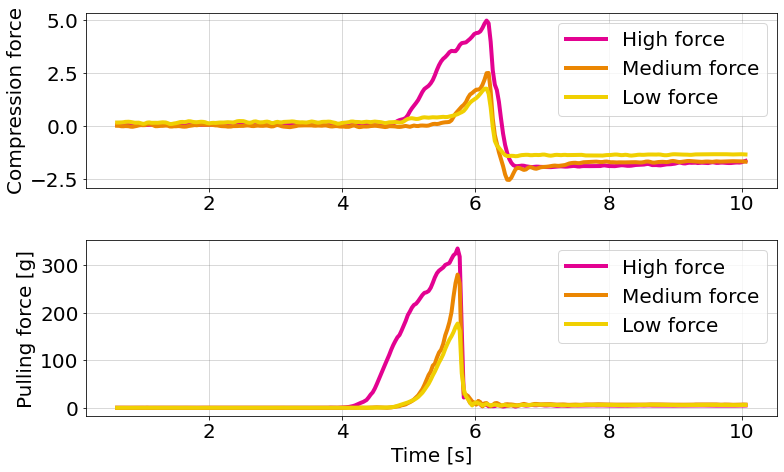

In [592]:
lines = 4
font = 20
colors = [high_colour, medium_colour, low_colour]

legend = ['High force', 'Medium force', 'Low force']
fig, axs = plt.subplots(2, 1)
fig.set_size_inches(12,7)
for i, trial in enumerate(new_human_trials):
    axs[0].plot(all_timesL[0][0:300], trial[200+100:200+400], color=colors[i], label=legend[i], linewidth=lines)
    axs[0].set_ylabel("Compression force", fontsize=font)
    # axs[0].set_xlabel("Time [s]", fontsize=font)
    # axs[0].set_title("Pressure sensor", fontsize=font+2)
    axs[0].legend(loc="upper right", fontsize=font)

    axs[1].plot(all_timesL[0][0:300], new_trials_loadcell[2-i][200+100:200+400], color=colors[i],label=legend[i], linewidth=lines)
    axs[1].set_ylabel("Pulling force [g]", fontsize=font)
    axs[1].set_xlabel("Time [s]", fontsize=font)
    # axs[1].set_title("Loadcell", fontsize=font+2)
    axs[1].legend(loc="upper right", fontsize=font)

axs[0].grid(b=True, color='#666666', linestyle='-', alpha = 0.3)
axs[1].grid(b=True, color='#666666', linestyle='-', alpha = 0.3)
axs[0].tick_params(axis='both', labelsize=font)
axs[1].tick_params(axis='both', labelsize=font)

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.3)

plt.savefig("human_ref.pdf", format="pdf")